Tian R, et al. Genome-wide CRISPRi/a screens in human neurons link lysosomal failure to ferroptosis. Nat Neurosci 2021 247. 2021 May 24;24(7):1020–34.

In [34]:
source('./data_processing.R')

In [3]:
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# CROP-seq_CRISPRi_10x Lane_1

GSM4632022	CROP-seq_CRISPRi_10x_lane_1

In [4]:
input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample1/'
output_dir = './figures_results/Tian_NatureNeuroscience/sample1'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 9165"
[1] "Wildtype UMI: 66855"
[1] "Mutant UMI: 2572"


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


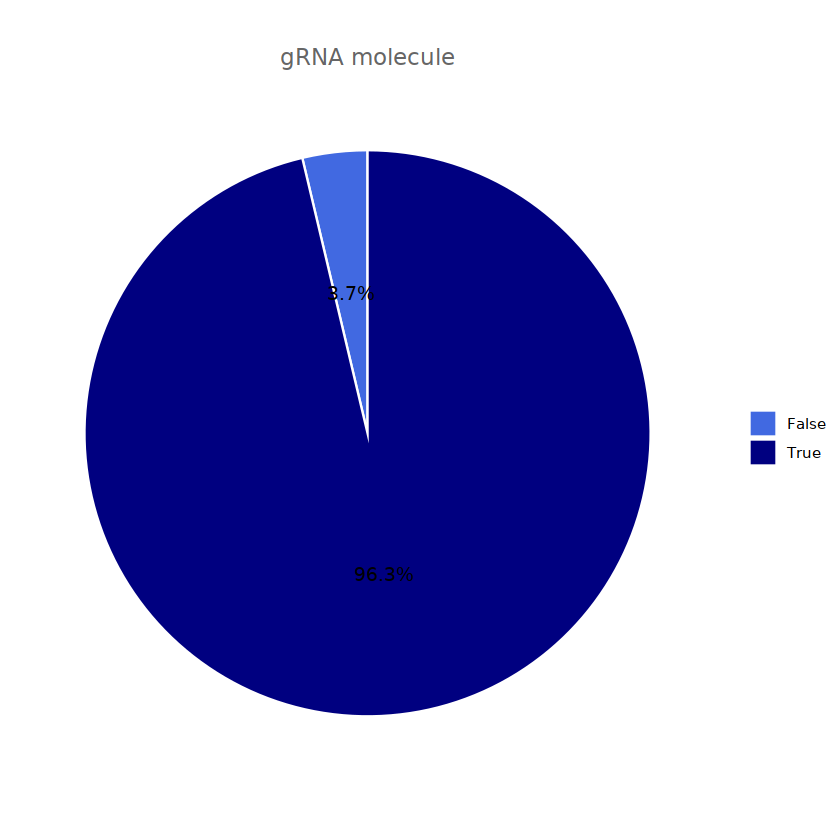

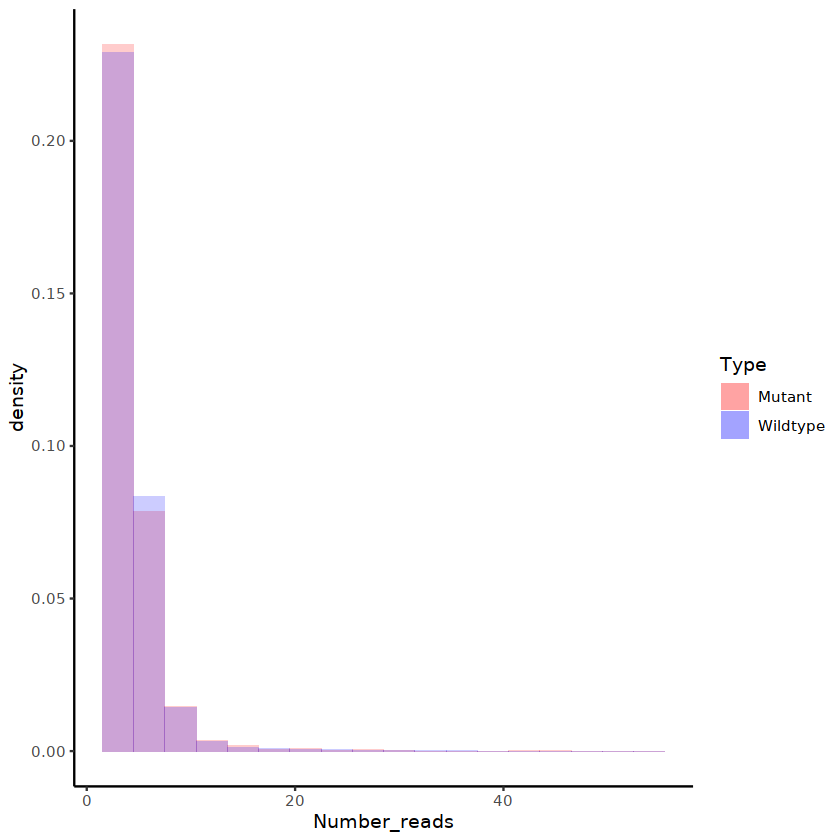

In [5]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(4) D(5)    G I(1)    T 
 100   46   81    4    3    1    1   44    9   26 
[1] "MT mutation type"

  D   I   S 
 90   9 216 
[1] "MT mutation structure"

gRNA Rest   U6 
 223   72   20 


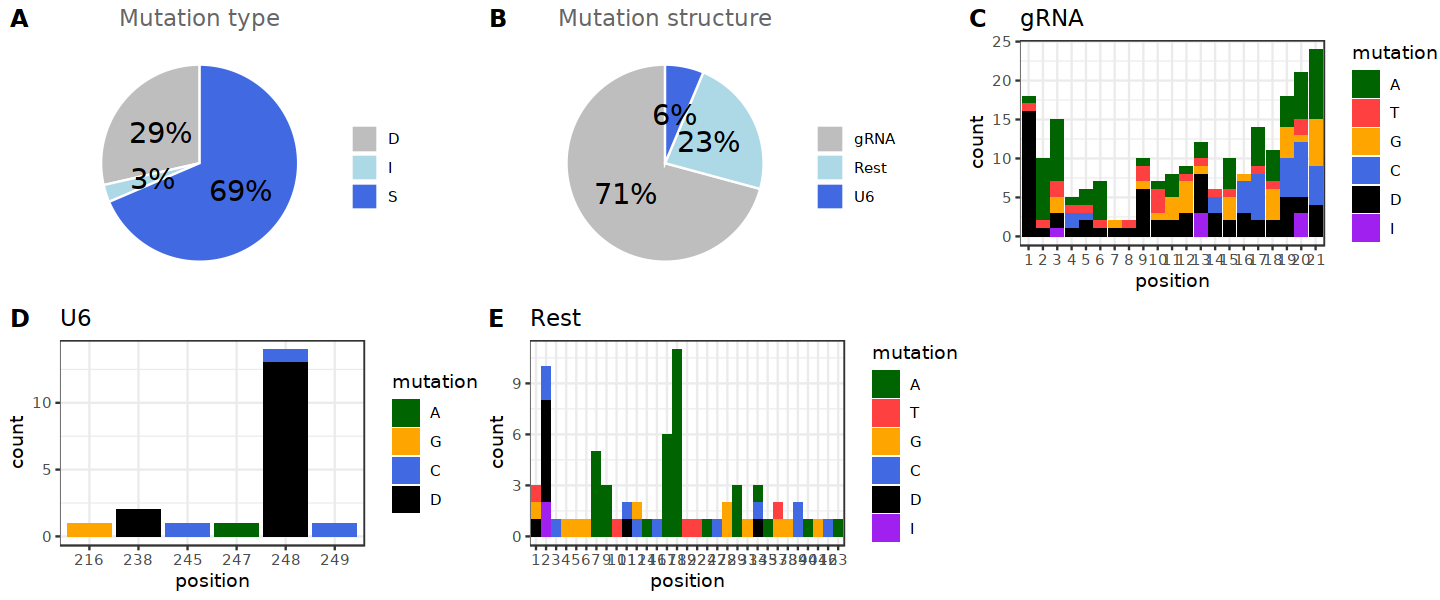

In [6]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [7]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.312   1.000   9.000 

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 10 rows containing non-finite values (`stat_count()`).”


[1] 24

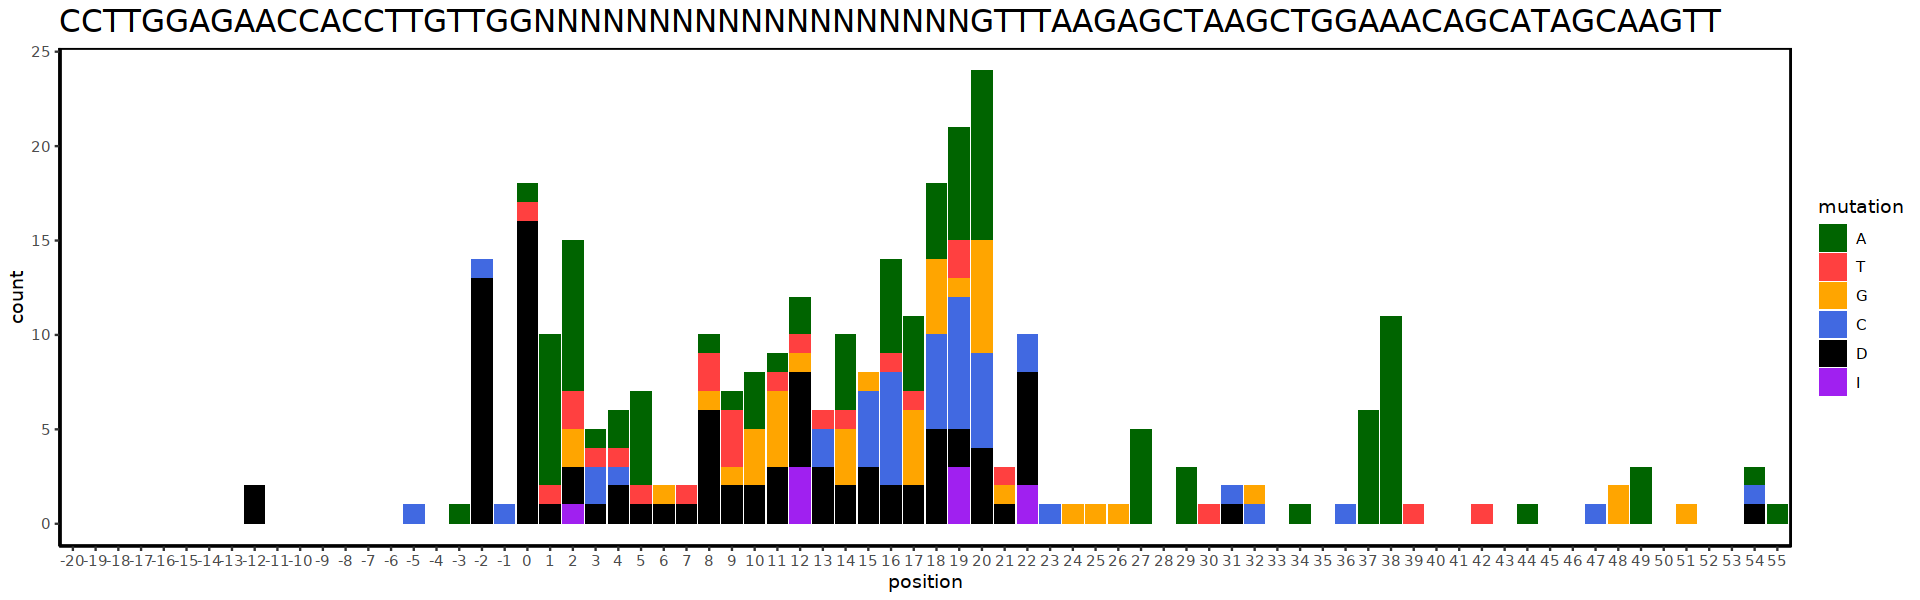

In [8]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
max(table(MT2$position))
#dev.off()

### Cell assignment

Rows: 15092 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


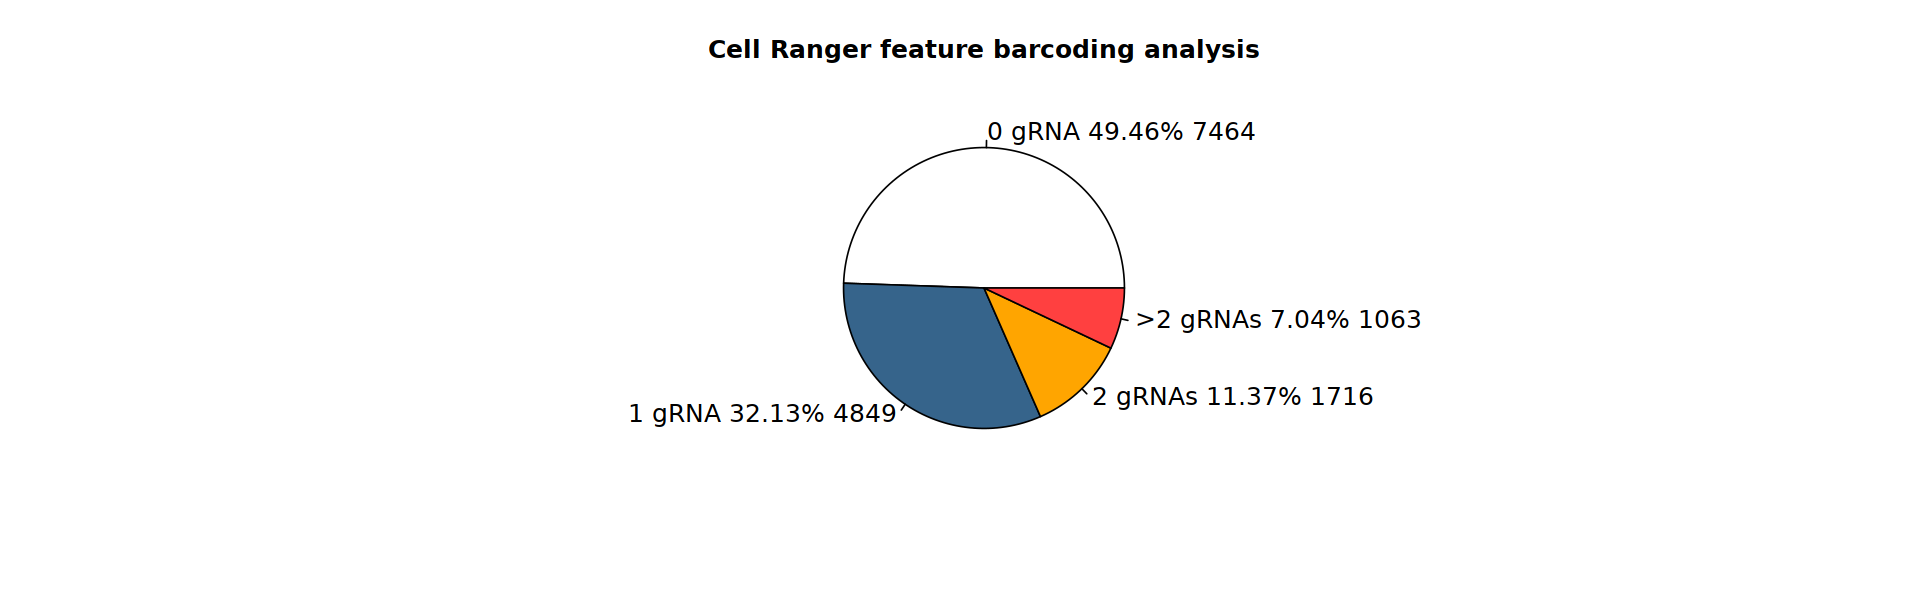

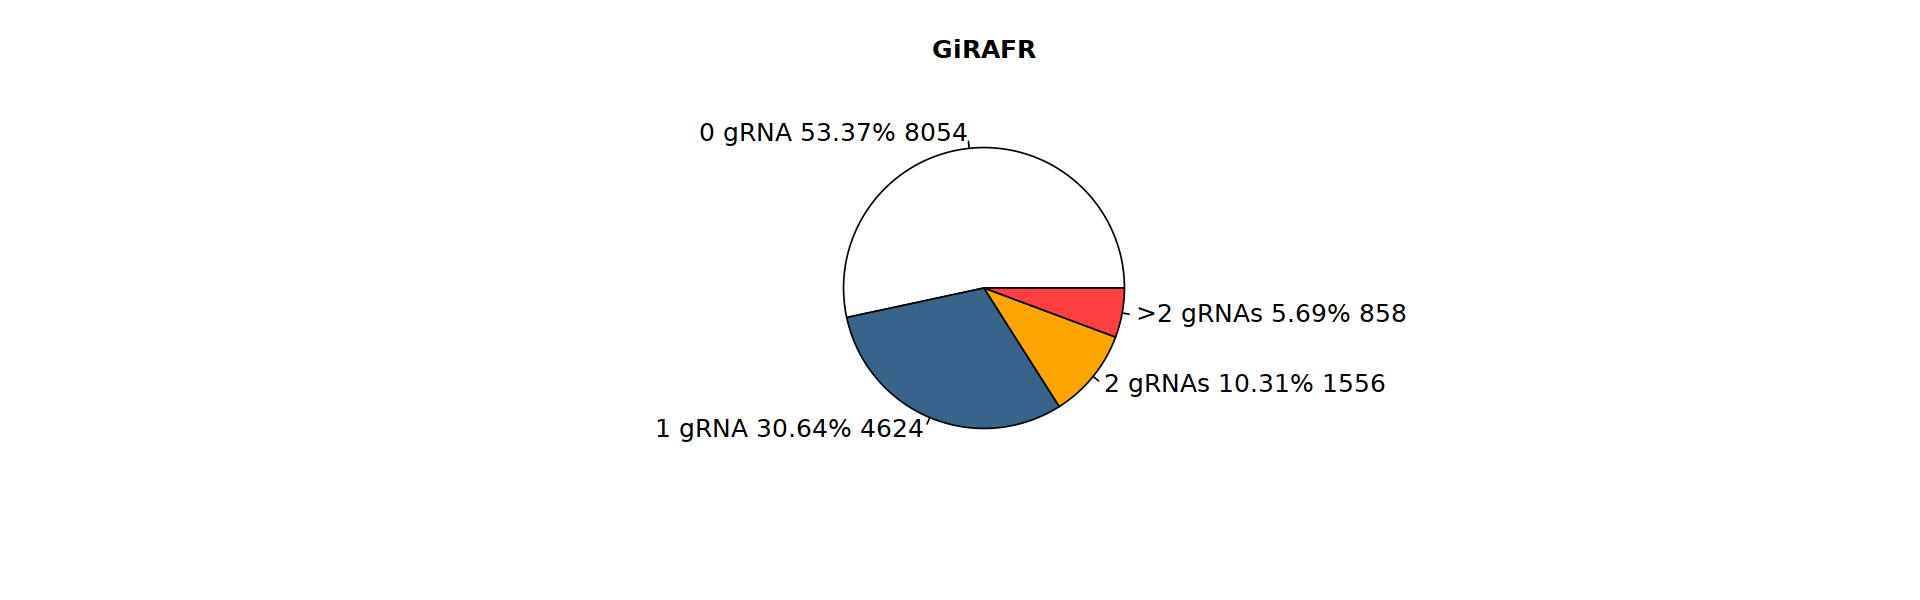

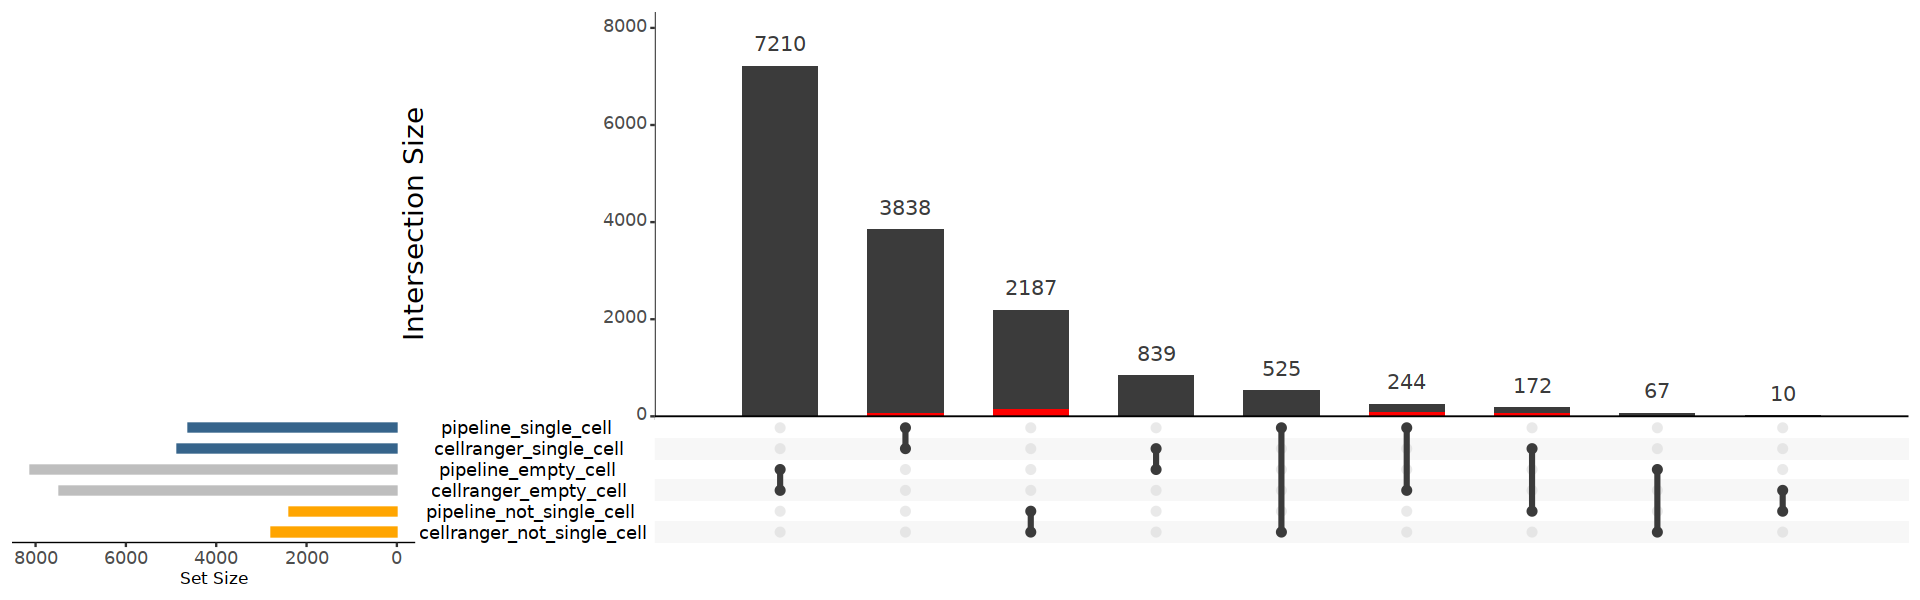

In [9]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/different_constant_sequence/lane_1/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/different_constant_sequence/lane_1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


In [10]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')

cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
table(cells.num_features$num_features)

sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
n_col 
sum(!is.na(cells.gRNA[,11]))+ sum(!is.na(cells.gRNA[,9])) + sum(!is.na(cells.gRNA[,7]))
# cells with mutations (multiplets count as multiple)


   1    2    3    4    5    6    7    8    9   10   11   12   16 
4624 1556  564  164   68   30   13    7    5    3    1    2    1 

[1] 10877

[1] 11

[1] 337

# CROP-seq_CRISPRi_10x Lane_2

GSM4632023	CROP-seq_CRISPRi_10x_lane_2

In [11]:
input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample2/'
output_dir = './figures_results/Tian_NatureNeuroscience/sample2'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 9698"
[1] "Wildtype UMI: 105728"
[1] "Mutant UMI: 4114"


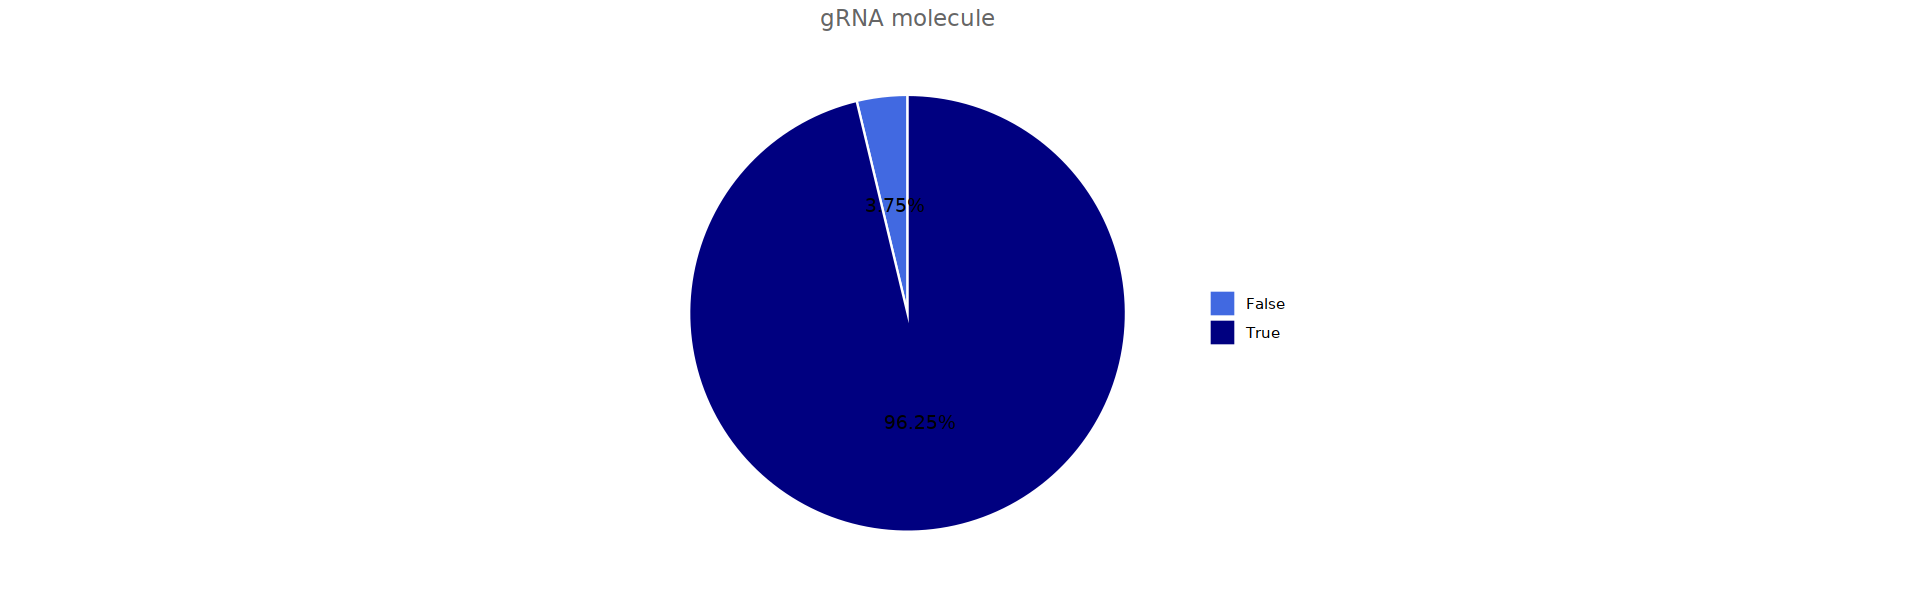

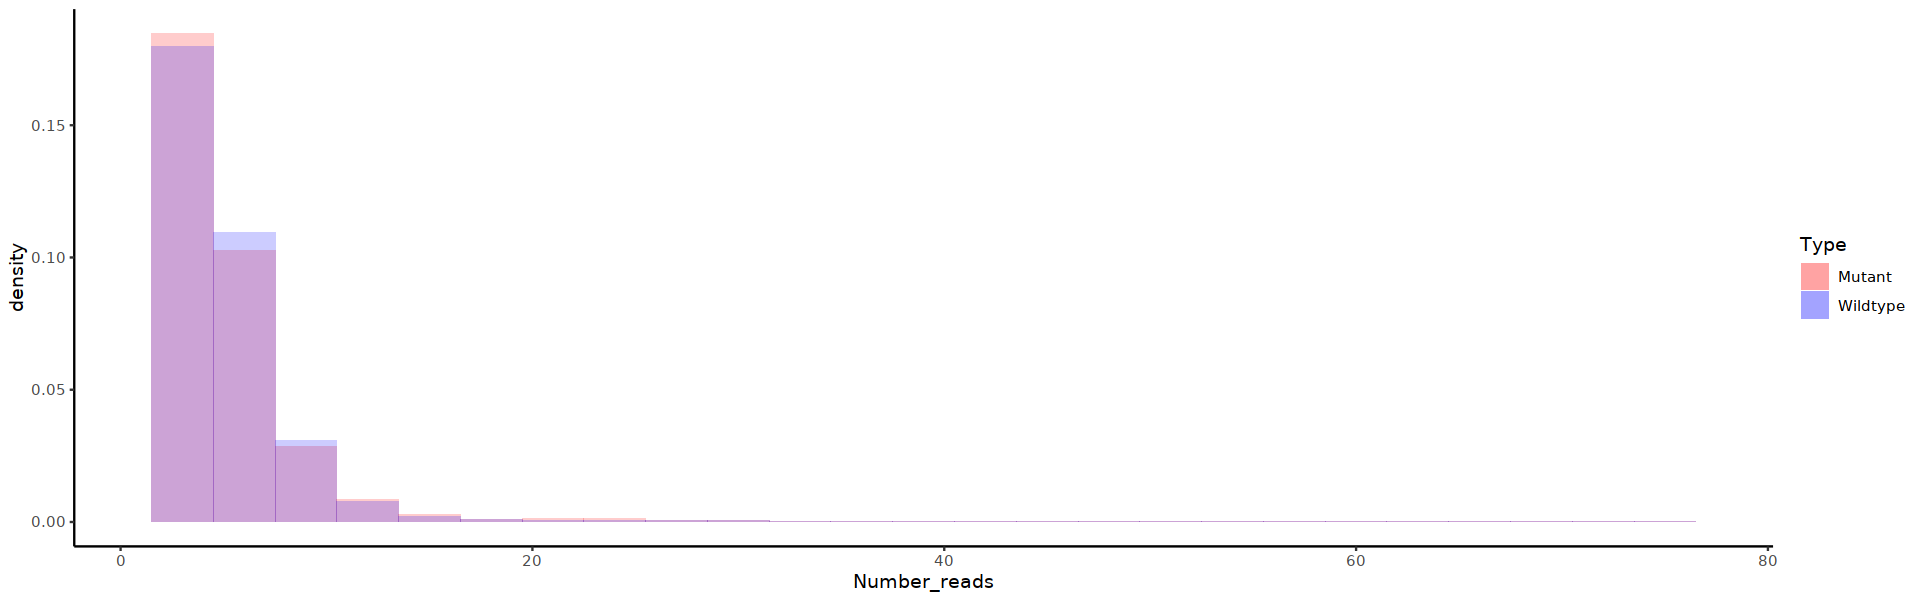

In [12]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(5) D(7)    G I(1) I(4)    T 
  97   29  111    7    4    1    1   22   14    1   28 
[1] "MT mutation type"

  D   I   S 
124  15 176 
[1] "MT mutation structure"

gRNA Rest   U6 
 233   55   27 


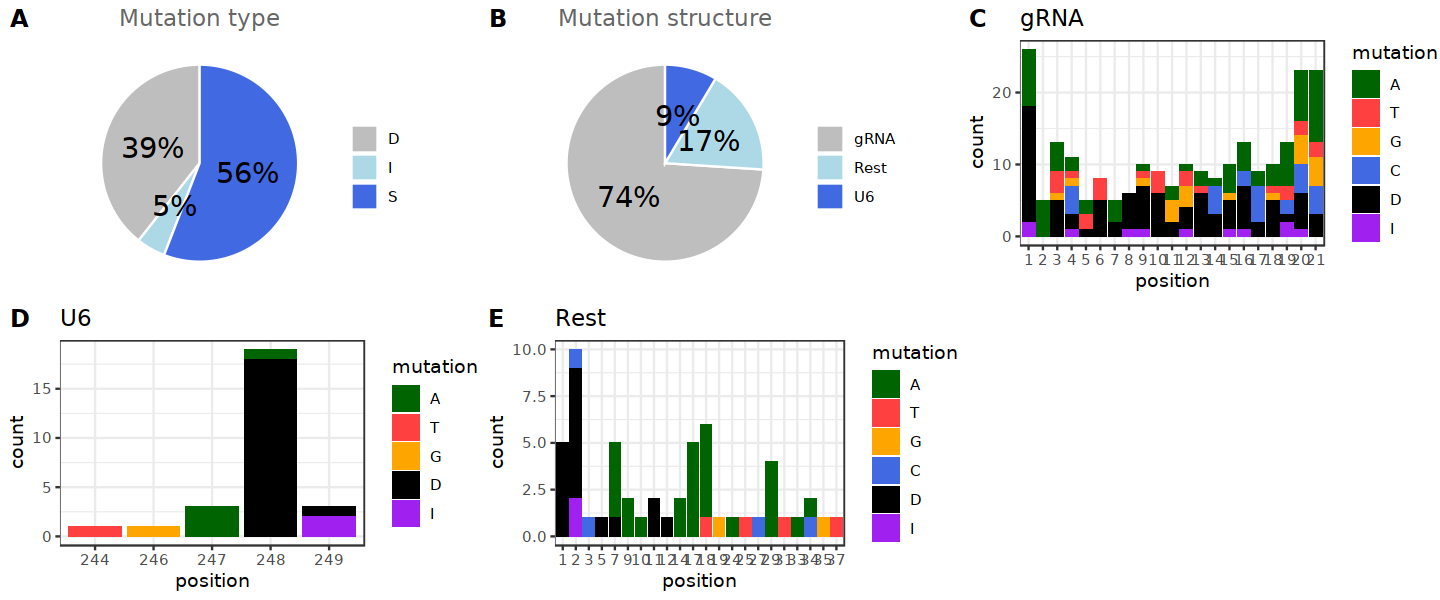

In [13]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [14]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.175   1.000   8.000 

Warning message:
“Removed 1 rows containing non-finite values (`stat_count()`).”


[1] 26

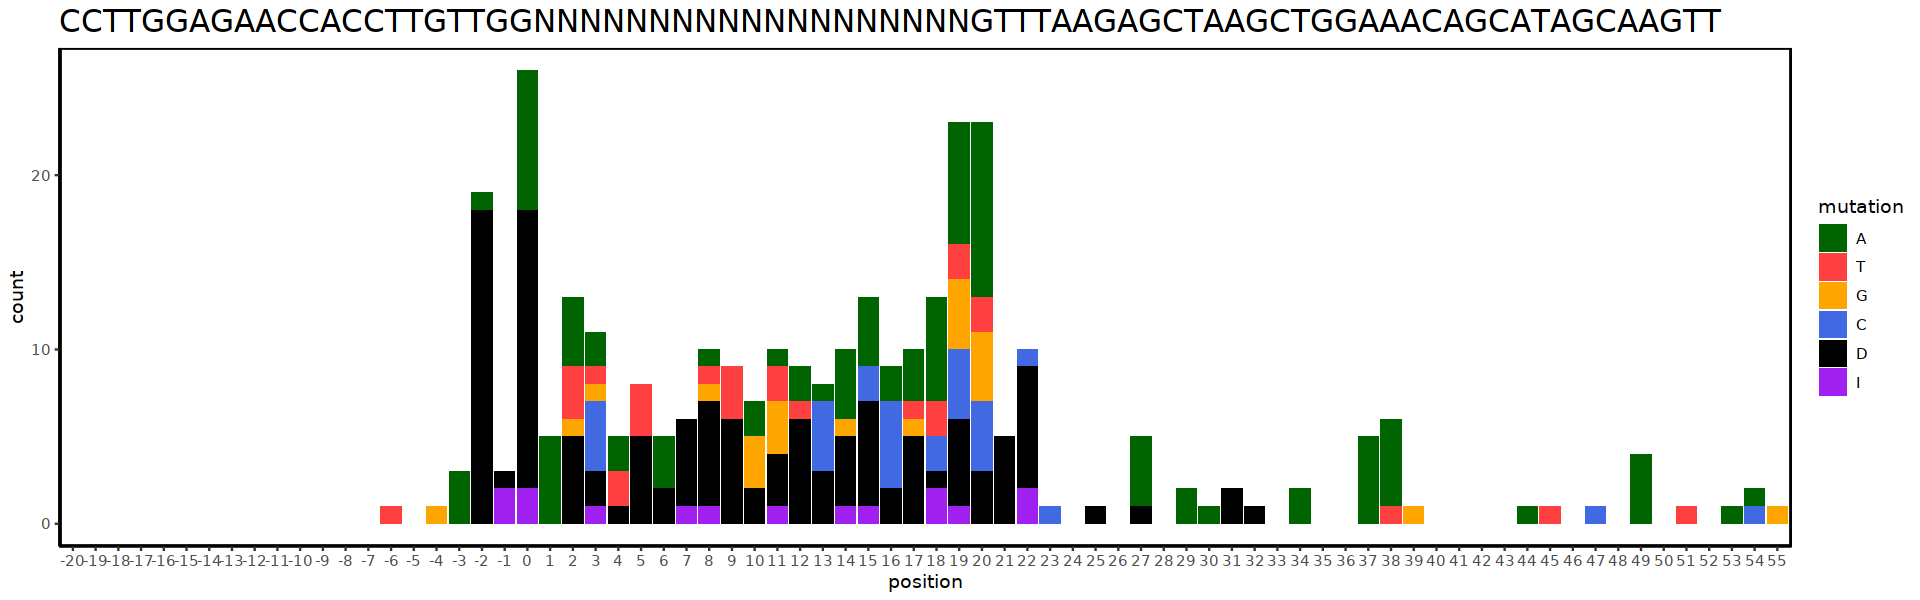

In [15]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
max(table(MT2$position))
#dev.off()

### Cell assignment

Rows: 14408 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


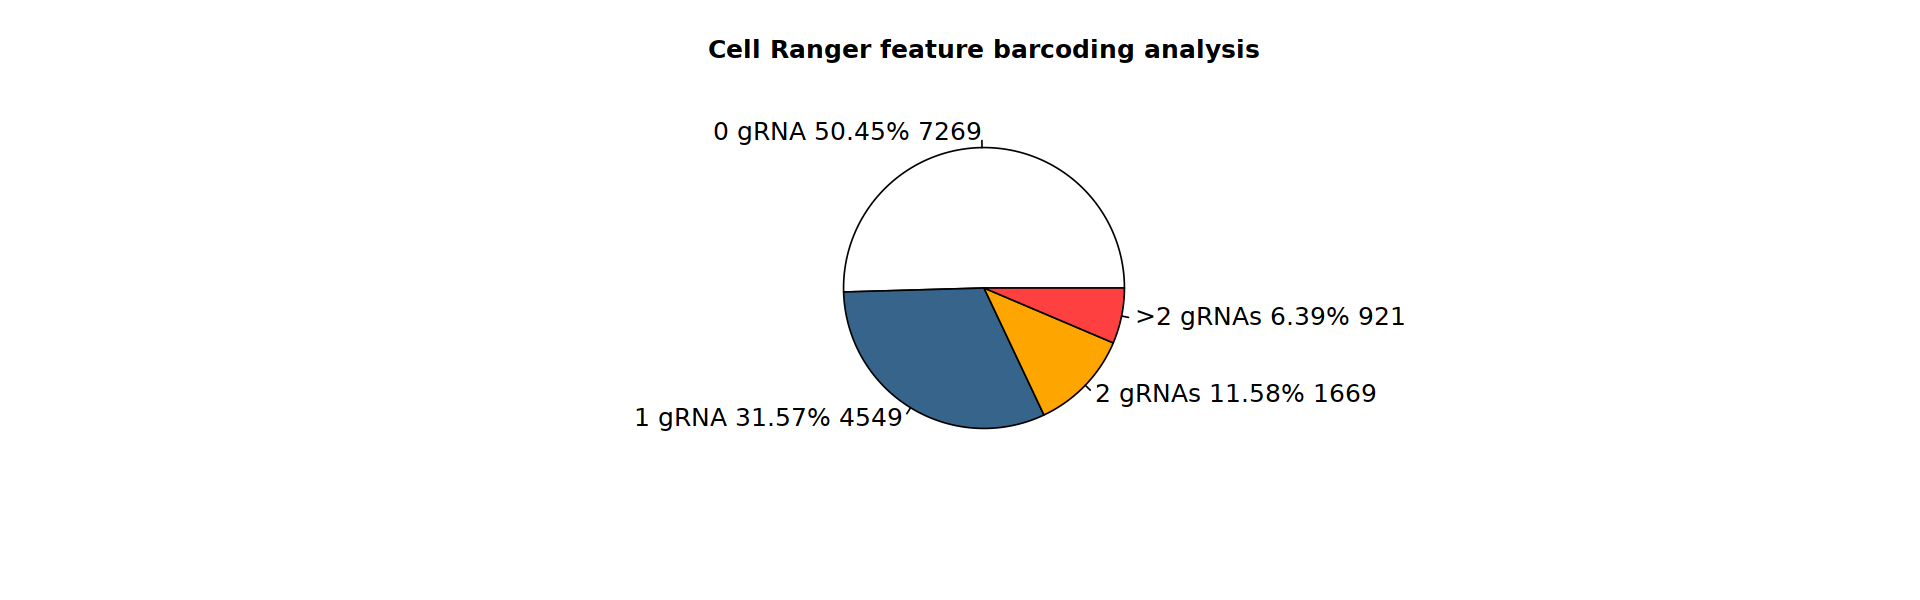

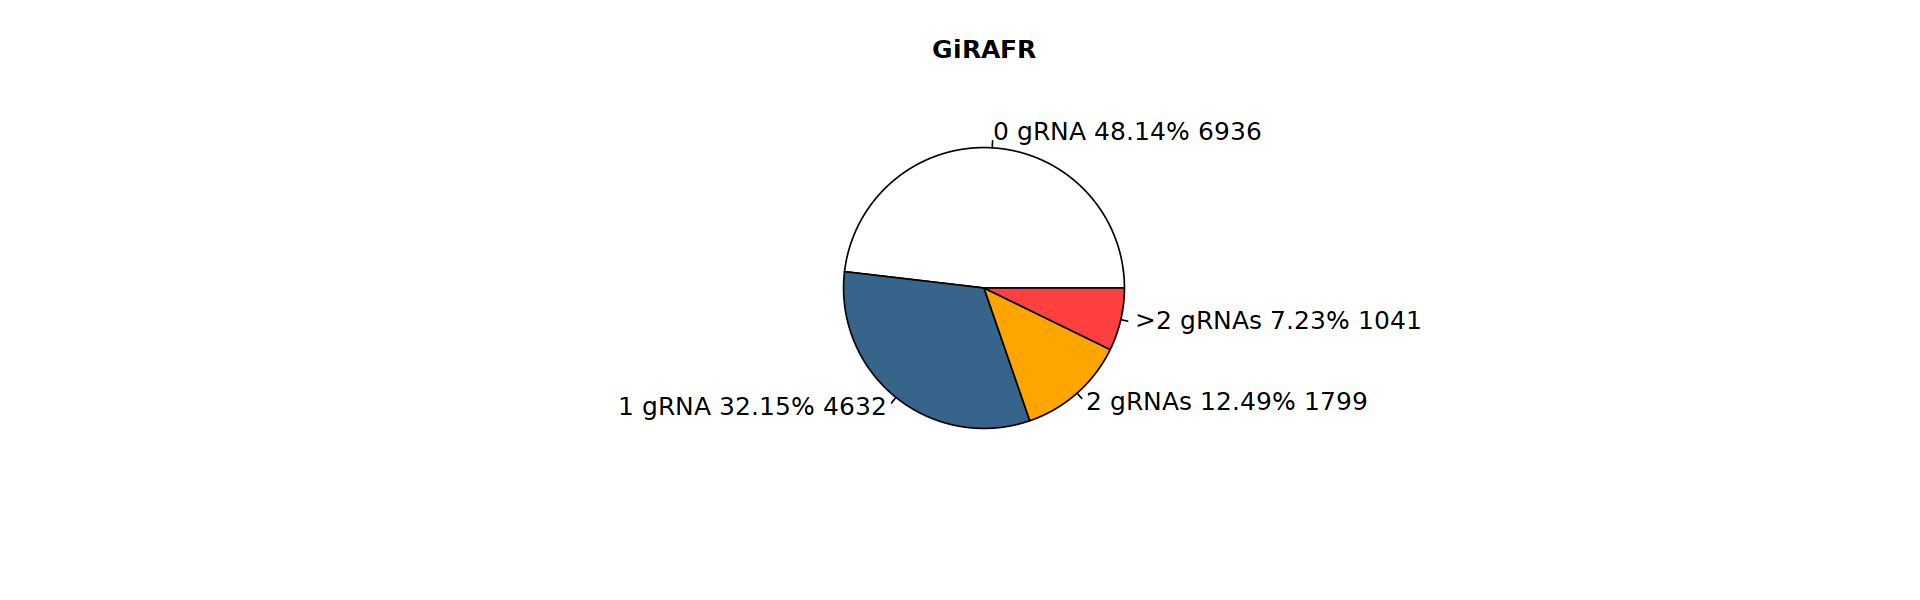

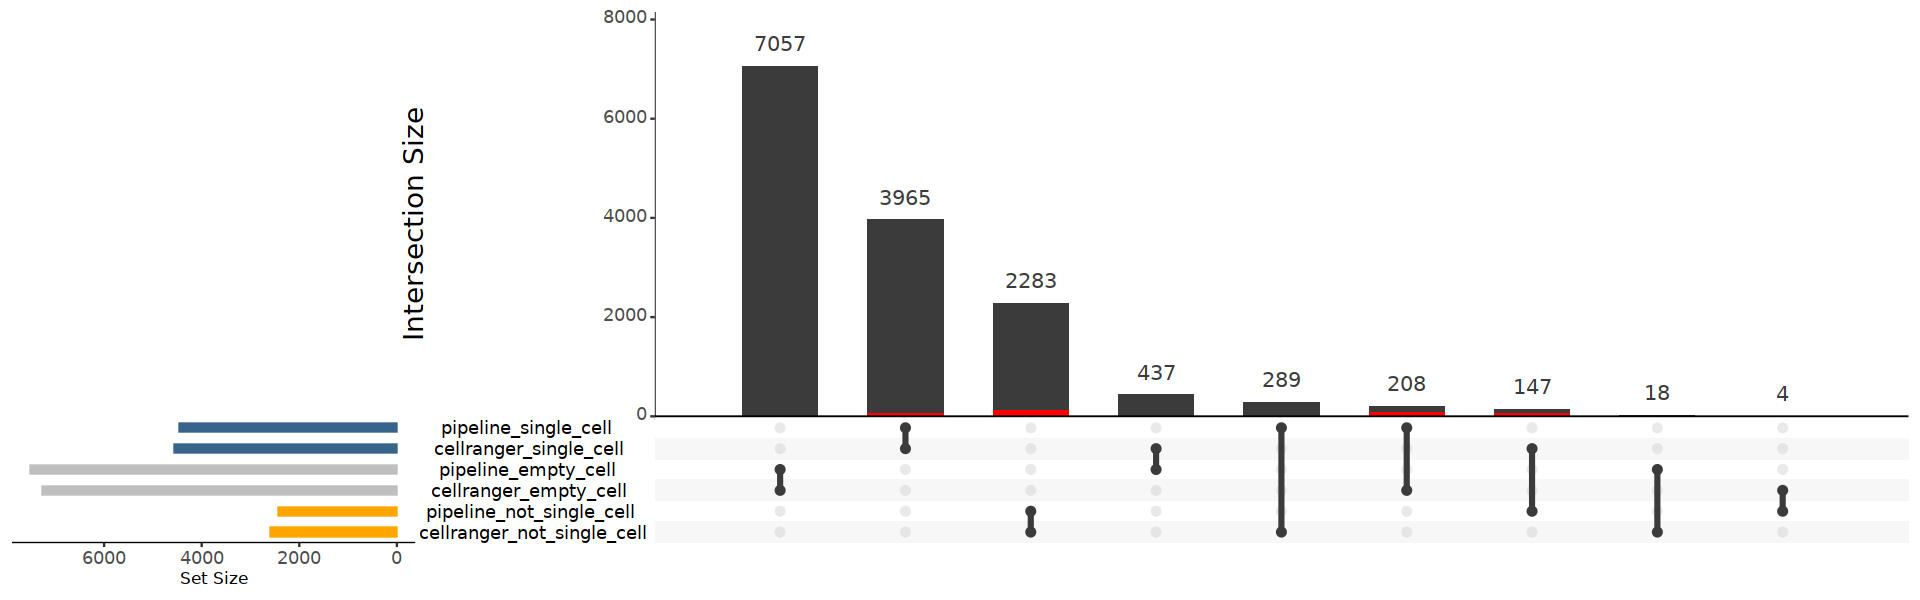

In [16]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/different_constant_sequence/lane_2/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/different_constant_sequence/lane_2/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)

In [17]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')

cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
table(cells.num_features$num_features)

sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
n_col 
sum(!is.na(cells.gRNA[,7]))
# cells with mutations (multiplets count as multiple)


   1    2    3    4    5    6    7    8    9   10   11   12   17 
4632 1799  635  244   89   35   17    8    8    1    2    1    1 

[1] 12082

[1] 8

[1] 368

# CROP-seq_CRISPRi_10x Lane_3

GSM4632025	CROP-seq_CRISPRi_10x_lane_3

In [18]:
input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample3/'
output_dir = './figures_results/Tian_NatureNeuroscience/sample3'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 6586"
[1] "Wildtype UMI: 45660"
[1] "Mutant UMI: 1905"


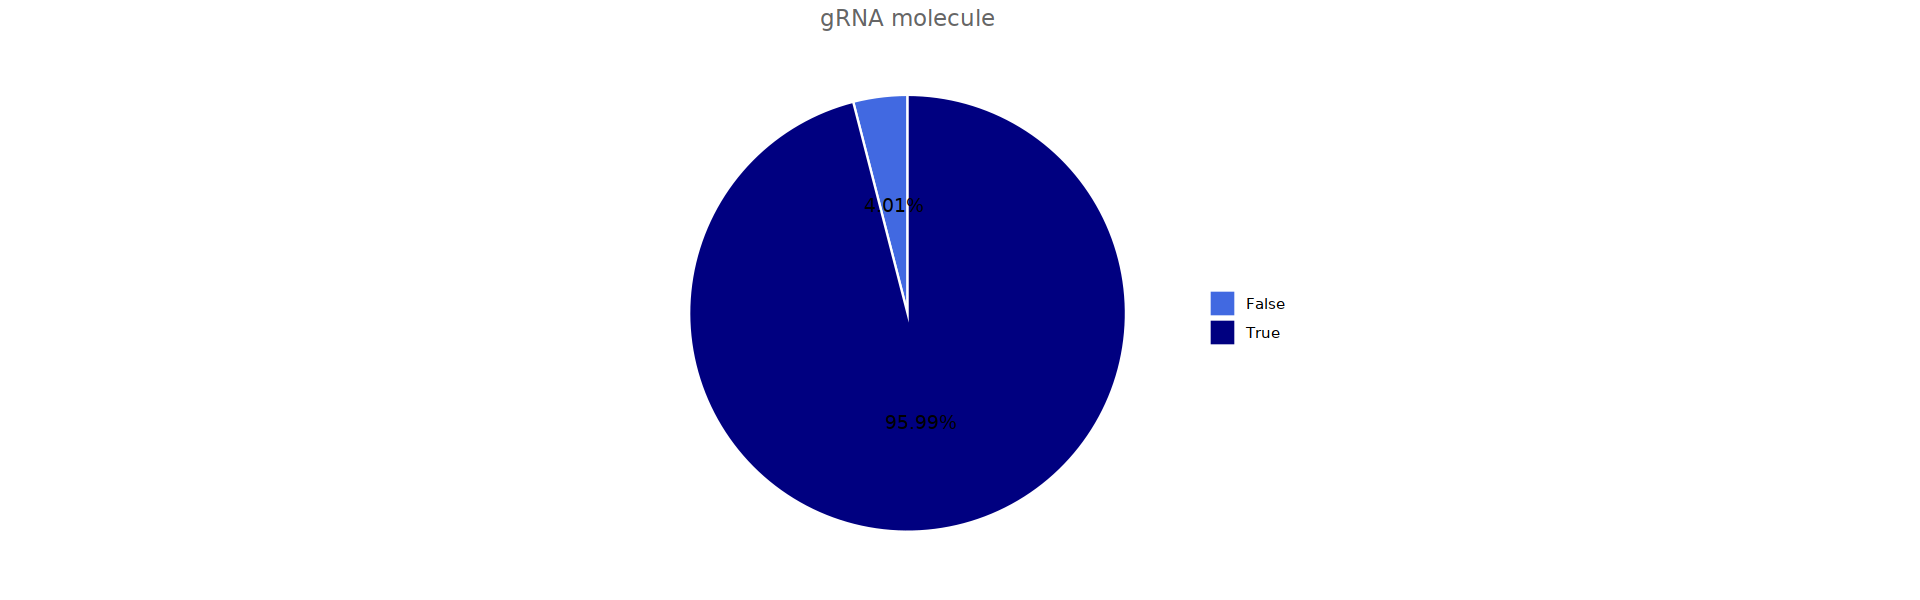

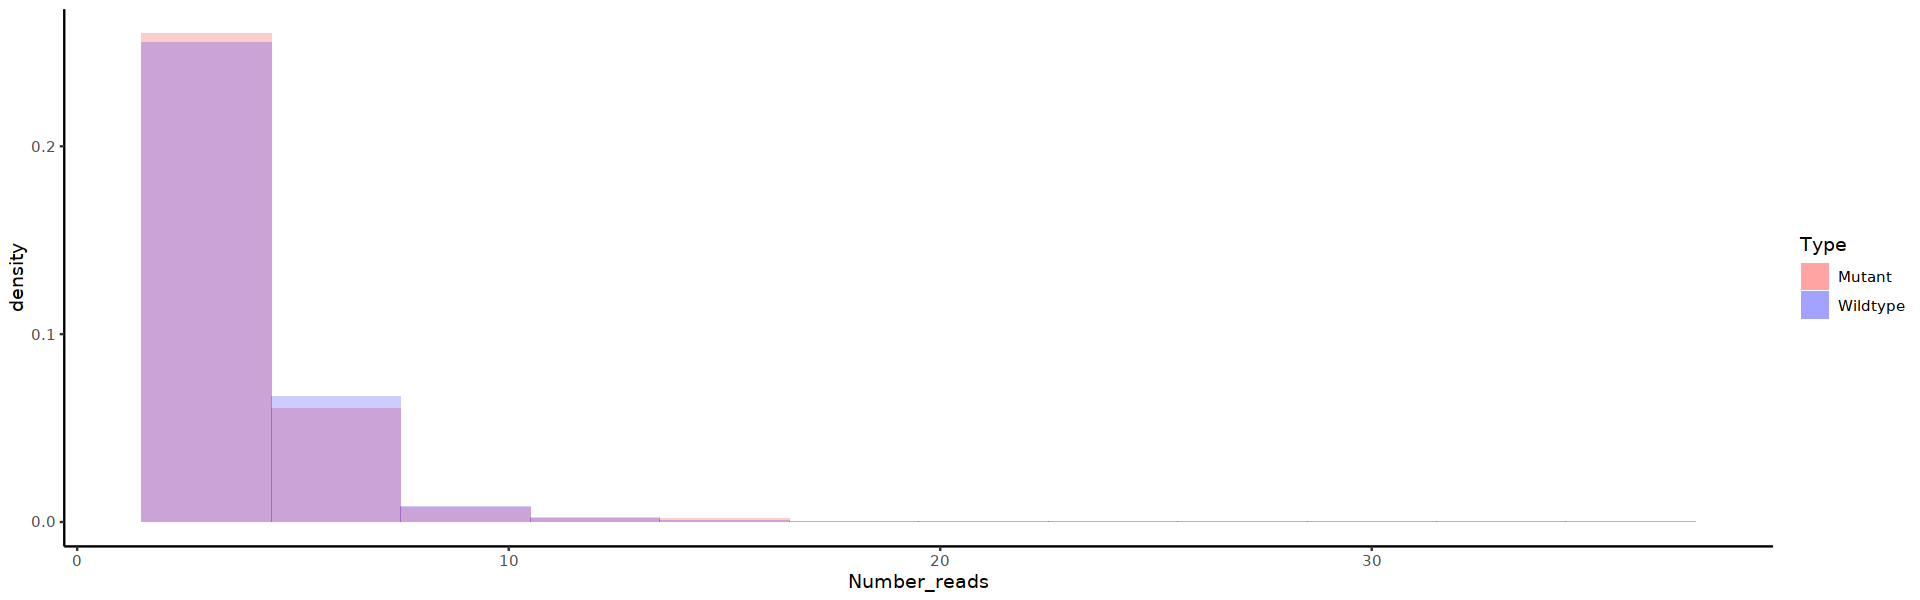

In [19]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3)    G I(1) I(2)    T 
  75   17   73    4    2   31    6    2   22 
[1] "MT mutation type"

  D   I   S 
 79   8 145 
[1] "MT mutation structure"

gRNA Rest   U6 
 152   65   15 


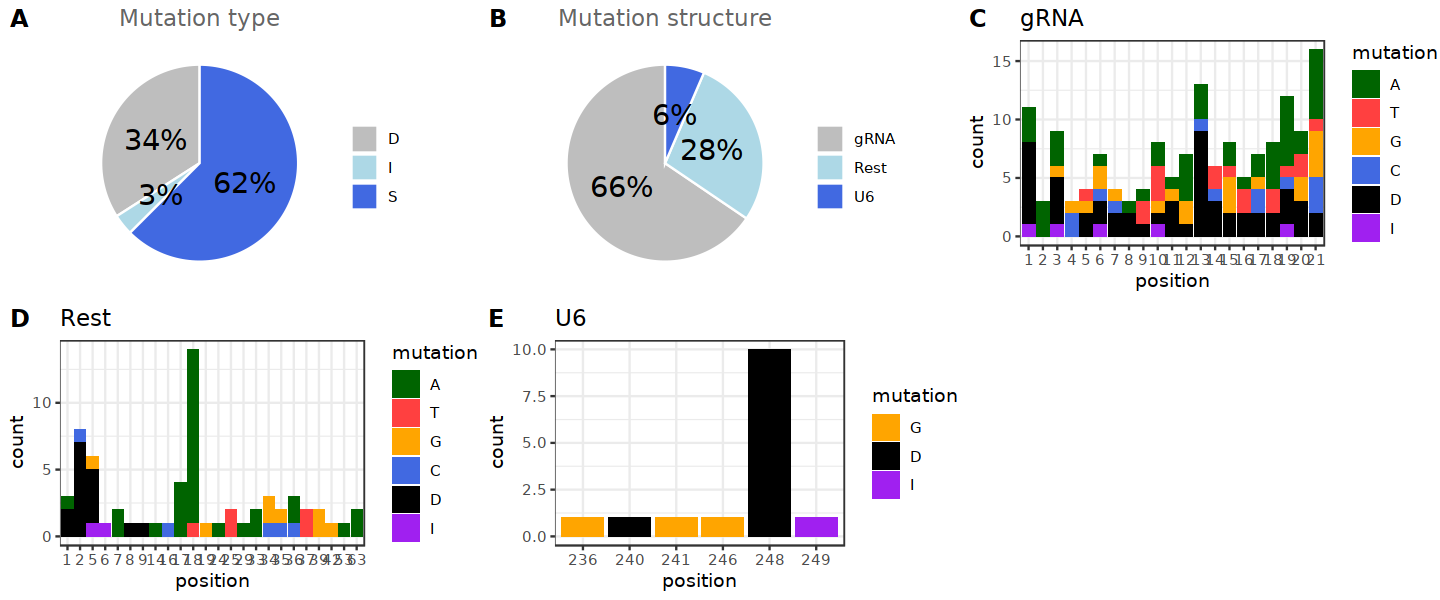

In [20]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [21]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.208   1.000   7.000 

Warning message:
“Removed 11 rows containing non-finite values (`stat_count()`).”


[1] 16

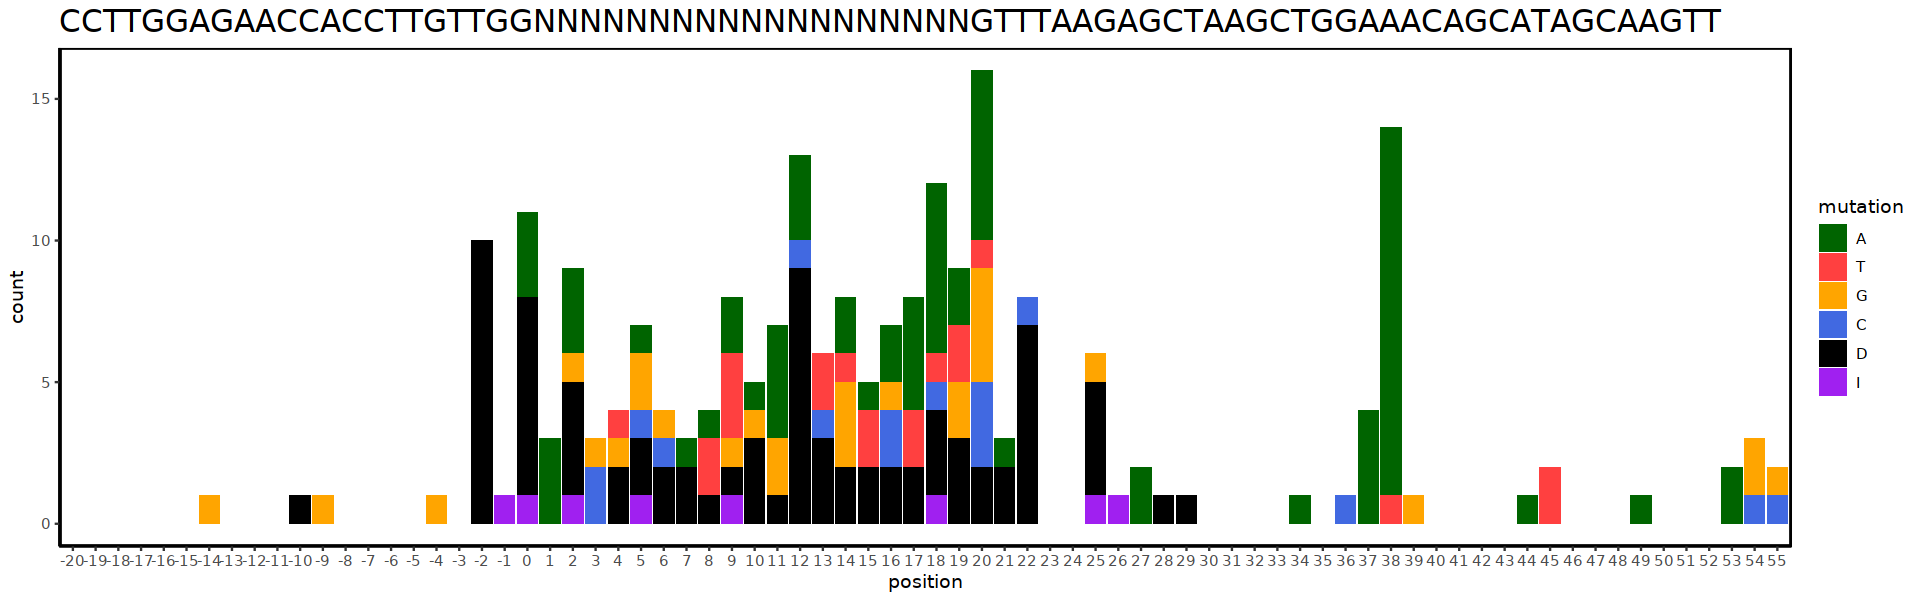

In [22]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
max(table(MT2$position))
#dev.off()

### Cell assignment

Rows: 11974 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


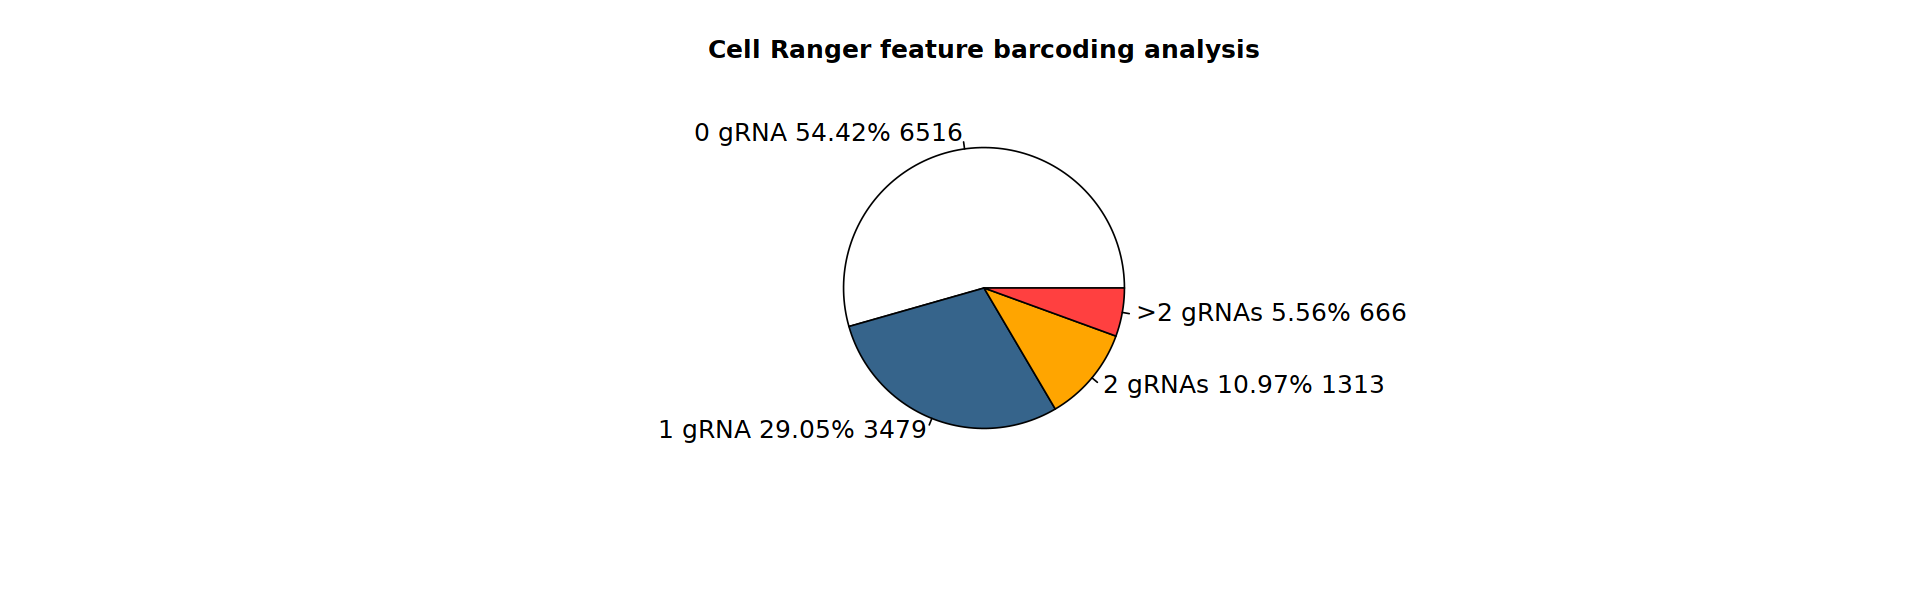

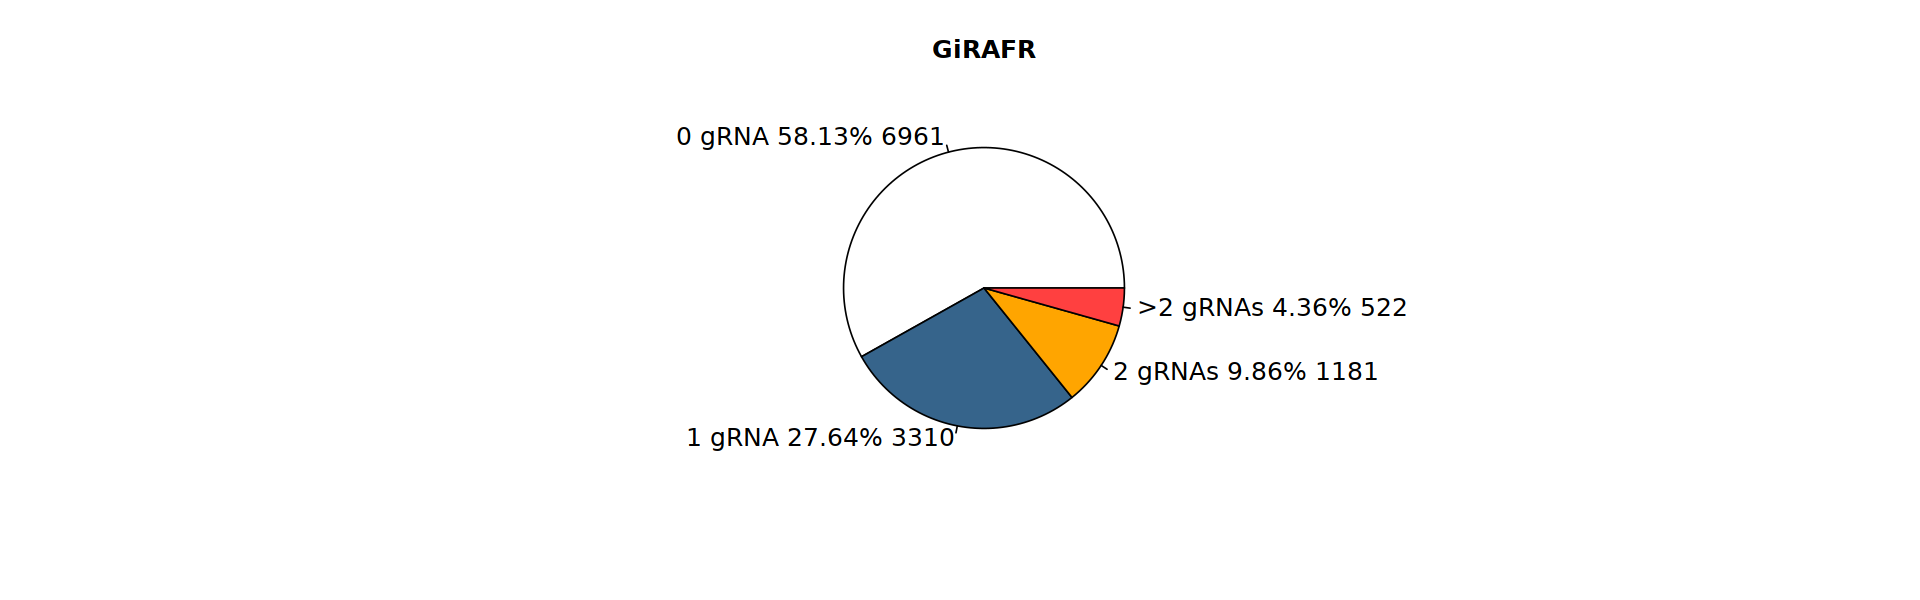

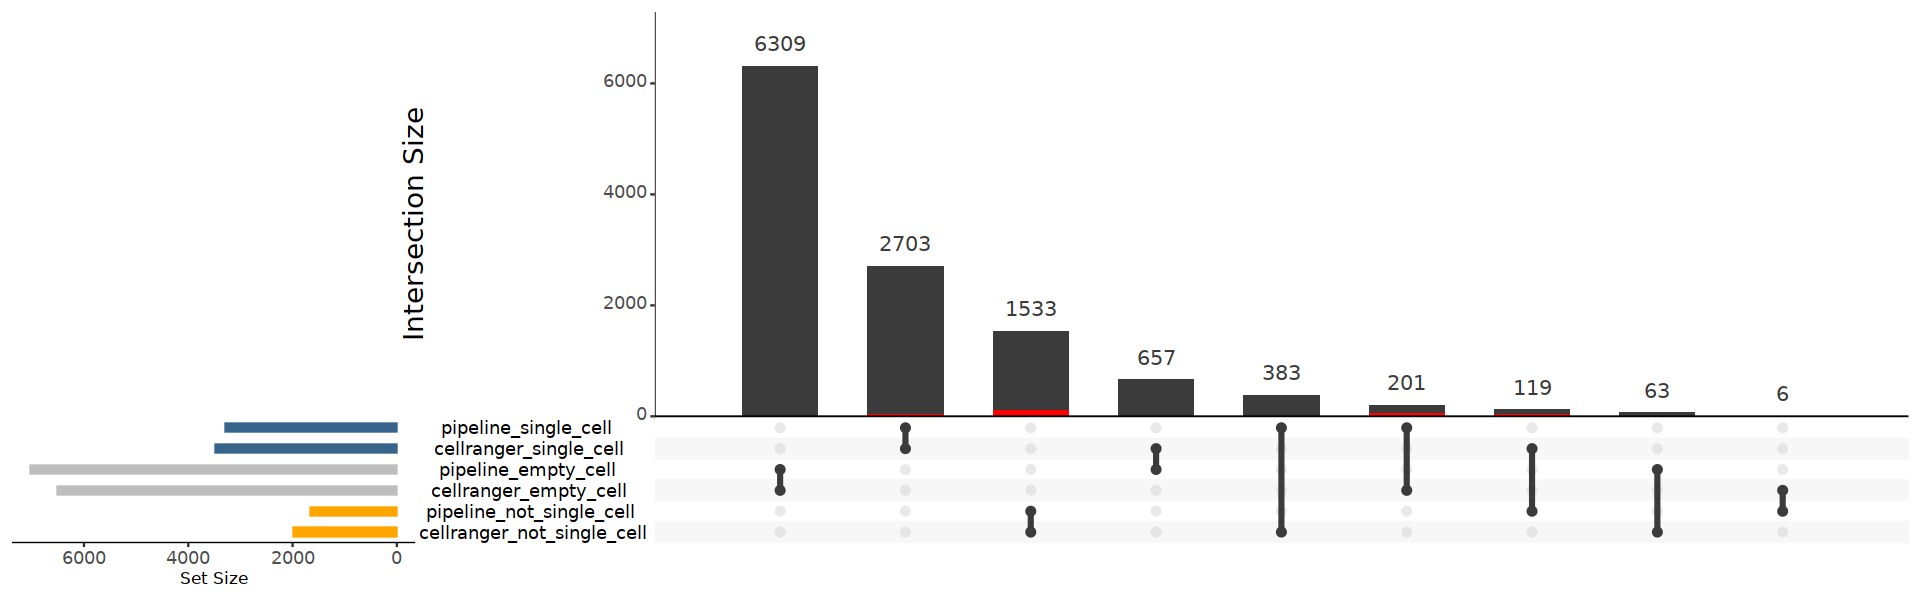

In [23]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/different_constant_sequence/lane_3/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/different_constant_sequence/lane_3/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)

In [24]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')

cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
table(cells.num_features$num_features)

sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
n_col 
sum(!is.na(cells.gRNA[,9])) + sum(!is.na(cells.gRNA[,7]))
# cells with mutations (multiplets count as multiple)


   1    2    3    4    5    6    7    8   12   13 
3310 1181  346  113   33   24    3    1    1    1 

[1] 7525

[1] 11

[1] 248

# CROP-seq_CRISPRi_10x Lane_4

GSM4632026	CROP-seq_CRISPRi_10x_lane_4

In [25]:
input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample4/'
output_dir = './figures_results/Tian_NatureNeuroscience/sample4'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 9842"
[1] "Wildtype UMI: 55111"
[1] "Mutant UMI: 2373"


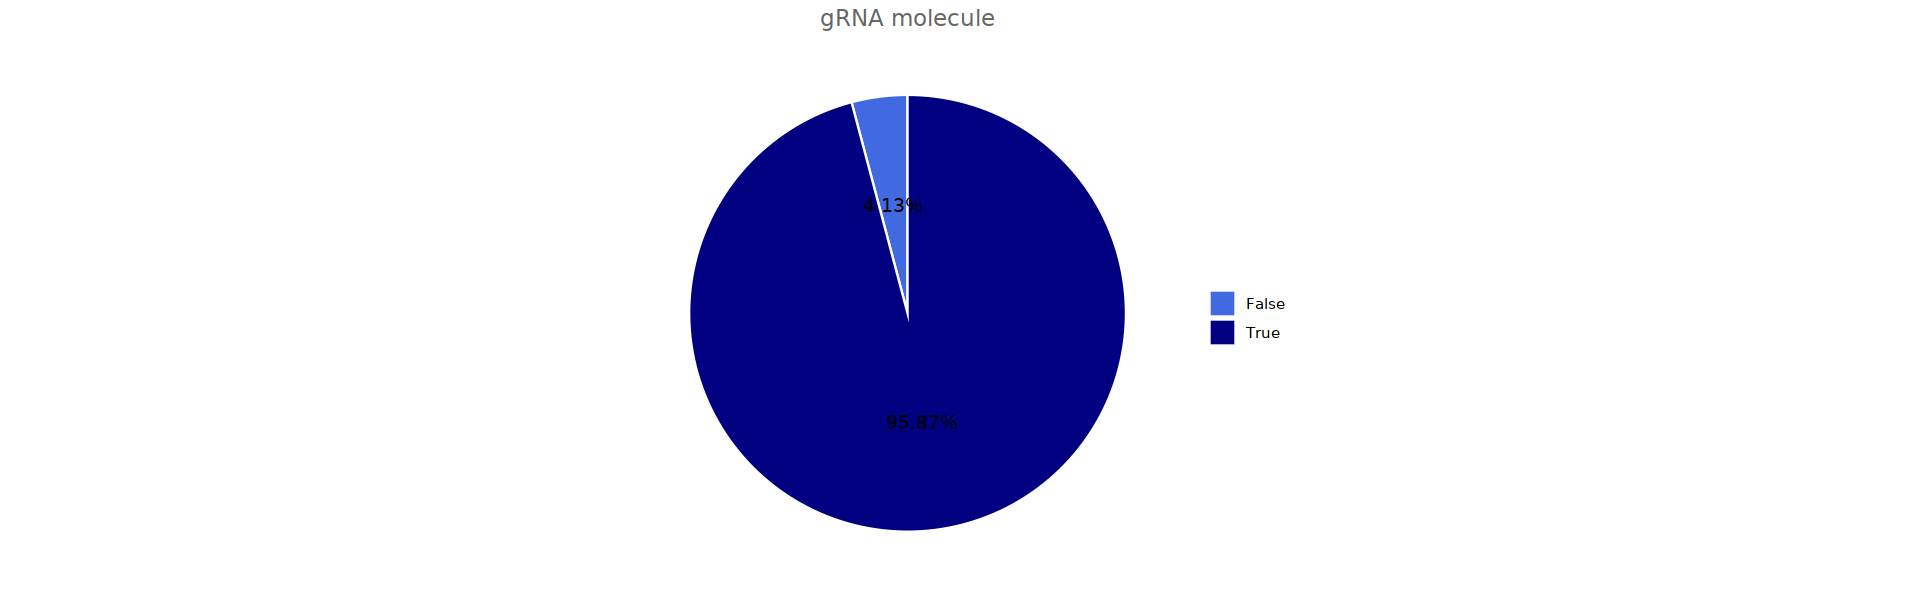

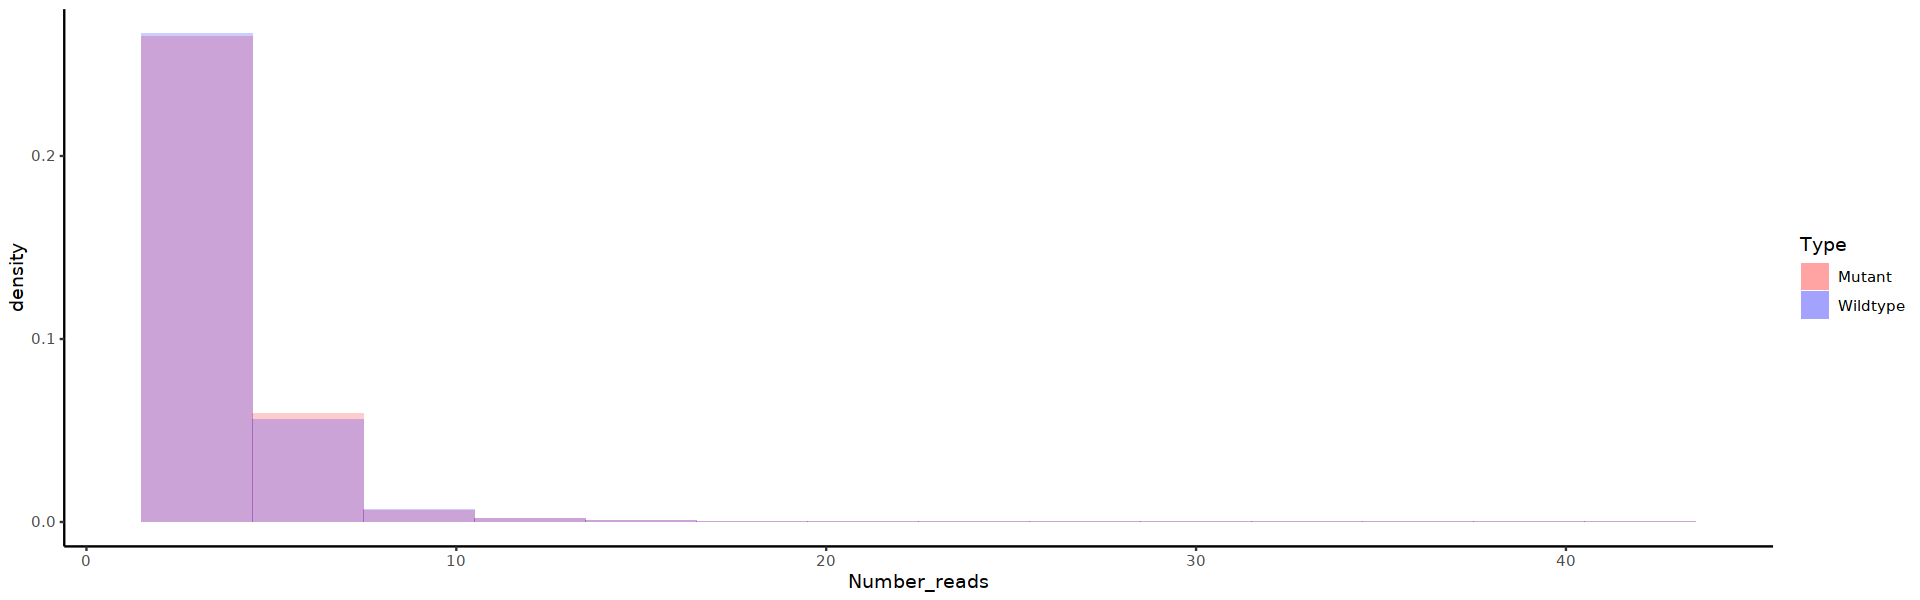

In [26]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(4)    G I(1) I(2)    T 
 113   42  100   11    2   70   15    1   50 
[1] "MT mutation type"

  D   I   S 
113  16 275 
[1] "MT mutation structure"

gRNA Rest   U6 
 245  120   39 


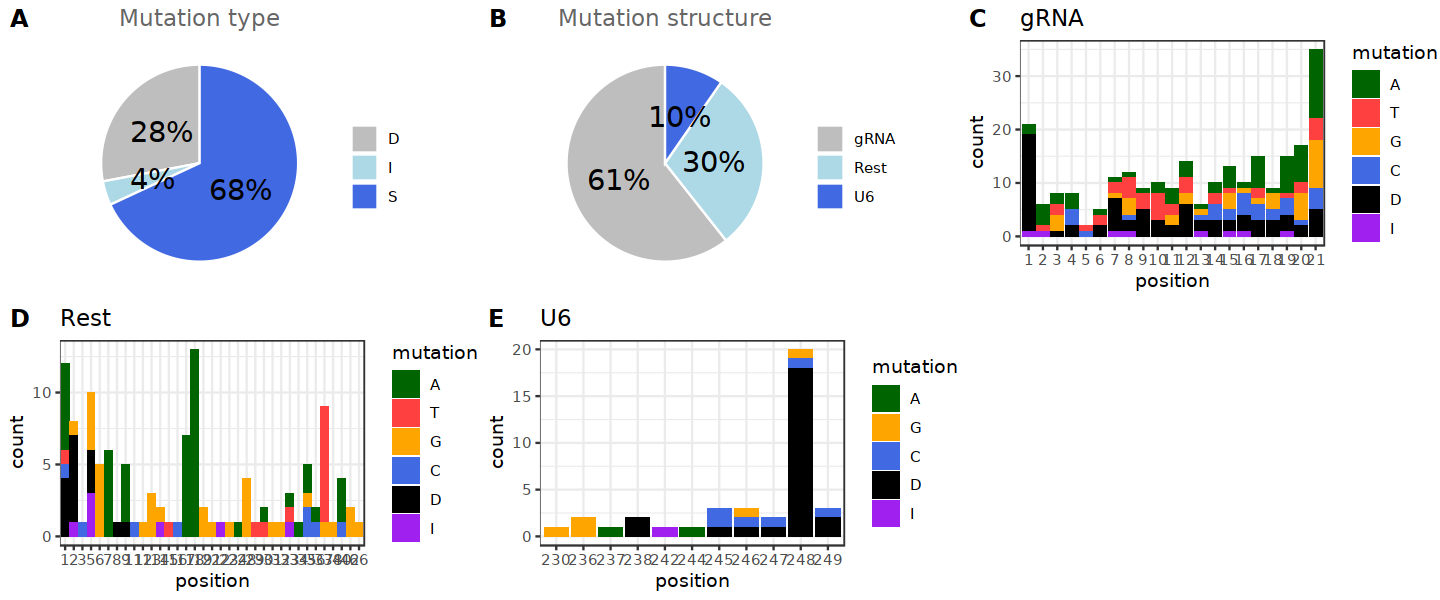

In [27]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [28]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.232   1.000  11.000 

Warning message:
“Removed 19 rows containing non-finite values (`stat_count()`).”


[1] 35

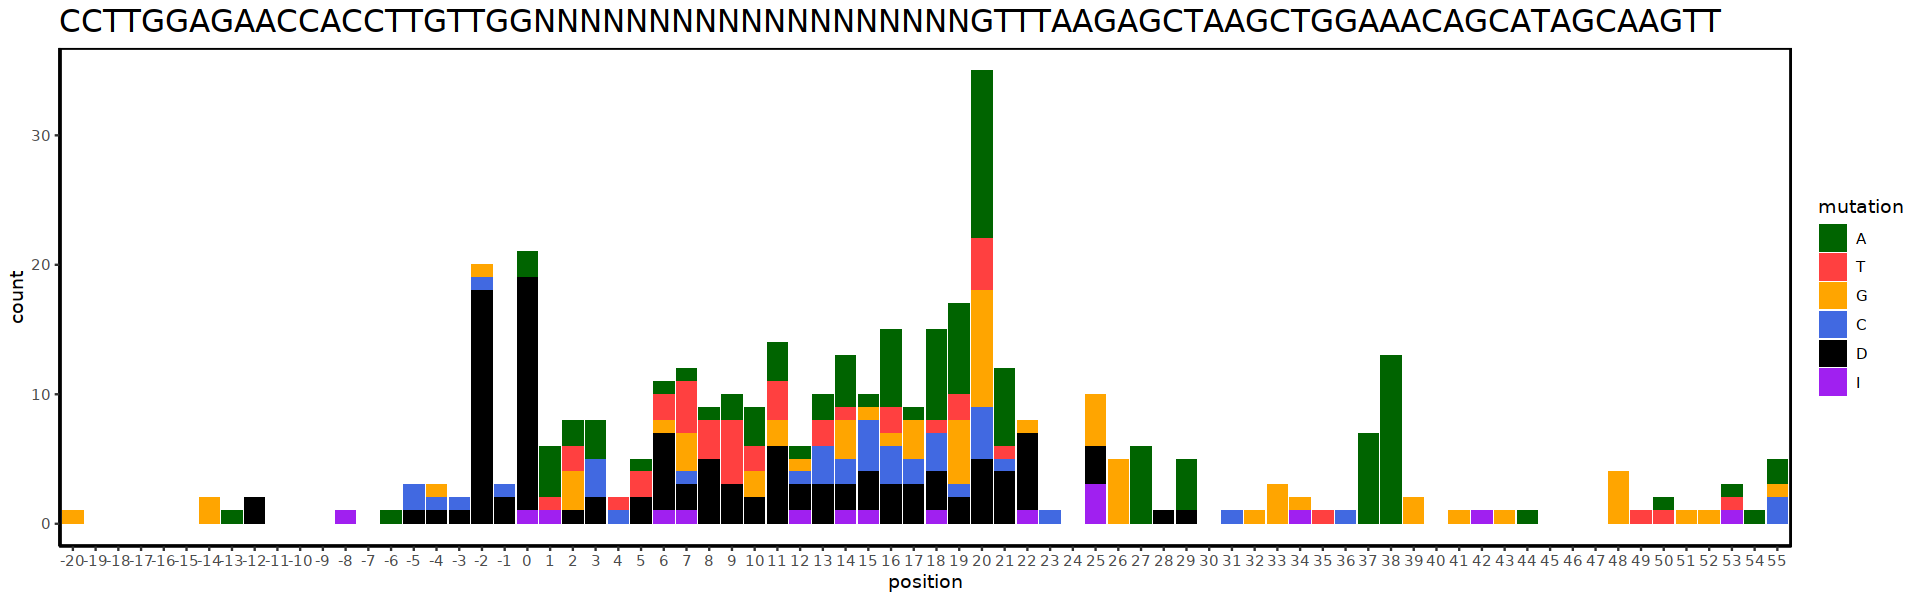

In [29]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
max(table(MT2$position))
#dev.off()


### Cell assignment

Rows: 17183 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


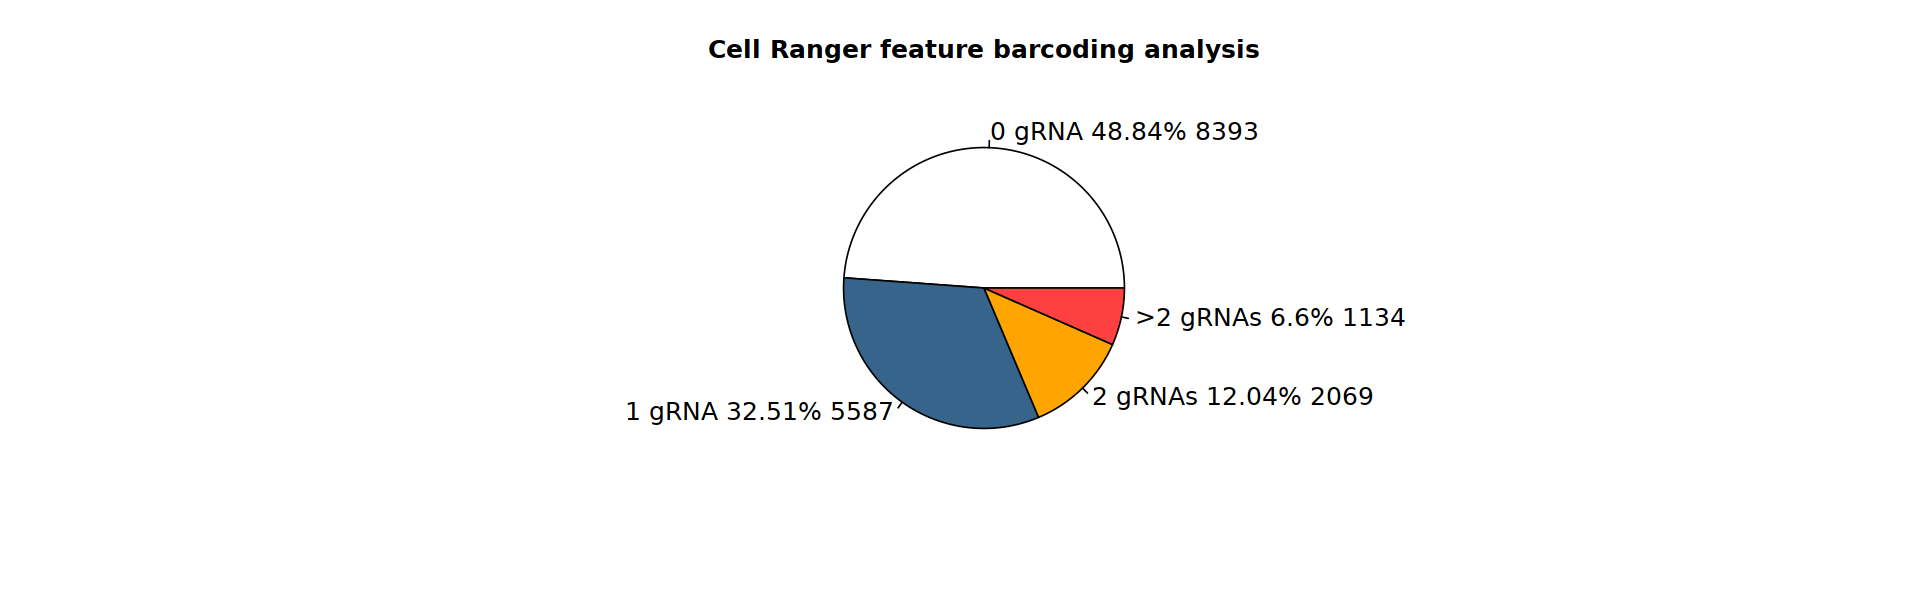

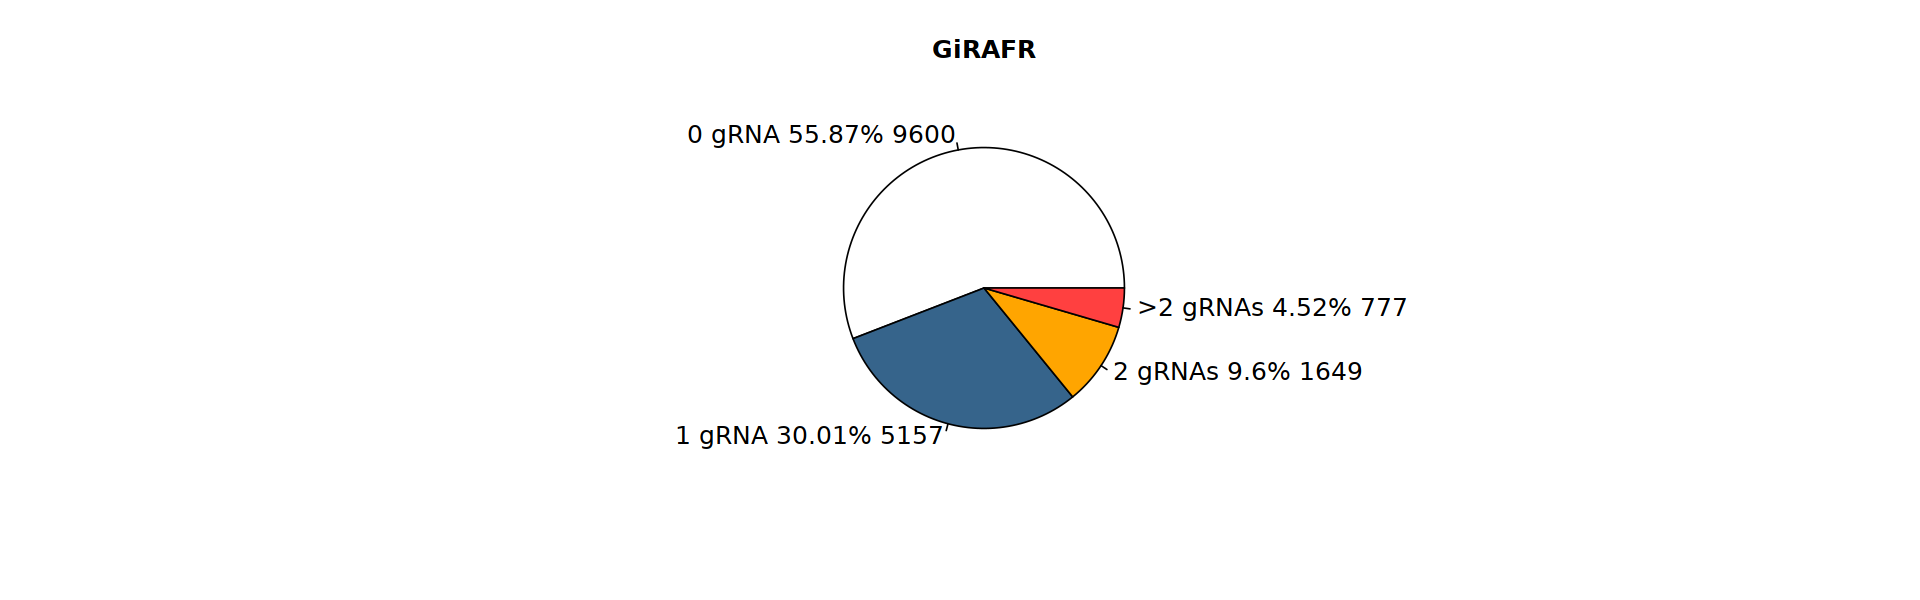

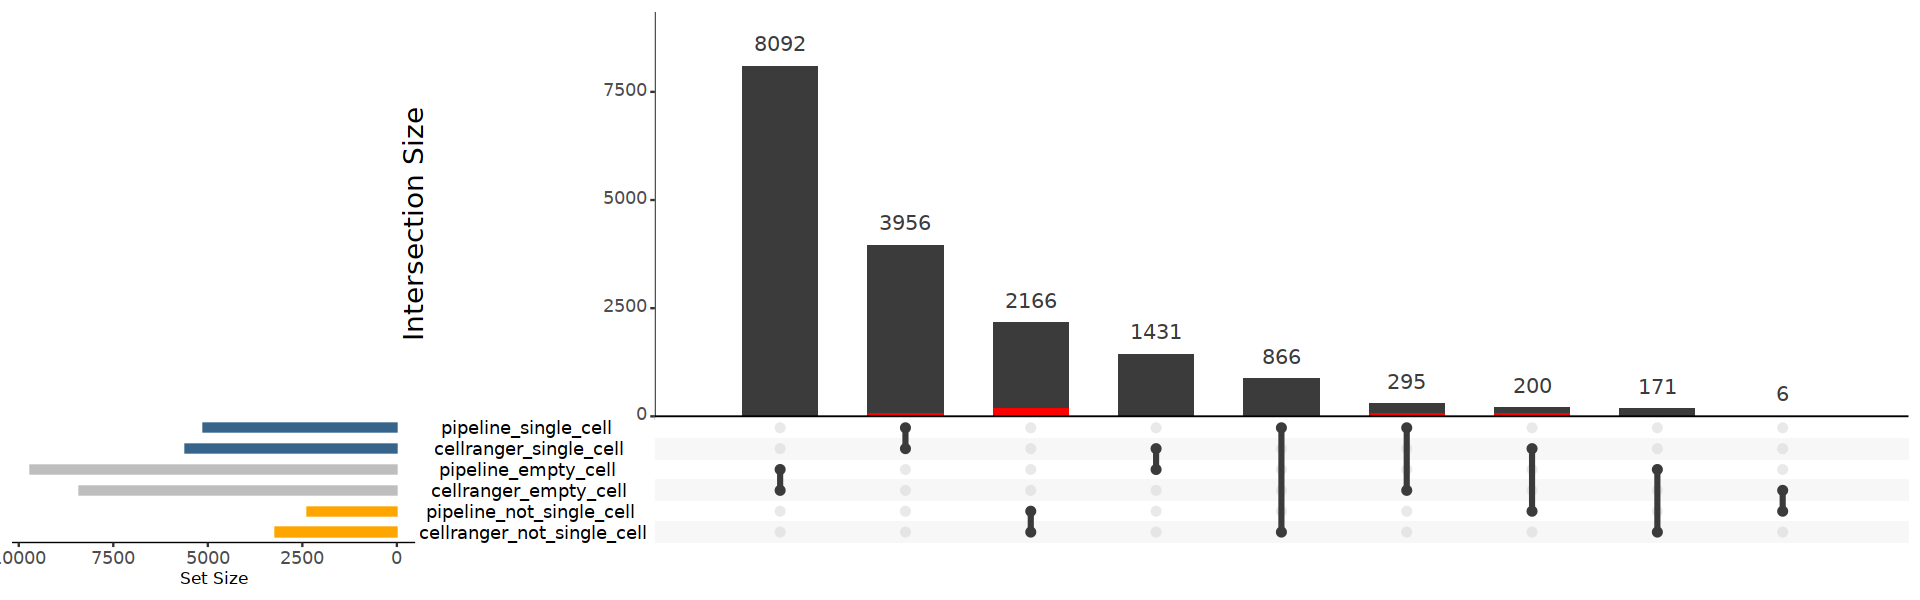

In [30]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_4/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_4/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


In [31]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')

cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
table(cells.num_features$num_features)

sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
n_col 
sum(!is.na(cells.gRNA[,9])) + sum(!is.na(cells.gRNA[,7]))
# cells with mutations (multiplets count as multiple)


   1    2    3    4    5    6    7    8    9   10   13   16 
5157 1649  502  173   56   21   12    6    4    1    1    1 

[1] 11266

[1] 11

[1] 428

# combine samples MT pattern

Warning message:
“Removed 41 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 41 rows containing non-finite values (`stat_count()`).”


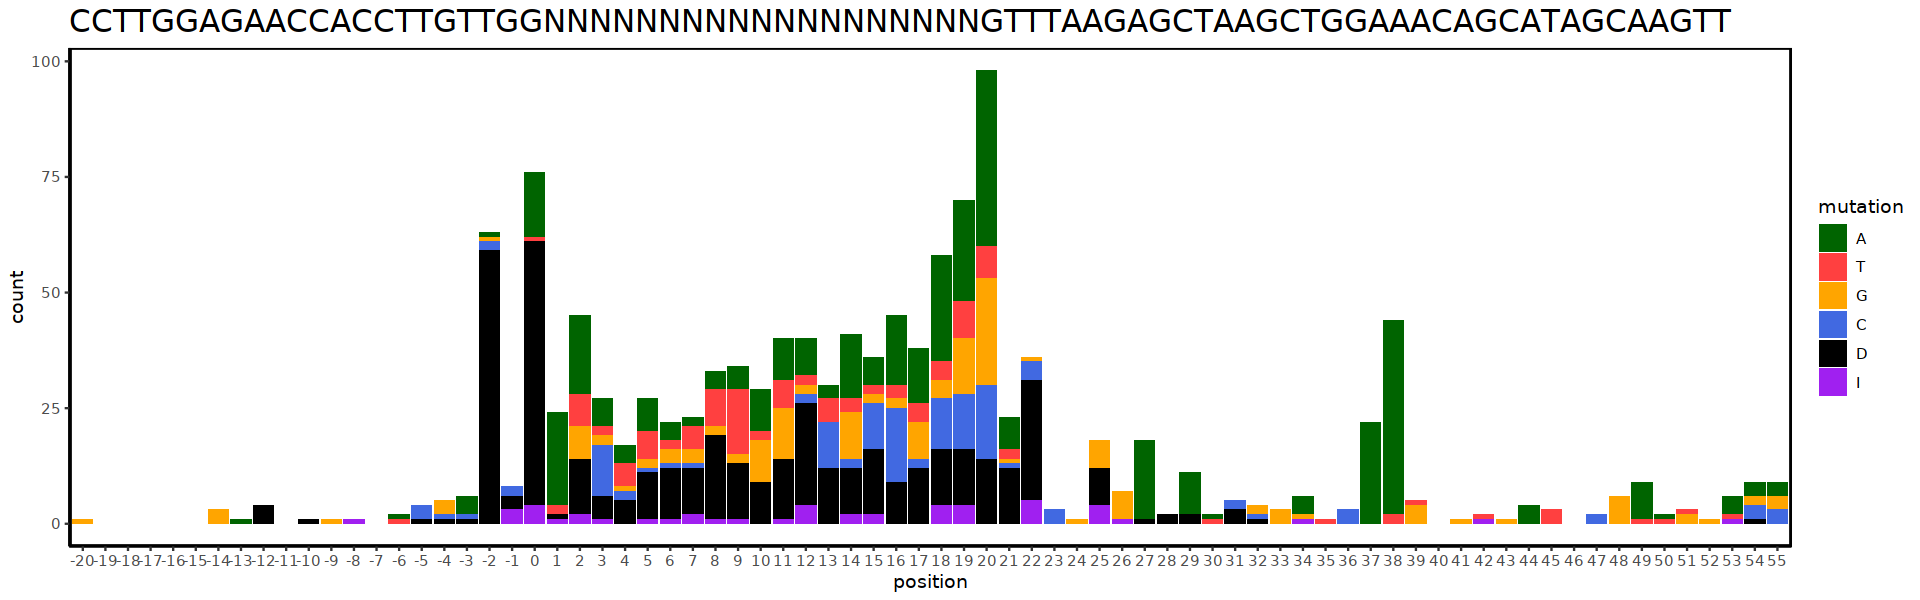

[1] 98

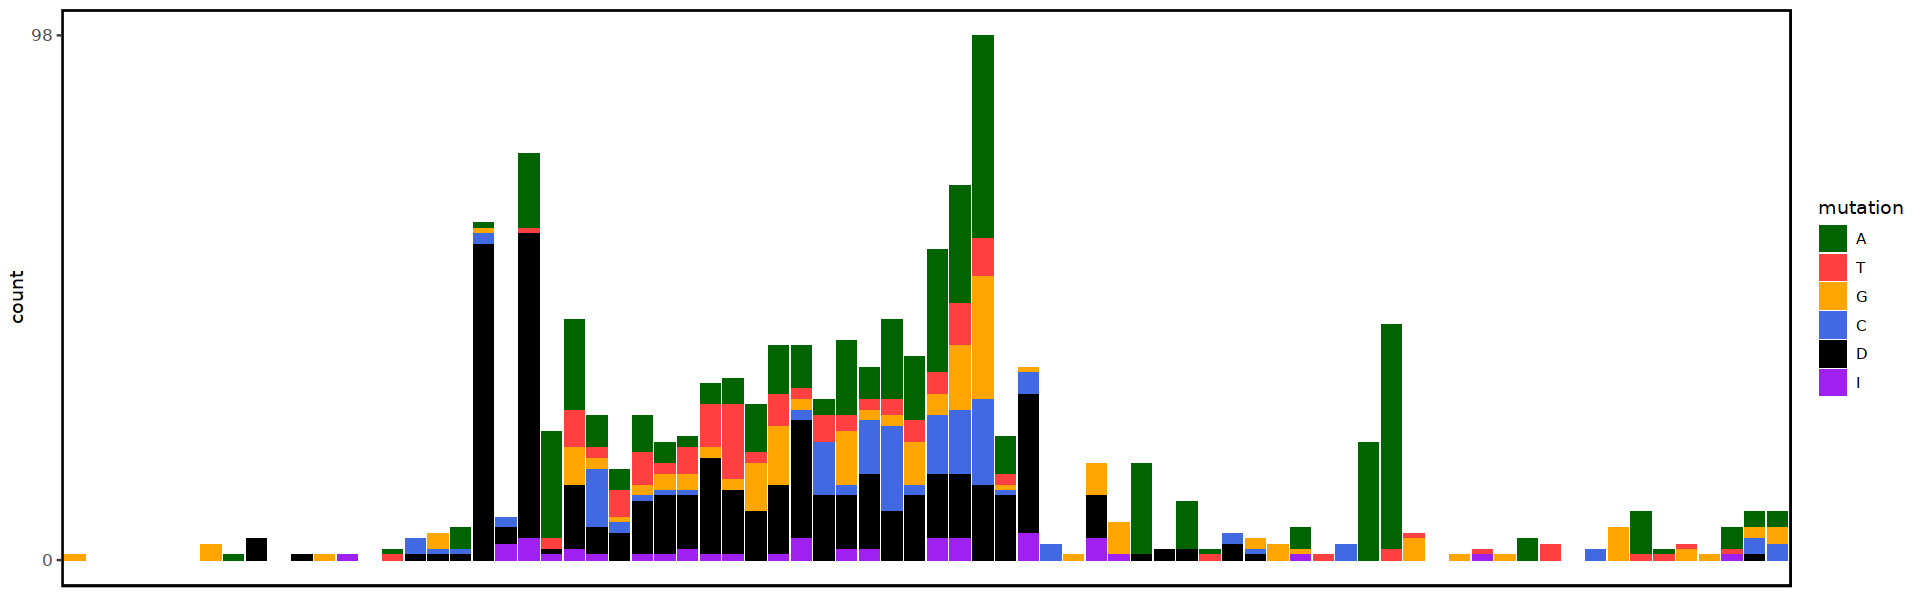

In [32]:
rm(list = ls())
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample3/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample3 <- read.table(MT_file, header = FALSE)
colnames(MT_sample3) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample4/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample4 <- read.table(MT_file, header = FALSE)
colnames(MT_sample4) <- c('gene name','structure','structure length', 'position','mutation','variant number')

#save_pdf <- paste0('./figures_results/Tian_NatureNeuroscience/', 'Combined.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)

MT2 <- rbind(rbind(rbind(MT_sample1, MT_sample2), MT_sample3), MT_sample4)
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      axis.text.y = element_text(size=10),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,max(table(MT2$position))))
max(table(MT2$position))
#dev.off()

# MT gRNA impact -1

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(4) D(5)    G I(1)    T 
 100   46   81    4    3    1    1   44    9   26 
[1] "MT mutation type"

  D   I   S 
 90   9 216 
[1] "MT mutation structure"

gRNA Rest   U6 
 223   72   20 


ERROR: Error in pdf(save_pdf, height = 10, width = 20): cannot open file './tmp/test.all.MT.pdf'


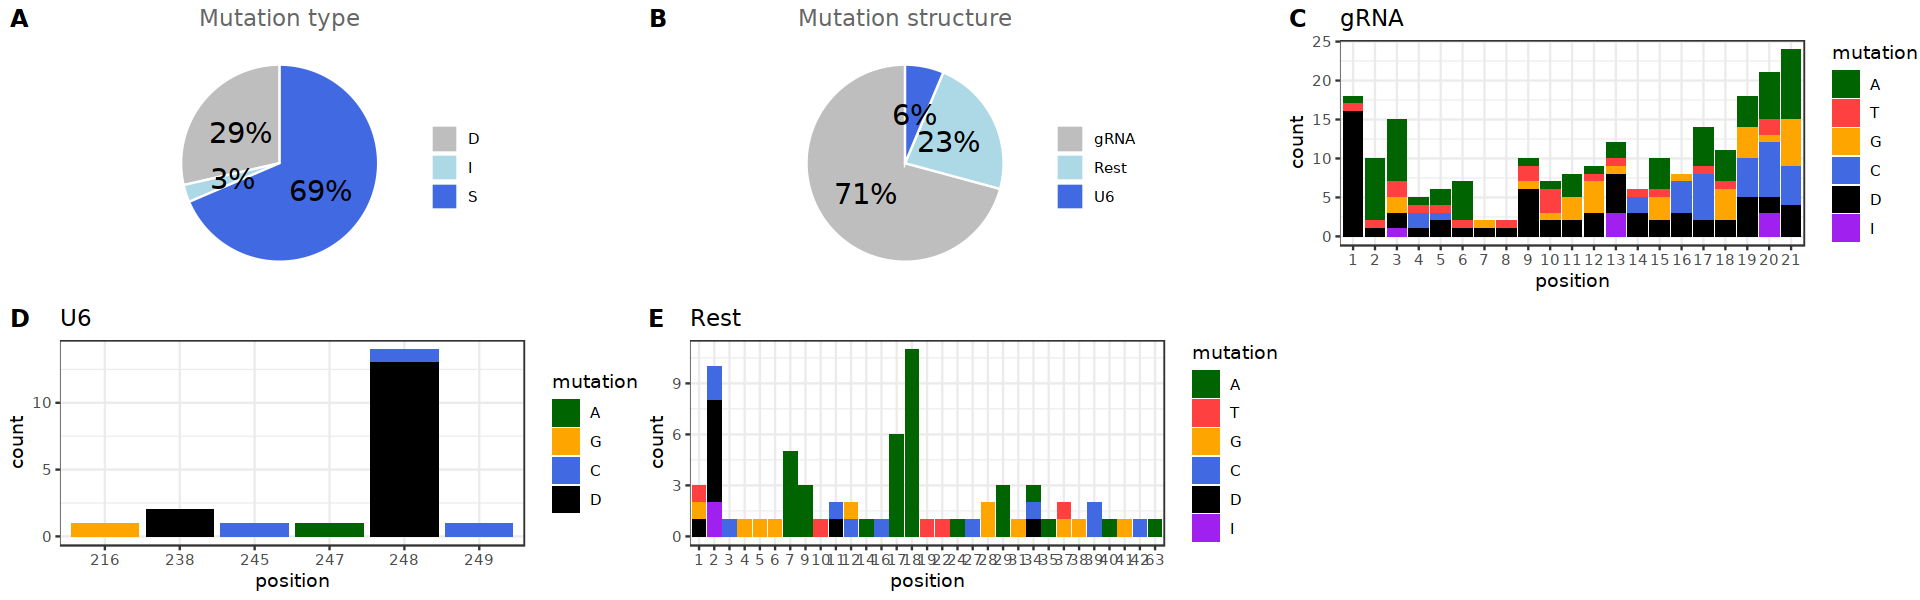

In [35]:
output_dir = './tmp/test'
input_dir = './GiRAFR_outputs//Tian_NatureNeuroscience/sample1/'
fba_input_dir = '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_1/'

MT <- plot_MT_pattern(input_dir, output_dir)


In [36]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA
    
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))    
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = grepl('variant', MT)) %>% summarise(has_MT=any(is_MT))
table(cells.num_features$num_features)
sum(table(cells.num_features$num_features))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.



   1    2    3    4    5    6    7    8    9   10   11   12   16 
4624 1556  564  164   68   30   13    7    5    3    1    2    1 

[1] 7038

Rows: 15092 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


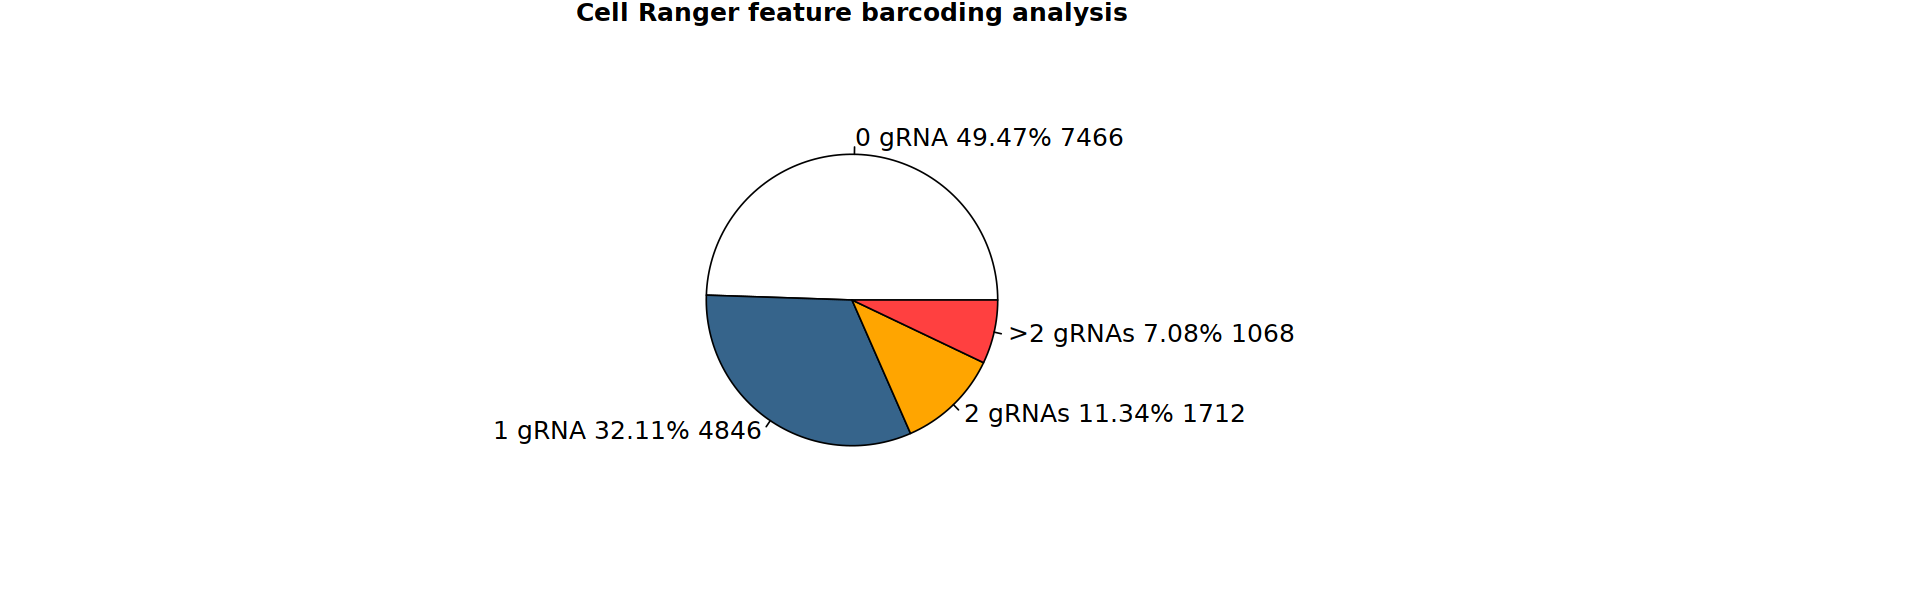

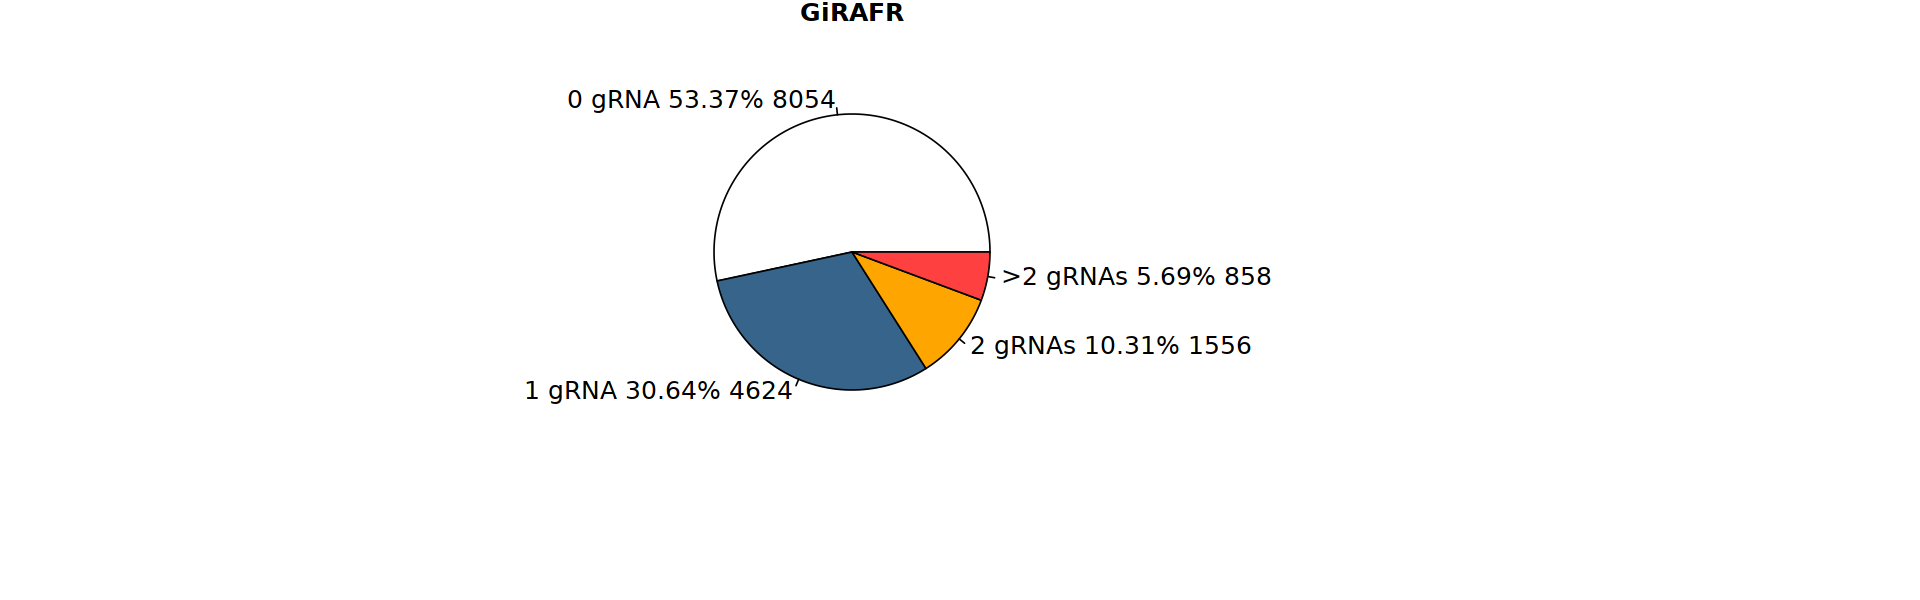

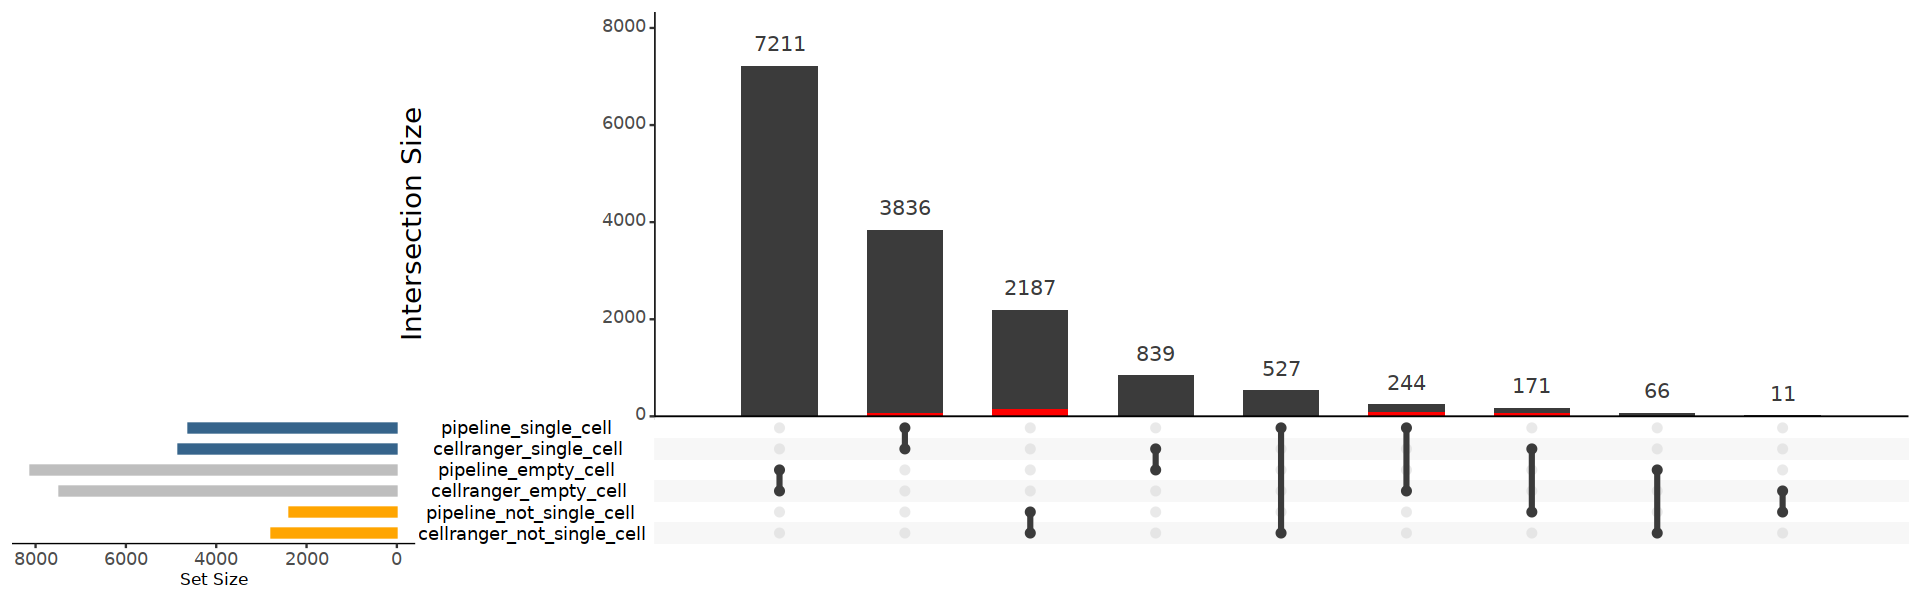

In [37]:
protospacer_file <- paste0(fba_input_dir, '/outs/crispr_analysis/protospacer_calls_per_cell.csv')
barcodes_file <- paste0(fba_input_dir, '/outs/filtered_feature_bc_matrix/barcodes.tsv.gz')

protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)


pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)


Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))

p

In [38]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
  181    74 

In [39]:
table(all_barcodes$has_MT)


FALSE  TRUE 
 6653   323 

### Analysis impact of mutant gRNA and doublets

In [40]:
input_dir

[1] "./GiRAFR_outputs//Tian_NatureNeuroscience/sample1/"

In [41]:
cells.gRNA.single.MT <- read.table(paste0(input_dir, 'cells.gRNA.single.MT.txt'), stringsAsFactors = FALSE)
cells.gRNA.single.MT$target <- sapply(strsplit(cells.gRNA.single.MT$V3,"_"), `[`, 1)
cells.gRNA.single.MT[grepl('non-targeting',cells.gRNA.single.MT$target),]$target <- 'Control'
cells.gRNA.single.MT$is_WT <- !grepl(pattern = 'variant',cells.gRNA.single.MT$V3)
#table(cells.gRNA.single.MT$is_WT)
cells.gRNA.single.MT$cb = paste0(cells.gRNA.single.MT$V1, '-1')

In [42]:
diff_cb <- pipeline_Single[!pipeline_Single %in% cells.gRNA.single.MT$cb]

In [43]:
length(diff_cb)

[1] 0

pipeline_Single

In [44]:
all.matrix <- Read10X(paste0(fba_input_dir,'/outs/filtered_feature_bc_matrix/'))
expression.seurat.ori = CreateSeuratObject(counts = all.matrix$`Gene Expression`)
expression.seurat <- subset(expression.seurat.ori, cells = pipeline_Single)

expression.seurat <- NormalizeData(object = expression.seurat, normalization.method = "LogNormalize", scale.factor = 10000)
rownames(cells.gRNA.single.MT) <- cells.gRNA.single.MT$cb
expression.seurat@meta.data$KO <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'target']
expression.seurat@meta.data$is_WT <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'is_WT']
expression.seurat@meta.data$mutation <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'V5']
expression.seurat@meta.data$cb <- rownames(expression.seurat@meta.data)

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [45]:
sum(is.na(expression.seurat@meta.data$KO)) 
# should be same as length(diff_cb) 

[1] 0

In [46]:
rownames(cells.has_MT) <- cells.has_MT$cb
expression.seurat@meta.data$has_MT <- cells.has_MT[rownames(expression.seurat@meta.data), ]$has_MT

Warning message:
“Setting row names on a tibble is deprecated.”


In [47]:
diff_cb_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% diff_cb),]
rownames(diff_cb_gRNA) <- diff_cb_gRNA$cb

In [48]:
# replace KO NA into target
expression.seurat@meta.data$KO[which(expression.seurat@meta.data$cb %in% diff_cb)] <- 
sapply(strsplit(diff_cb_gRNA[rownames(expression.seurat@meta.data[which(expression.seurat@meta.data$cb %in% diff_cb),]), 'target'], '_'), `[`, 1)

In [49]:
table(expression.seurat@meta.data$is_WT, expression.seurat@meta.data$has_MT)
# has some discrepancy 

       
        FALSE TRUE
  FALSE     0  134
  TRUE   4473    0

In [50]:
#expression.seurat@meta.data[which(expression.seurat@meta.data$is_WT == FALSE & expression.seurat@meta.data$has_MT == FALSE),]

In [51]:
unique(expression.seurat$KO)

[1] "SH3RF1"    "UBTD2"     "FRMD4A"    "TAF1"      "CEP63"     "BECN1"    
  [7] "BAX"       "OPTN"      "UBA5"      "HYOU1"     "AIFM1"     "PSMF1"    
 [13] "TMEM55A"   "LRPPRC"    "PRNP"      "PFDN1"     "NDUFAF6"   "RAB7A"    
 [19] "TRAP1"     "CELF1"     "COX15"     "NDUFA2"    "RPL14"     "ZNF592"   
 [25] "CYP46A1"   "EEF2"      "CIC"       "NTRK2"     "AMFR"      "RPL6"     
 [31] "PAXIP1"    "RBM17"     "POLG"      "EXOC4"     "TRIP4"     "NDUFAF2"  
 [37] "SASH1"     "VPS54"     "CNTNAP2"   "DAP"       "HTT"       "BLMH"     
 [43] "PSAP"      "GOLIM4"    "PLEKHG5"   "PRKAG2"    "RNF165"    "PMPCA"    
 [49] "PLD3"      "OPA3"      "THAP1"     "VCP"       "ATXN1"     "NDUFA9"   
 [55] "Control"   "TARDBP"    "WWOX"      "AKAP9"     "FOXRED1"   "DROSHA"   
 [61] "IGF1R"     "SOD2"      "DNAJC6"    "HEXA"      "HNRNPA2B1" "PRRC2C"   
 [67] "CDH11"     "RGL1"      "VPS35"     "CYB561"    "EWSR1"     "ARID1B"   
 [73] "GARS"      "TRPM7"     "TUBB4A"    "FXN"       "SYNJ1"     "DNM2"     
 [79] "GRN"       "DCTN1"     "GLE1"      "POU4F1"    "GSTA4"     "NDUFS8"   
 [85] "FARP1"     "SCAPER"    "BIN1"      "GTF2H3"    "SCFD1"     "GSR"      
 [91] "TDP2"      "RHOT1"     "SPG7"      "FERMT2"    "SCO2"      "ANO10"    
 [97] "ZNF599"    "SETX"      "DMXL1"     "ELOVL5"    "SARM1"     "PCDH1"    
[103] "SLMAP"     "NSF"       "PPP1R37"   "COG4"      "MATR3"     "RELN"     
[109] "WDR66"     "PFN1"      "KIFAP3"    "REEP2"     "PGBD1"     "APEX1"    
[115] "ATP5C1"    "YARS"      "ATXN10"    "PARP1"     "ELMO1"     "ATP6AP2"  
[121] "EIF2S1"    "MRPL10"    "RGS2"      "NDUFV1"    "STX1B"     "TFAM"     
[127] "XRCC1"     "ADARB2"    "WDR45"     "VAPB"      "CDC42EP3"  "ATG5"     
[133] "VPS13C"    "SNCB"      "ELP3"      "HSPA9"     "ATP5H"     "CREBBP"   
[139] "SEC24B"    "DBR1"      "RIMBP2"    "BCS1L"     "PVR"       "AFG3L2"   
[145] "FBXO7"     "RAB10"     "COX10"     "ST6GAL1"   "AP2A2"     "RFC3"     
[151] "PPP2R2B"   "NDUFAF5"   "FAM171A2"  "SOD1"      "XIAP"      "SERAC1"   
[157] "TOP1"      "CTSD"      "VPS13A"    "BNIP1"     "ECHS1"     "EPC2"     
[163] "FOXC1"     "MTA1"      "FAM57B"    "COASY"     "EIF4G1"    "MAPT"     
[169] "ZNF292"    "PDS5B"     "SLC4A1AP"  "ATXN7"     "OSBPL6"    "CALB1"    
[175] "ATP1A3"    "PON2"      "NCSTN"     "CASP3"     "CYCS"      "TRIM26"   
[181] "ADAM10"    "HSPA5"     "DYNC1H1"   "FGD4"      "KIF1B"

In [52]:
expression.seurat$KO[expression.seurat$KO == 'TMEM55A'] <- 'PIP4P2'
expression.seurat$KO[expression.seurat$KO == 'ATP5C1'] <- 'ATP5F1C'
expression.seurat$KO[expression.seurat$KO == 'ATP5H'] <- 'ATP5PD'

In [53]:
targets <- unique(expression.seurat@meta.data$KO)
targets <- targets[targets!='Control']
all.exp2.df <- data.frame()
CTRL_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == 'Control'),])
for(gene in targets){
        KO_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == gene),])
        tmp.df <- rbind(data.frame(expression = expression.seurat@assays$RNA@data[gene, KO_cells], type = 'KO'),
            data.frame(expression = expression.seurat@assays$RNA@data[gene, CTRL_cells], type = 'Control'))

        tmp.df$target = gene
        tmp.df$cb = rownames(tmp.df)
        all.exp2.df <- rbind(all.exp2.df, tmp.df)
}

Target gene expression in Control

In [54]:
avg.exp.control <- all.exp2.df[which(all.exp2.df$type == 'Control'),] %>% group_by(target) %>% summarise(avg = mean(expression))
avg.exp.control <- as.data.frame(avg.exp.control)
rownames(avg.exp.control) <- avg.exp.control$target

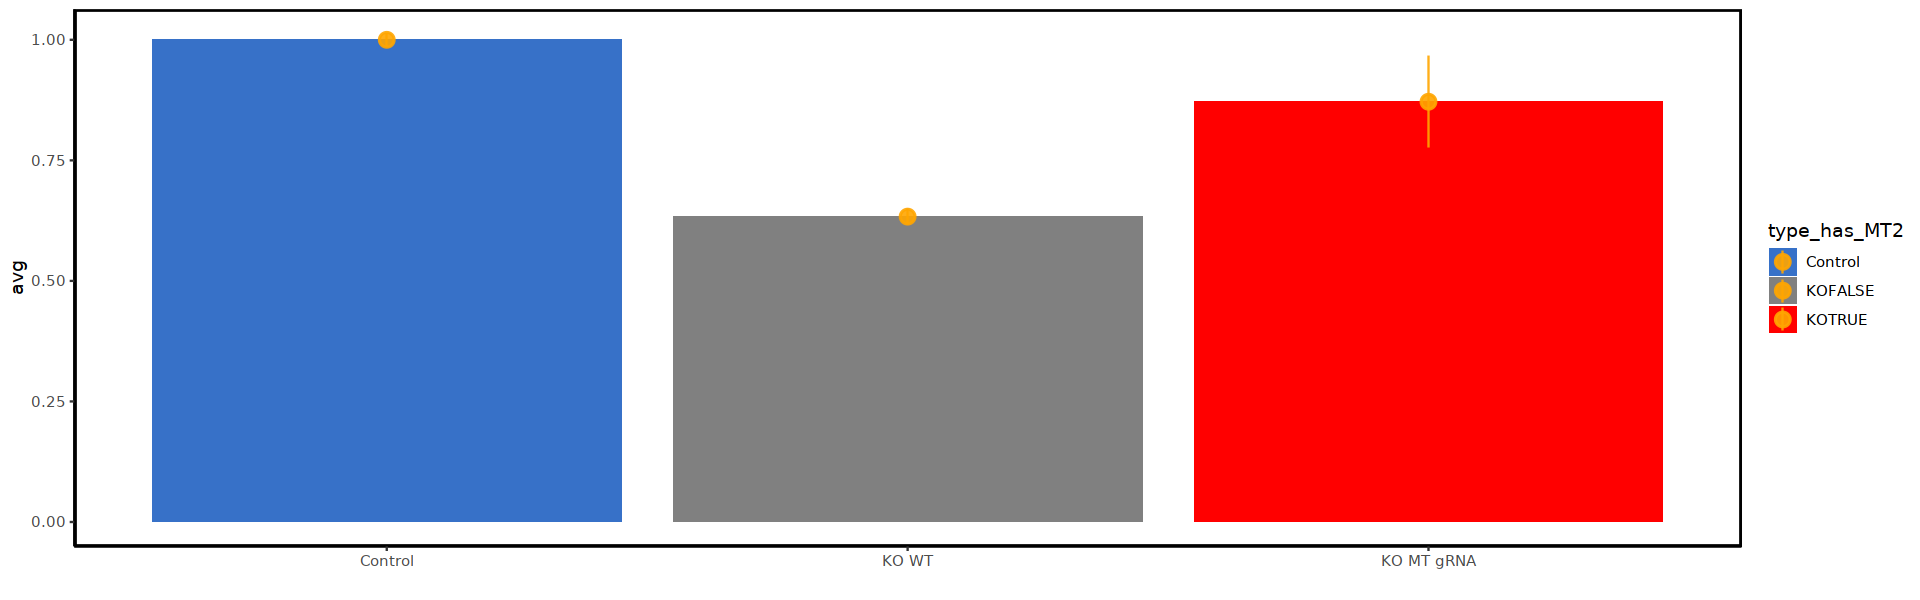

In [55]:
#all.exp2.MT.df <- merge(all.exp2.df, cells.gRNA.single.MT[,c(4,5,8,9)], by = 'cb')
all.exp2.MT.df <- merge(all.exp2.df, expression.seurat@meta.data[,c(4,6,7,8)], by = 'cb')
all.exp2.MT.df$type_has_MT <- paste0(all.exp2.MT.df$type, all.exp2.MT.df$has_MT)

all.exp2.MT.df$type_has_MT2 <- all.exp2.MT.df$type_has_MT
all.exp2.MT.df[which(all.exp2.MT.df$type_has_MT == 'ControlFALSE' |
    all.exp2.MT.df$type_has_MT == 'ControlNA' |
    all.exp2.MT.df$type_has_MT == 'ControlTRUE'),'type_has_MT2'] <- 'Control'


out_target <- avg.exp.control[which(avg.exp.control$avg == 0), 'target']
all.exp2.MT.df <- all.exp2.MT.df[which(!all.exp2.MT.df$target %in% out_target), ]

all.exp2.MT.df$expression_norm <- all.exp2.MT.df$expression/avg.exp.control[all.exp2.MT.df$target,'avg']

# high_exp_targets <- avg.exp.control$target[order(avg.exp.control$avg, decreasing = T)]
# tmp.df <- all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), c('tmp','expression_norm')]

tmp.df <- all.exp2.MT.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm),
                                                 sem = sd(expression_norm)/sqrt(n))

p1 <- ggplot(tmp.df, aes(x = type_has_MT2, y = avg, fill = type_has_MT2)) + geom_col()+
        geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
        theme_classic()+
        xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+
        scale_fill_manual(breaks = c("Control", "KOFALSE","KOTRUE"),
                          values=c("#3771c8", "#808080",'#ff0000'))+
        scale_x_discrete(limits = c("Control", "KOFALSE", "KOTRUE"), labels=c("Control" = "Control", "KOFALSE" = "KO WT", "KOTRUE" = "KO MT gRNA"))

print(p1)

### Analysis impact of doublets/multiplets

In [56]:
new_doublets <- all_barcodes[which(all_barcodes$pipeline_not_single_cell == 1 & all_barcodes$cellranger_single_cell == 1), 'X1']
length(new_doublets) 
# pipeline identified doubets, cellranger as single

[1] 171

For new doublets, following scenarios:
1. doublets with the mutant gRNA and wildtype gRNA targeting the same gene, 
2. doublets with the mutant gRNA and wildtype gRNA targeting the different gene
3. doublets with two wildtype gRNA targeting the same gene
4. doublets with two wildtype gRNA targeting different gene
5. doublets with two mutant gRNAs targeting different gene

In [57]:
new_doublets_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% new_doublets),] # the mutant gRNA and wildtype gRNA targeting the same gene,


In [58]:
#new_doublets_type1 <- new_doublets_gRNA[which(new_doublets_gRNA$feature_order >= 2),]
#new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA[which(new_doublets_gRNA$feature_order < 2),] %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [59]:
new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [60]:
new_doublets_gRNA2$KO <- lapply(new_doublets_gRNA2$target, function(x) sapply(strsplit(x, '_'), `[`, 1))
                                

In [61]:
if1 <- lapply(new_doublets_gRNA2$KO, function(x) x[1]== x[2])
if2 <- lapply(new_doublets_gRNA2$UMIs, function(x) x[1]>0 & x[2] > 0)
              
new_doublets_type_unknown <- c()
new_doublets_type2 <- c()
new_doublets_type3 <- c()
new_doublets_type4 <- c()
new_doublets_type5 <- c()
for(i in 1:nrow(new_doublets_gRNA2)){
    if(is.na(if1[i]) | is.na(if2[i])){
        new_doublets_type_unknown <- rbind(new_doublets_type_unknown, new_doublets_gRNA2[i,])
    }else{
    if(if1[i] == TRUE & if2[i] == TRUE){ # two wiltype gRNA targeting the same target
        new_doublets_type3 <- rbind(new_doublets_type3, new_doublets_gRNA2[i,])
    }else if(if1[i] == TRUE & if2[i] == FALSE){ #  mutant gRNA and wildtype gRNA or two muatnt targeting the same gene
        new_doublets_type2 <- rbind(new_doublets_type2, new_doublets_gRNA2[i,])
    }else if(if1[i] == FALSE & if2[i] == TRUE){# two wildtype gRNA targeting different gene
        new_doublets_type4 <- rbind(new_doublets_type4, new_doublets_gRNA2[i,]) 
    }else if(if1[i] == FALSE & if2[i] == FALSE){ # mutant gRNA and wildtype gRNA or two muatnt  different gene 
        new_doublets_type5 <- rbind(new_doublets_type5, new_doublets_gRNA2[i,])
    }else{
        print('unknown error')
    }
    }
}

In [62]:
#nrow(new_doublets_type1)
nrow(new_doublets_type2)
nrow(new_doublets_type3)
nrow(new_doublets_type4)
nrow(new_doublets_type5)
nrow(new_doublets_type_unknown)

NULL

NULL

[1] 118

[1] 40

[1] 13

In [63]:
new_doublets_subset <- rbind(new_doublets_type4, new_doublets_type5)$cb
length(new_doublets_subset)

[1] 158

In [64]:
seurat.object.doublets <- subset(expression.seurat.ori, cells = new_doublets_subset)
seurat.object.doublets <- NormalizeData(object = seurat.object.doublets, normalization.method = "LogNormalize", scale.factor = 10000)
seurat.object.doublets

An object of class Seurat 
33538 features across 158 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts, data

In [65]:
head(rbind(new_doublets_type4, new_doublets_type5))
table(cells.num_features[which(cells.num_features$cb %in% new_doublets_subset),'num_features'])


,cb,target,UMIs,KO
,<chr>,<list>,<list>,<list>
1,AAAGGATCACTCAGAT-1,"MATR3_i5_top_gene , NDUFAF2_i1_top_gene","4, 1","MATR3 , NDUFAF2"
3,AACAAAGCAGTGAGCA-1,"RPL6_i1_top_gene , TRAP1_i3_top_gene","7, 1","RPL6 , TRAP1"
6,AAGACAAGTGTACATC-1,"NDUFAF2_i1_top_gene, WDR66_i2_top_gene","1, 2","NDUFAF2, WDR66"
8,AAGGAATAGCAAGTGC-1,"TOP1_i2_top_gene , TRAP1_i4_top_gene","3, 1","TOP1 , TRAP1"
9,AATTTCCAGCAGGGAG-1,"APEX1_i2_top_gene, RBM17_i3_top_gene","2, 3","APEX1, RBM17"
10,AATTTCCAGCCTGGAA-1,"LRPPRC_i5_top_gene, NDUFS8_i4_top_gene","13, 1","LRPPRC, NDUFS8"


num_features
  2   3 
150   8 

In [66]:
protospacer.df <- read.csv(protospacer_file)
rownames(protospacer.df) <- protospacer.df$cell_barcode

In [67]:
seurat.object.doublets@meta.data <- cbind(seurat.object.doublets@meta.data, protospacer.df[colnames(seurat.object.doublets),])
seurat.object.doublets$KO <- sapply(strsplit(seurat.object.doublets@meta.data$feature_call, '_'), `[`, 1)


In [68]:
seurat.object.doublets$KO[seurat.object.doublets$KO == 'non-targeting'] <- 'Control'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'TMEM55A'] <- 'PIP4P2'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5C1'] <- 'ATP5F1C'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5H'] <- 'ATP5PD'

In [69]:
doublets_targets <- unique(seurat.object.doublets$KO)[-which(unique(seurat.object.doublets$KO) == 'Control')] # remove 'neg'
doublets.exp.df <- data.frame()
CTRL_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == 'Control'),])

for(gene in doublets_targets){
    KO_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == gene),])
   tmp.df <- rbind(data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, KO_cells], type = 'KO_doublets'),
                    data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, CTRL_cells], type = 'Control_doublets'))
   tmp.df$target = gene
   tmp.df$cb = c(KO_cells, CTRL_cells)
   doublets.exp.df <- rbind(doublets.exp.df, tmp.df)
}

In [70]:
doublets.exp.df$type_has_MT2 <- doublets.exp.df$type

In [71]:
out_target <- avg.exp.control[which(avg.exp.control$avg == 0), 'target']
doublets.exp.df <- doublets.exp.df[which(!doublets.exp.df$target %in% out_target), ]


In [72]:
doublets.exp.df$expression_norm <- doublets.exp.df$expression/avg.exp.control[doublets.exp.df$target,'avg']

In [73]:
all.exp2.doublets.df <- rbind(doublets.exp.df, all.exp2.MT.df[, c('expression', 'type', 'target', 'cb', 'type_has_MT2', 'expression_norm')])

In [74]:
table(all.exp2.doublets.df$type_has_MT)


         Control Control_doublets      KO_doublets          KOFALSE 
           13468              106              154             4342 
          KOTRUE 
             130 

In [75]:
tmp.df <- all.exp2.doublets.df
tmp.df <- tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
tmp.df

type_has_MT2,n,avg,sd,sem
<chr>,<int>,<dbl>,<dbl>,<dbl>
Control,13468,1.0000000,1.506055,0.01297745
Control_doublets,106,1.6306023,2.335031,0.22679825
KOFALSE,4342,0.6333168,1.141751,0.01732713
KOTRUE,130,0.8715666,1.086653,0.09530575
KO_doublets,154,0.7618494,1.265215,0.10195395


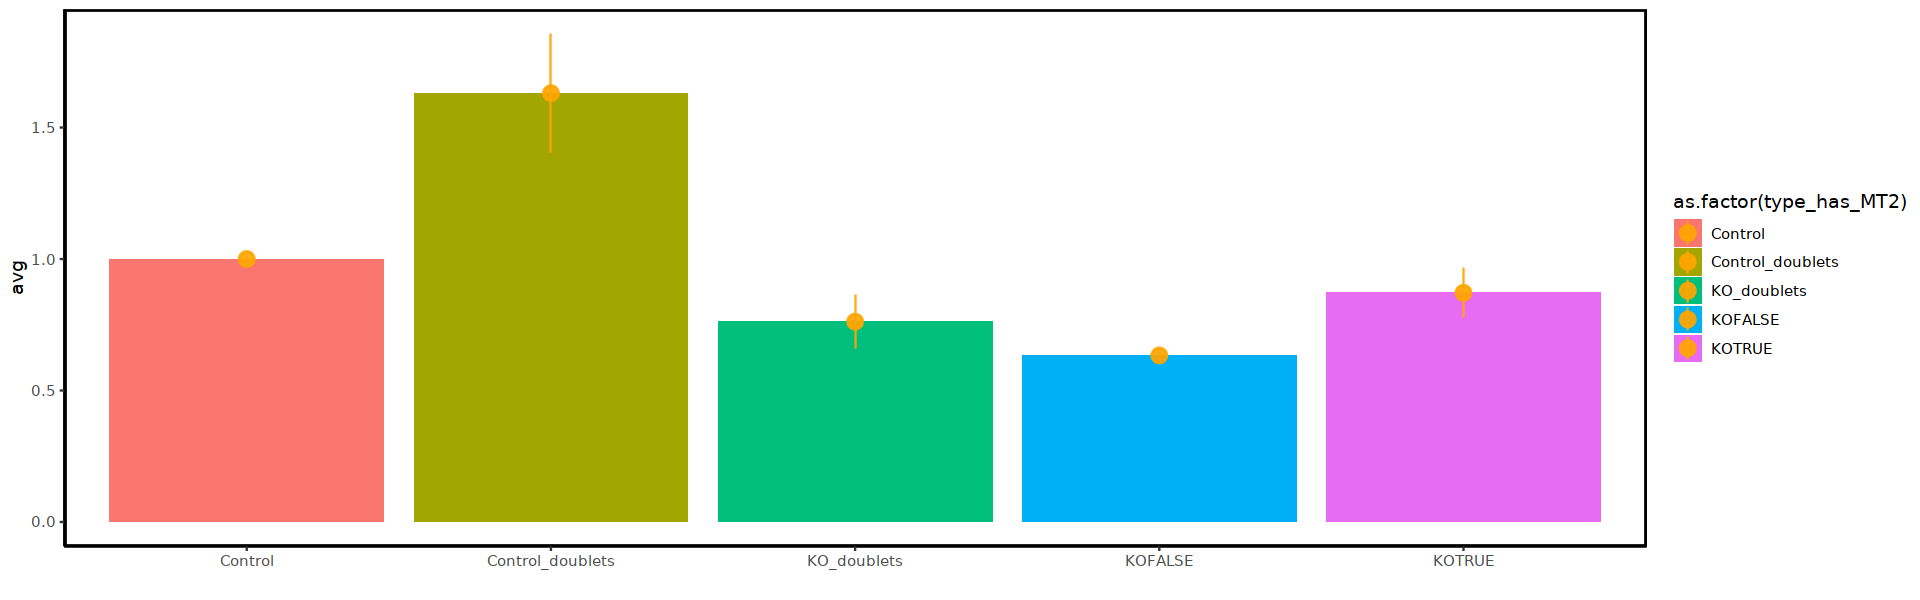

In [76]:
ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = avg, fill = as.factor(type_has_MT2))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))


In [77]:
dim(all.exp2.doublets.df)
all.exp2.doublets.df_sample1 <- all.exp2.doublets.df

[1] 18200     6

# MT gRNA impact -2

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(5) D(7)    G I(1) I(4)    T 
  97   29  111    7    4    1    1   22   14    1   28 
[1] "MT mutation type"

  D   I   S 
124  15 176 
[1] "MT mutation structure"

gRNA Rest   U6 
 233   55   27 


ERROR: Error in pdf(save_pdf, height = 10, width = 20): cannot open file './tmp/test.all.MT.pdf'


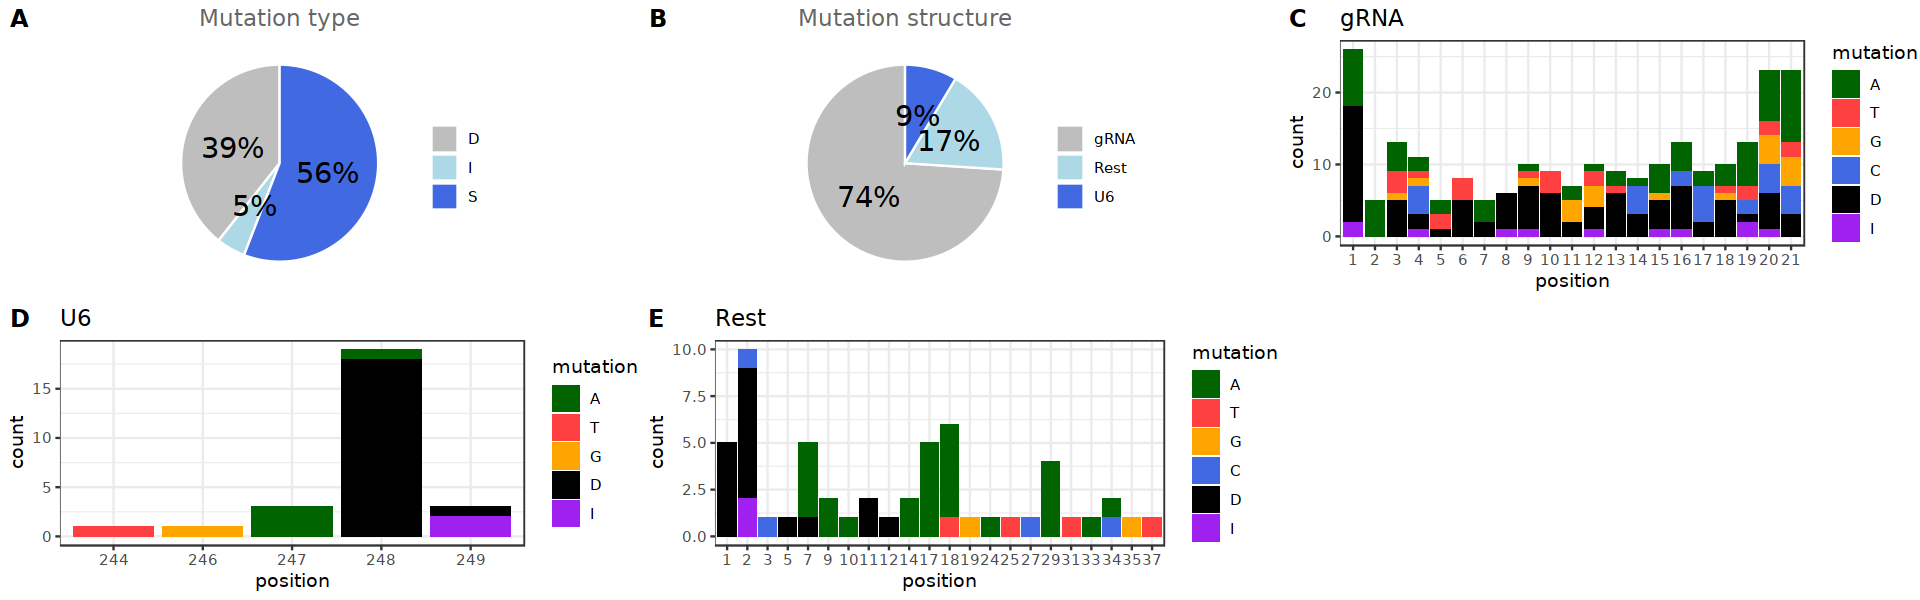

In [78]:
output_dir = './tmp/test'
input_dir = './GiRAFR_outputs//Tian_NatureNeuroscience/sample2/'
fba_input_dir = '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_2/'

MT <- plot_MT_pattern(input_dir, output_dir)


In [79]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA
    
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))    
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = grepl('variant', MT)) %>% summarise(has_MT=any(is_MT))
table(cells.num_features$num_features)
sum(table(cells.num_features$num_features))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.



   1    2    3    4    5    6    7    8    9   10   11   12   17 
4632 1799  635  244   89   35   17    8    8    1    2    1    1 

[1] 7472

Rows: 14408 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


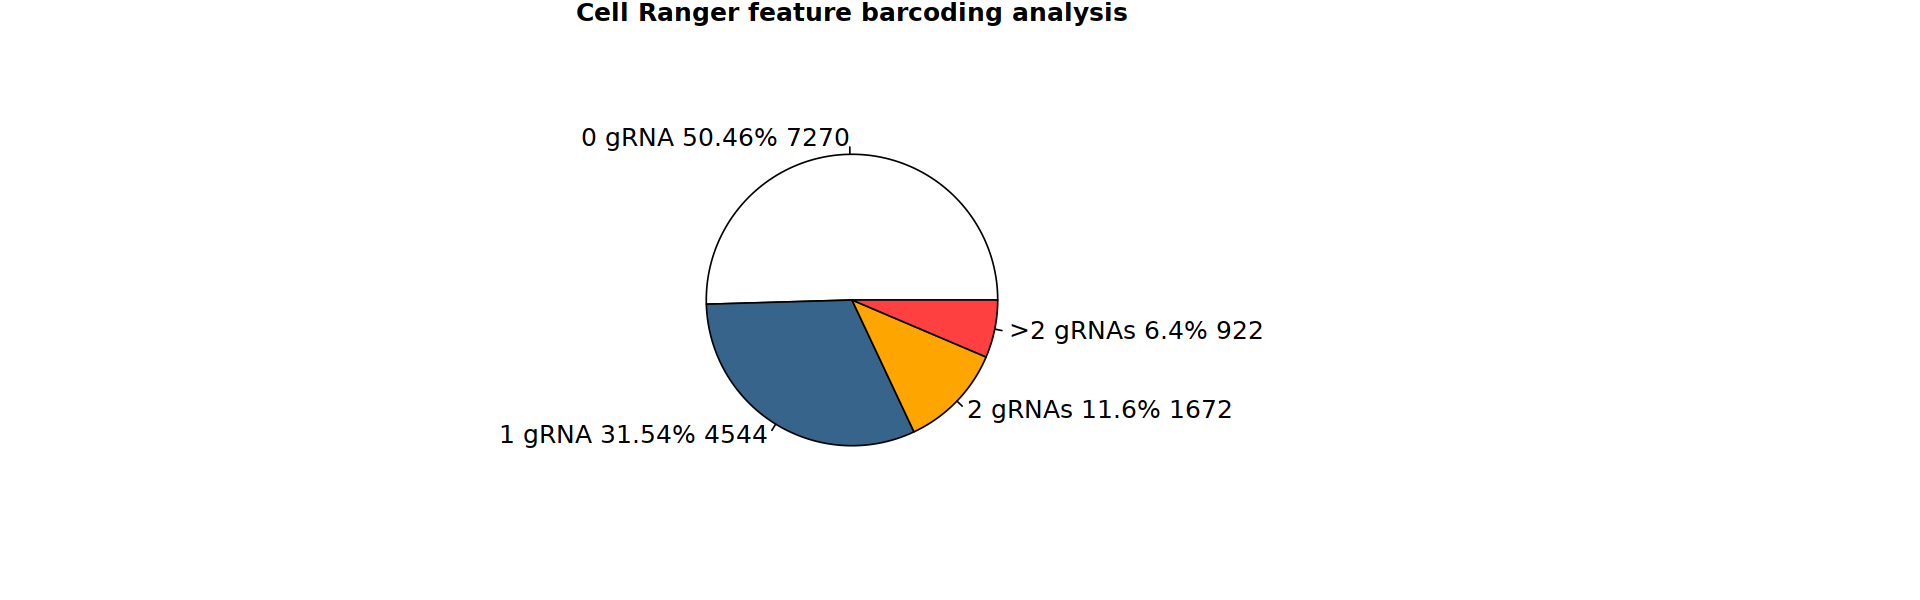

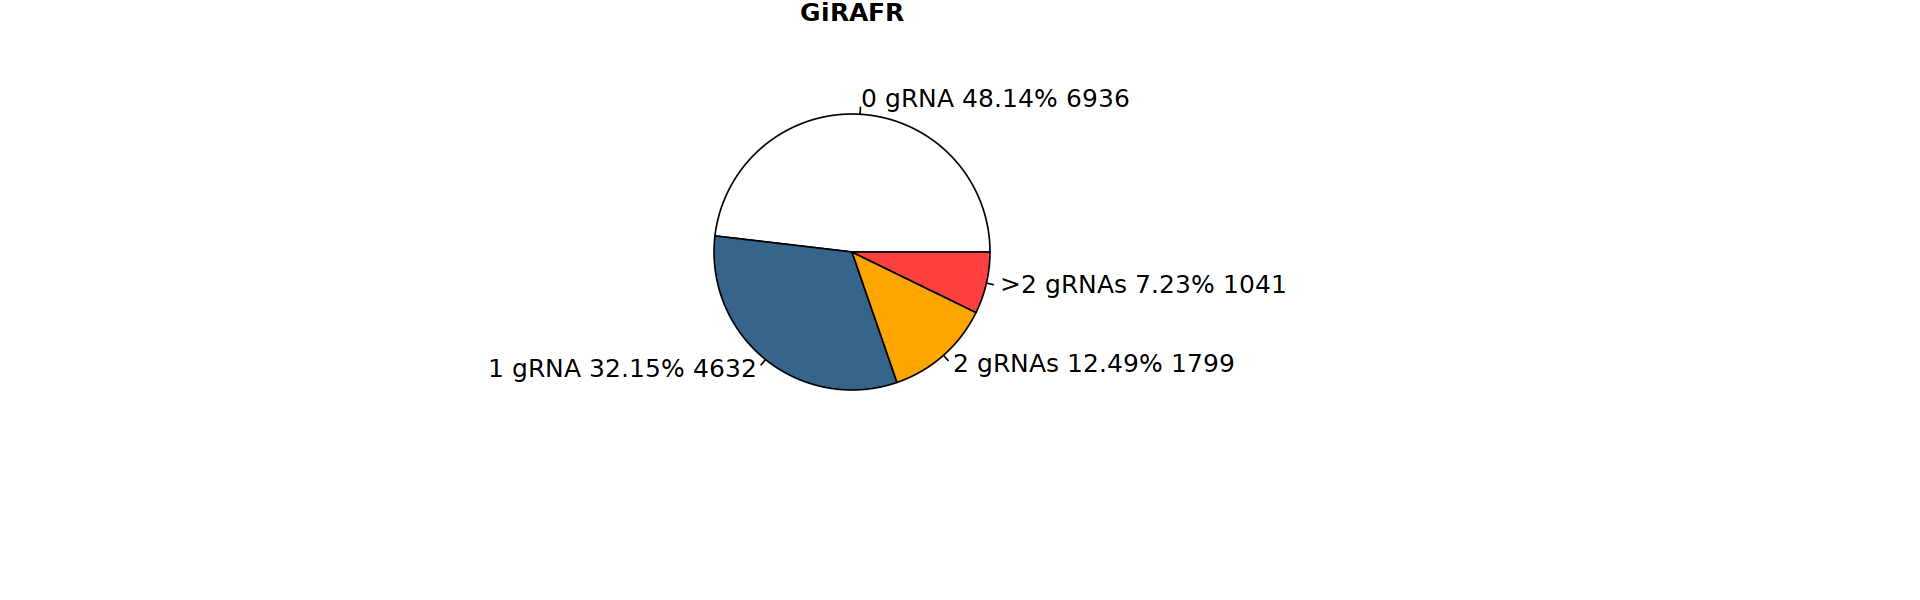

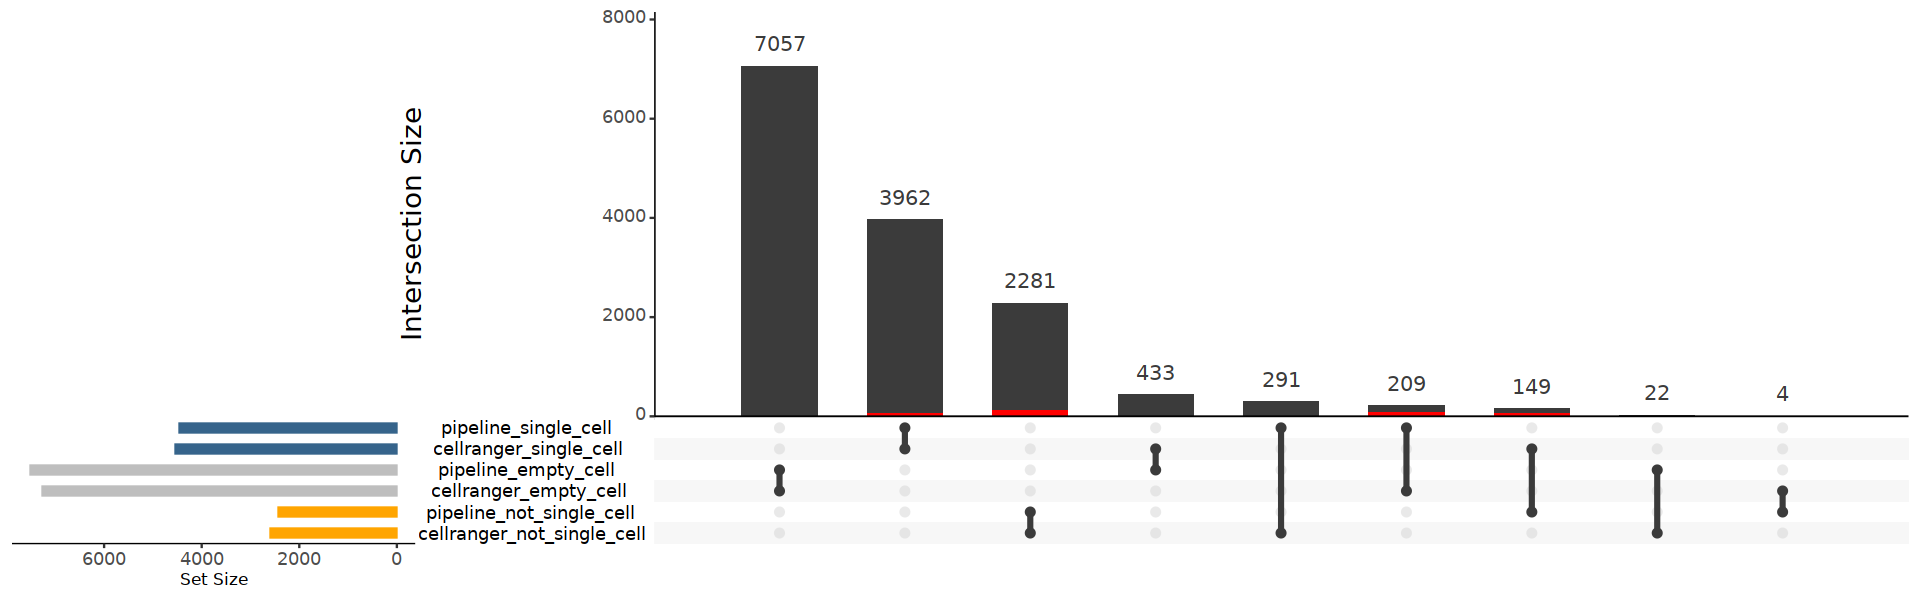

In [80]:
protospacer_file <- paste0(fba_input_dir, '/outs/crispr_analysis/protospacer_calls_per_cell.csv')
barcodes_file <- paste0(fba_input_dir, '/outs/filtered_feature_bc_matrix/barcodes.tsv.gz')

protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)


pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)


Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))

p

In [81]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
  128    85 

In [82]:
table(all_barcodes$has_MT)


FALSE  TRUE 
 6571   325 

### Analysis impact of mutant gRNA and doublets

In [83]:
input_dir

[1] "./GiRAFR_outputs//Tian_NatureNeuroscience/sample2/"

In [84]:
cells.gRNA.single.MT <- read.table(paste0(input_dir, 'cells.gRNA.single.MT.txt'), stringsAsFactors = FALSE)
cells.gRNA.single.MT$target <- sapply(strsplit(cells.gRNA.single.MT$V3,"_"), `[`, 1)
cells.gRNA.single.MT[grepl('non-targeting',cells.gRNA.single.MT$target),]$target <- 'Control'
cells.gRNA.single.MT$is_WT <- !grepl(pattern = 'variant',cells.gRNA.single.MT$V3)
#table(cells.gRNA.single.MT$is_WT)
cells.gRNA.single.MT$cb = paste0(cells.gRNA.single.MT$V1, '-1')

In [85]:
diff_cb <- pipeline_Single[!pipeline_Single %in% cells.gRNA.single.MT$cb]

In [86]:
length(diff_cb)

[1] 0

pipeline_Single

In [87]:
all.matrix <- Read10X(paste0(fba_input_dir,'/outs/filtered_feature_bc_matrix/'))
expression.seurat.ori = CreateSeuratObject(counts = all.matrix$`Gene Expression`)
expression.seurat <- subset(expression.seurat.ori, cells = pipeline_Single)

expression.seurat <- NormalizeData(object = expression.seurat, normalization.method = "LogNormalize", scale.factor = 10000)
rownames(cells.gRNA.single.MT) <- cells.gRNA.single.MT$cb
expression.seurat@meta.data$KO <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'target']
expression.seurat@meta.data$is_WT <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'is_WT']
expression.seurat@meta.data$mutation <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'V5']
expression.seurat@meta.data$cb <- rownames(expression.seurat@meta.data)

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [88]:
sum(is.na(expression.seurat@meta.data$KO)) 
# should be same as length(diff_cb) 

[1] 0

In [89]:
rownames(cells.has_MT) <- cells.has_MT$cb
expression.seurat@meta.data$has_MT <- cells.has_MT[rownames(expression.seurat@meta.data), ]$has_MT

Warning message:
“Setting row names on a tibble is deprecated.”


In [90]:
diff_cb_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% diff_cb),]
rownames(diff_cb_gRNA) <- diff_cb_gRNA$cb

In [91]:
# replace KO NA into target
expression.seurat@meta.data$KO[which(expression.seurat@meta.data$cb %in% diff_cb)] <- 
sapply(strsplit(diff_cb_gRNA[rownames(expression.seurat@meta.data[which(expression.seurat@meta.data$cb %in% diff_cb),]), 'target'], '_'), `[`, 1)

In [92]:
table(expression.seurat@meta.data$is_WT, expression.seurat@meta.data$has_MT)
# has some discrepancy 

       
        FALSE TRUE
  FALSE     0  140
  TRUE   4322    0

In [93]:
#expression.seurat@meta.data[which(expression.seurat@meta.data$is_WT == FALSE & expression.seurat@meta.data$has_MT == FALSE),]

In [94]:
unique(expression.seurat$KO)

[1] "CASP3"     "OPTN"      "DMXL1"     "BLMH"      "DNM2"      "ADAM10"   
  [7] "FRMD4A"    "RFC3"      "COX15"     "NDUFA9"    "EPC2"      "WDR66"    
 [13] "NDUFV1"    "ATP5C1"    "NCSTN"     "ZNF592"    "MRPL10"    "ZNF599"   
 [19] "AFG3L2"    "UBA5"      "RBM17"     "FAM57B"    "TRIP4"     "NDUFA2"   
 [25] "UBTD2"     "EXOC4"     "PON2"      "CELF1"     "PRRC2C"    "RGS2"     
 [31] "SETX"      "VAPB"      "TAF1"      "WDR45"     "DAP"       "ELMO1"    
 [37] "SERAC1"    "VPS13C"    "SNCB"      "TMEM55A"   "APEX1"     "CTSD"     
 [43] "PAXIP1"    "EIF2S1"    "KIFAP3"    "NDUFS8"    "CYB561"    "SPG7"     
 [49] "TARDBP"    "ATP1A3"    "CALB1"     "FERMT2"    "BECN1"     "Control"  
 [55] "FXN"       "FOXC1"     "AP2A2"     "PMPCA"     "PSMF1"     "TRIM26"   
 [61] "DBR1"      "SCFD1"     "VCP"       "PPP2R2B"   "COG4"      "AKAP9"    
 [67] "DNAJC6"    "FGD4"      "VPS13A"    "GLE1"      "BCS1L"     "HTT"      
 [73] "ELOVL5"    "PLEKHG5"   "GRN"       "CIC"       "ELP3"      "SOD1"     
 [79] "EIF4G1"    "SLC4A1AP"  "OPA3"      "CDC42EP3"  "SCAPER"    "SEC24B"   
 [85] "BIN1"      "ARID1B"    "CREBBP"    "ATXN10"    "BNIP1"     "PCDH1"    
 [91] "PFDN1"     "TUBB4A"    "RPL6"      "MAPT"      "NDUFAF5"   "ANO10"    
 [97] "RIMBP2"    "KIF1B"     "GTF2H3"    "FARP1"     "HEXA"      "SYNJ1"    
[103] "EEF2"      "SASH1"     "EWSR1"     "GARS"      "ZNF292"    "ATXN1"    
[109] "STX1B"     "TRPM7"     "CNTNAP2"   "PSAP"      "SOD2"      "MTA1"     
[115] "SARM1"     "FAM171A2"  "VPS35"     "ECHS1"     "YARS"      "TDP2"     
[121] "DROSHA"    "PRKAG2"    "TOP1"      "GSR"       "RAB7A"     "BAX"      
[127] "HYOU1"     "PFN1"      "RGL1"      "OSBPL6"    "PRNP"      "DCTN1"    
[133] "NDUFAF6"   "RAB10"     "CEP63"     "XRCC1"     "IGF1R"     "HSPA9"    
[139] "CYP46A1"   "PARP1"     "ST6GAL1"   "CDH11"     "PGBD1"     "HNRNPA2B1"
[145] "FBXO7"     "TFAM"      "NSF"       "ATXN7"     "GSTA4"     "RELN"     
[151] "POU4F1"    "ATG5"      "SLMAP"     "MATR3"     "ADARB2"    "LRPPRC"   
[157] "COASY"     "RHOT1"     "PDS5B"     "AMFR"      "THAP1"     "XIAP"     
[163] "FOXRED1"   "PLD3"      "SCO2"      "RPL14"     "TRAP1"     "VPS54"    
[169] "DYNC1H1"   "PPP1R37"   "ATP6AP2"   "COX10"     "NDUFAF2"   "PVR"      
[175] "HSPA5"     "POLG"      "AIFM1"     "GOLIM4"    "RNF165"    "CYCS"     
[181] "REEP2"     "NTRK2"     "WWOX"      "ATP5H"     "SH3RF1"

In [95]:
expression.seurat$KO[expression.seurat$KO == 'TMEM55A'] <- 'PIP4P2'
expression.seurat$KO[expression.seurat$KO == 'ATP5C1'] <- 'ATP5F1C'
expression.seurat$KO[expression.seurat$KO == 'ATP5H'] <- 'ATP5PD'

In [96]:
targets <- unique(expression.seurat@meta.data$KO)
targets <- targets[targets!='Control']
all.exp2.df <- data.frame()
CTRL_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == 'Control'),])
for(gene in targets){
        KO_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == gene),])
        tmp.df <- rbind(data.frame(expression = expression.seurat@assays$RNA@data[gene, KO_cells], type = 'KO'),
            data.frame(expression = expression.seurat@assays$RNA@data[gene, CTRL_cells], type = 'Control'))

        tmp.df$target = gene
        tmp.df$cb = rownames(tmp.df)
        all.exp2.df <- rbind(all.exp2.df, tmp.df)
}

Target gene expression in Control

In [97]:
avg.exp.control <- all.exp2.df[which(all.exp2.df$type == 'Control'),] %>% group_by(target) %>% summarise(avg = mean(expression))
avg.exp.control <- as.data.frame(avg.exp.control)
rownames(avg.exp.control) <- avg.exp.control$target

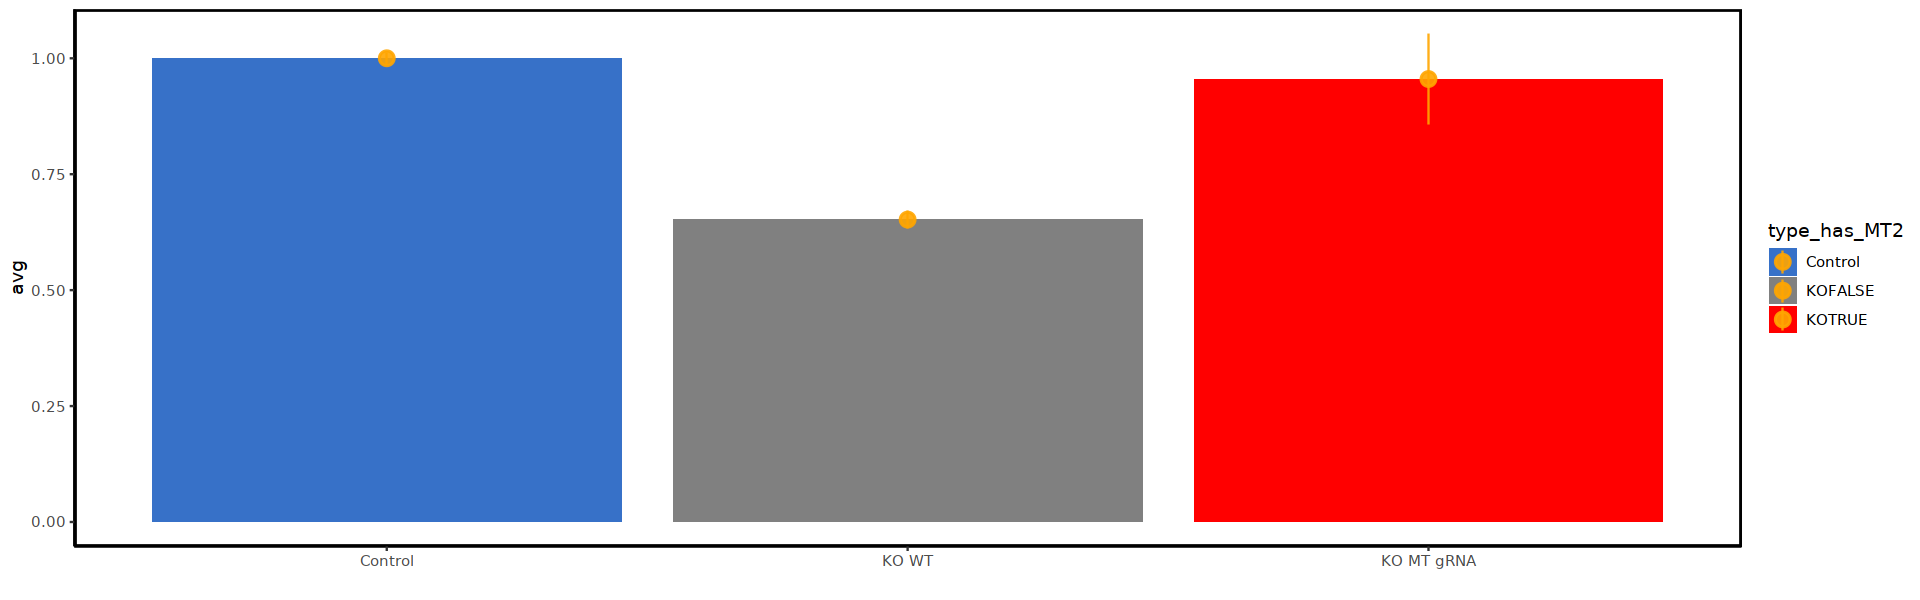

In [98]:
#all.exp2.MT.df <- merge(all.exp2.df, cells.gRNA.single.MT[,c(4,5,8,9)], by = 'cb')
all.exp2.MT.df <- merge(all.exp2.df, expression.seurat@meta.data[,c(4,6,7,8)], by = 'cb')
all.exp2.MT.df$type_has_MT <- paste0(all.exp2.MT.df$type, all.exp2.MT.df$has_MT)

all.exp2.MT.df$type_has_MT2 <- all.exp2.MT.df$type_has_MT
all.exp2.MT.df[which(all.exp2.MT.df$type_has_MT == 'ControlFALSE' |
    all.exp2.MT.df$type_has_MT == 'ControlNA' |
    all.exp2.MT.df$type_has_MT == 'ControlTRUE'),'type_has_MT2'] <- 'Control'


out_target <- avg.exp.control[which(avg.exp.control$avg == 0), 'target']
all.exp2.MT.df <- all.exp2.MT.df[which(!all.exp2.MT.df$target %in% out_target), ]

all.exp2.MT.df$expression_norm <- all.exp2.MT.df$expression/avg.exp.control[all.exp2.MT.df$target,'avg']

# high_exp_targets <- avg.exp.control$target[order(avg.exp.control$avg, decreasing = T)]
# tmp.df <- all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), c('tmp','expression_norm')]

tmp.df <- all.exp2.MT.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm),
                                                 sem = sd(expression_norm)/sqrt(n))

p1 <- ggplot(tmp.df, aes(x = type_has_MT2, y = avg, fill = type_has_MT2)) + geom_col()+
        geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
        theme_classic()+
        xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+
        scale_fill_manual(breaks = c("Control", "KOFALSE","KOTRUE"),
                          values=c("#3771c8", "#808080",'#ff0000'))+
        scale_x_discrete(limits = c("Control", "KOFALSE", "KOTRUE"), labels=c("Control" = "Control", "KOFALSE" = "KO WT", "KOTRUE" = "KO MT gRNA"))

print(p1)

### Analysis impact of doublets/multiplets

In [99]:
new_doublets <- all_barcodes[which(all_barcodes$pipeline_not_single_cell == 1 & all_barcodes$cellranger_single_cell == 1), 'X1']
length(new_doublets) 
# pipeline identified doubets, cellranger as single

[1] 149

For new doublets, following scenarios:
1. doublets with the mutant gRNA and wildtype gRNA targeting the same gene, 
2. doublets with the mutant gRNA and wildtype gRNA targeting the different gene
3. doublets with two wildtype gRNA targeting the same gene
4. doublets with two wildtype gRNA targeting different gene
5. doublets with two mutant gRNAs targeting different gene

In [100]:
new_doublets_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% new_doublets),] # the mutant gRNA and wildtype gRNA targeting the same gene,


In [101]:
#new_doublets_type1 <- new_doublets_gRNA[which(new_doublets_gRNA$feature_order >= 2),]
#new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA[which(new_doublets_gRNA$feature_order < 2),] %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [102]:
new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [103]:
new_doublets_gRNA2$KO <- lapply(new_doublets_gRNA2$target, function(x) sapply(strsplit(x, '_'), `[`, 1))
                                

In [104]:
if1 <- lapply(new_doublets_gRNA2$KO, function(x) x[1]== x[2])
if2 <- lapply(new_doublets_gRNA2$UMIs, function(x) x[1]>0 & x[2] > 0)
              
new_doublets_type_unknown <- c()
new_doublets_type2 <- c()
new_doublets_type3 <- c()
new_doublets_type4 <- c()
new_doublets_type5 <- c()
for(i in 1:nrow(new_doublets_gRNA2)){
    if(is.na(if1[i]) | is.na(if2[i])){
        new_doublets_type_unknown <- rbind(new_doublets_type_unknown, new_doublets_gRNA2[i,])
    }else{
    if(if1[i] == TRUE & if2[i] == TRUE){ # two wiltype gRNA targeting the same target
        new_doublets_type3 <- rbind(new_doublets_type3, new_doublets_gRNA2[i,])
    }else if(if1[i] == TRUE & if2[i] == FALSE){ #  mutant gRNA and wildtype gRNA or two muatnt targeting the same gene
        new_doublets_type2 <- rbind(new_doublets_type2, new_doublets_gRNA2[i,])
    }else if(if1[i] == FALSE & if2[i] == TRUE){# two wildtype gRNA targeting different gene
        new_doublets_type4 <- rbind(new_doublets_type4, new_doublets_gRNA2[i,]) 
    }else if(if1[i] == FALSE & if2[i] == FALSE){ # mutant gRNA and wildtype gRNA or two muatnt  different gene 
        new_doublets_type5 <- rbind(new_doublets_type5, new_doublets_gRNA2[i,])
    }else{
        print('unknown error')
    }
    }
}

In [105]:
#nrow(new_doublets_type1)
nrow(new_doublets_type2)
nrow(new_doublets_type3)
nrow(new_doublets_type4)
nrow(new_doublets_type5)
nrow(new_doublets_type_unknown)

NULL

NULL

[1] 90

[1] 58

[1] 1

In [106]:
new_doublets_subset <- rbind(new_doublets_type4, new_doublets_type5)$cb
length(new_doublets_subset)

[1] 148

In [107]:
seurat.object.doublets <- subset(expression.seurat.ori, cells = new_doublets_subset)
seurat.object.doublets <- NormalizeData(object = seurat.object.doublets, normalization.method = "LogNormalize", scale.factor = 10000)
seurat.object.doublets

An object of class Seurat 
33538 features across 148 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts, data

In [108]:
head(rbind(new_doublets_type4, new_doublets_type5))
table(cells.num_features[which(cells.num_features$cb %in% new_doublets_subset),'num_features'])

,cb,target,UMIs,KO
,<chr>,<list>,<list>,<list>
1,AAAGAACGTAGTGGCA-1,"FRMD4A_i2_top_gene, TAF1_i5_top_gene","5, 2","FRMD4A, TAF1"
3,AAAGGGCAGGCAGTCA-1,"ELOVL5_i2_top_gene, RELN_i2_top_gene","2, 7","ELOVL5, RELN"
4,AAAGTCCGTATCGCAT-1,"ELMO1_i1_top_gene, GLE1_i6_top_gene","19, 2","ELMO1, GLE1"
7,AATAGAGGTCAGGTGA-1,"COX10_i2_top_gene , DNAJC6_i2_top_gene","3, 2","COX10 , DNAJC6"
10,ACAAGCTGTGAGCCAA-1,"ATP1A3_i2_top_gene, BNIP1_i3_top_gene","6, 2","ATP1A3, BNIP1"
11,ACAGAAAAGGCTATCT-1,"ATXN1_i1_top_gene , ZNF592_i1_top_gene","2, 6","ATXN1 , ZNF592"


num_features
  2   3 
146   2 

In [109]:
protospacer.df <- read.csv(protospacer_file)
rownames(protospacer.df) <- protospacer.df$cell_barcode

In [110]:
seurat.object.doublets@meta.data <- cbind(seurat.object.doublets@meta.data, protospacer.df[colnames(seurat.object.doublets),])
seurat.object.doublets$KO <- sapply(strsplit(seurat.object.doublets@meta.data$feature_call, '_'), `[`, 1)


In [111]:
seurat.object.doublets$KO[seurat.object.doublets$KO == 'non-targeting'] <- 'Control'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'TMEM55A'] <- 'PIP4P2'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5C1'] <- 'ATP5F1C'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5H'] <- 'ATP5PD'

In [112]:
# no doublets Control
doublets_targets <- unique(seurat.object.doublets$KO)
doublets.exp.df <- data.frame()

for(gene in doublets_targets){
    KO_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == gene),])
   tmp.df <- rbind(data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, KO_cells], type = 'KO_doublets'))
   tmp.df$target = gene
   tmp.df$cb = c(KO_cells)
   doublets.exp.df <- rbind(doublets.exp.df, tmp.df)
}

In [113]:
doublets.exp.df$type_has_MT2 <- doublets.exp.df$type

In [114]:
out_target <- avg.exp.control[which(avg.exp.control$avg == 0), 'target']
doublets.exp.df <- doublets.exp.df[which(!doublets.exp.df$target %in% out_target), ]


In [115]:
doublets.exp.df$expression_norm <- doublets.exp.df$expression/avg.exp.control[doublets.exp.df$target,'avg']

In [116]:
all.exp2.doublets.df <- rbind(doublets.exp.df, all.exp2.MT.df[, c('expression', 'type', 'target', 'cb', 'type_has_MT2', 'expression_norm')])

In [117]:
table(all.exp2.doublets.df$type_has_MT)


    Control KO_doublets     KOFALSE      KOTRUE 
      12558         147        4215         136 

In [118]:
tmp.df <- all.exp2.doublets.df
tmp.df <- tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
tmp.df

type_has_MT2,n,avg,sd,sem
<chr>,<int>,<dbl>,<dbl>,<dbl>
Control,12558,1.0000000,1.462794,0.01305338
KOFALSE,4215,0.6521326,1.260382,0.01941347
KOTRUE,136,0.9552532,1.143825,0.09808217
KO_doublets,147,0.6860686,1.091995,0.09006622


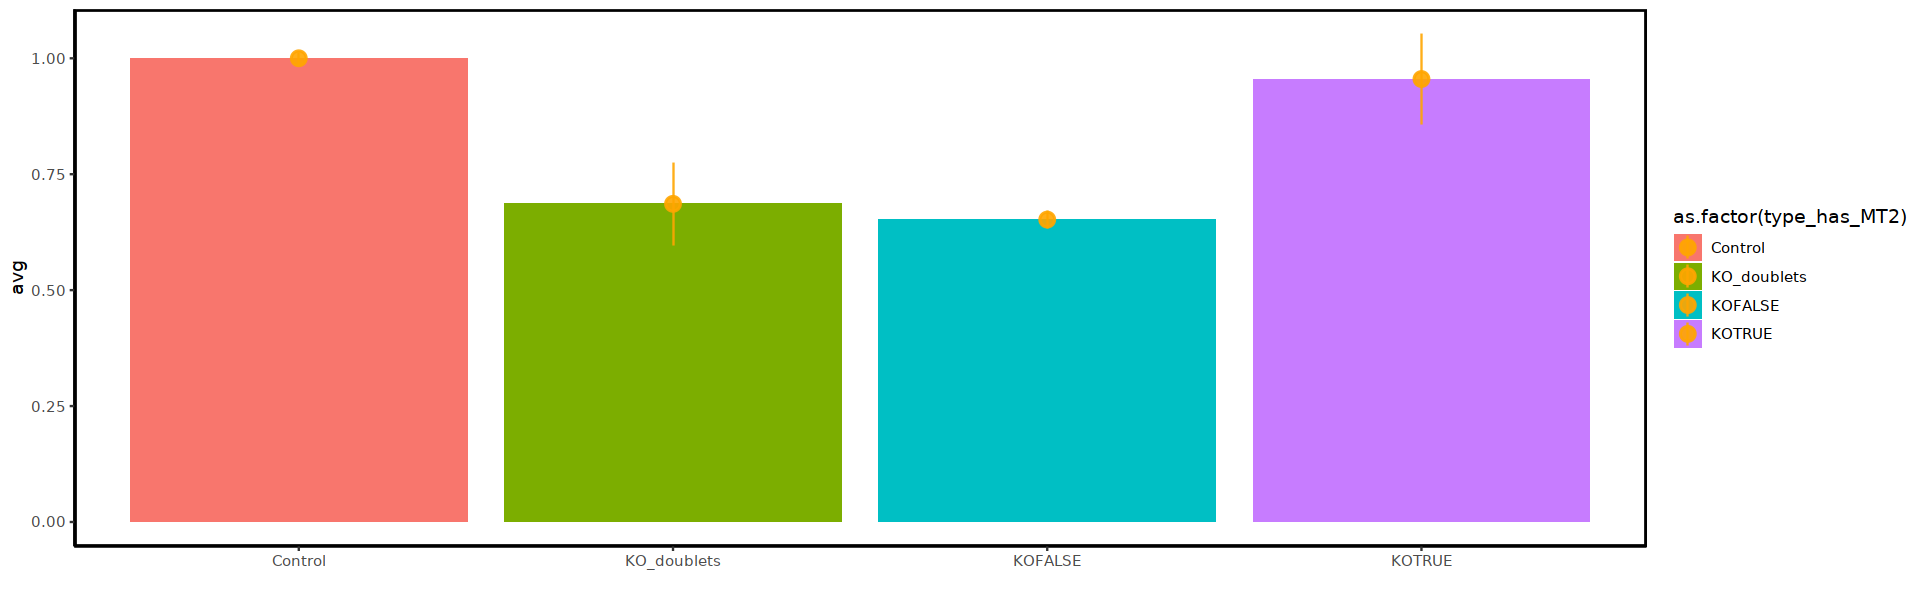

In [119]:
ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = avg, fill = as.factor(type_has_MT2))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))


In [120]:
dim(all.exp2.doublets.df)
all.exp2.doublets.df_sample2 <- all.exp2.doublets.df

[1] 17056     6

# MT gRNA impact -3

[1] "MT mutation table"

   A    C D(1) D(2) D(3)    G I(1) I(2)    T 
  75   17   73    4    2   31    6    2   22 
[1] "MT mutation type"

  D   I   S 
 79   8 145 
[1] "MT mutation structure"

gRNA Rest   U6 
 152   65   15 


ERROR: Error in pdf(save_pdf, height = 10, width = 20): cannot open file './tmp/test.all.MT.pdf'


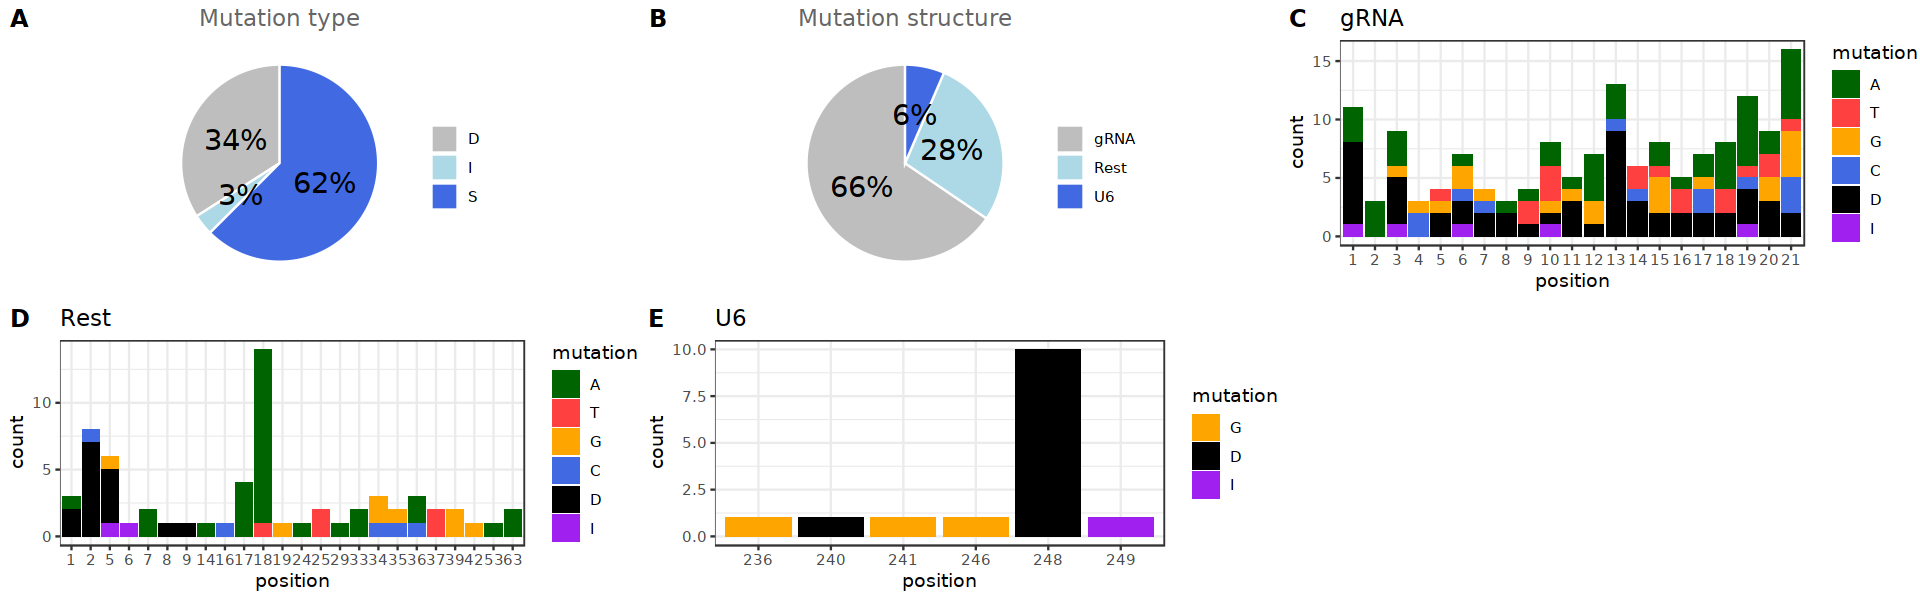

In [121]:
output_dir = './tmp/test'
input_dir = './GiRAFR_outputs//Tian_NatureNeuroscience/sample3/'
fba_input_dir = '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_3/'

MT <- plot_MT_pattern(input_dir, output_dir)


In [122]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA
    
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))    
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = grepl('variant', MT)) %>% summarise(has_MT=any(is_MT))
table(cells.num_features$num_features)
sum(table(cells.num_features$num_features))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.



   1    2    3    4    5    6    7    8   12   13 
3310 1181  346  113   33   24    3    1    1    1 

[1] 5013

Rows: 11974 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


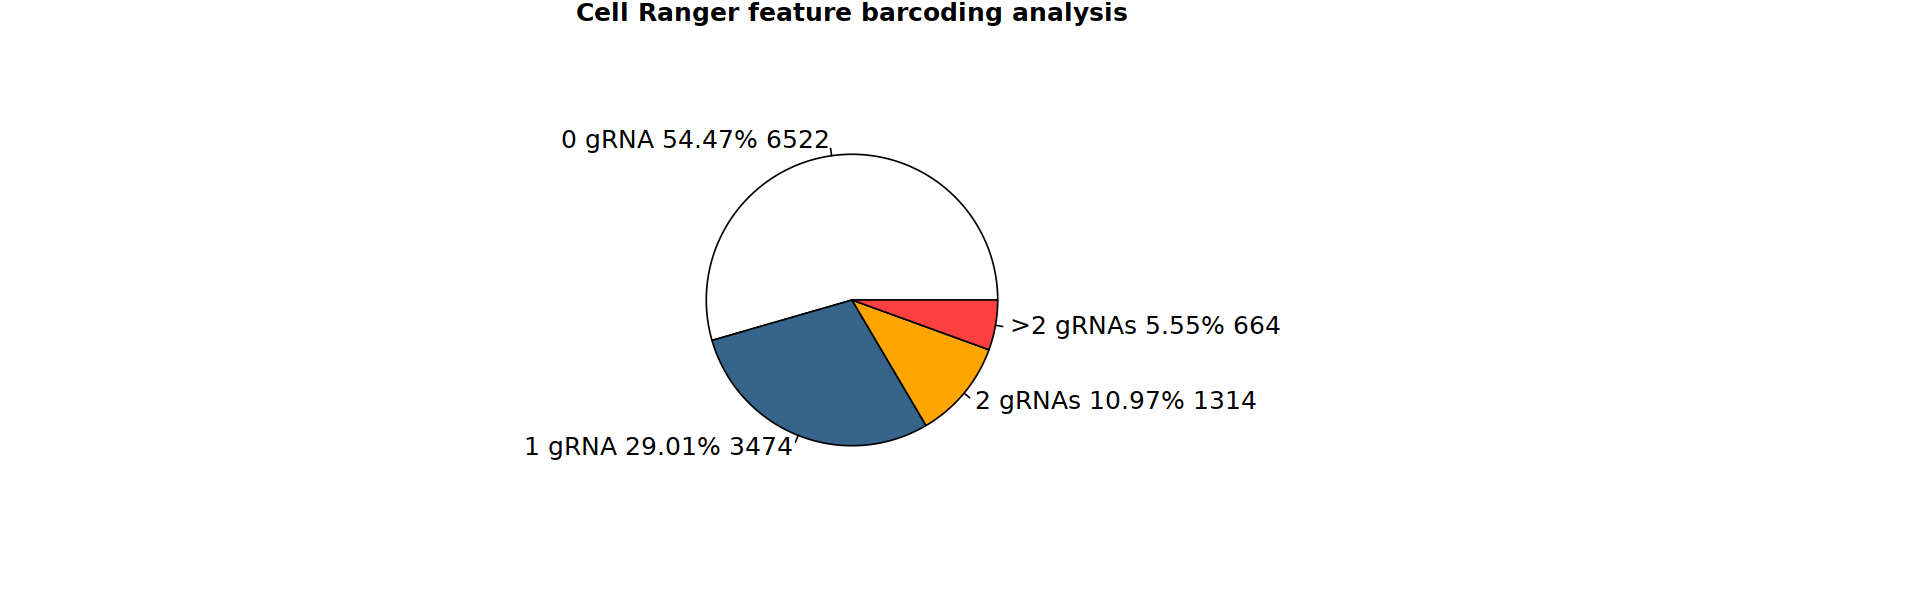

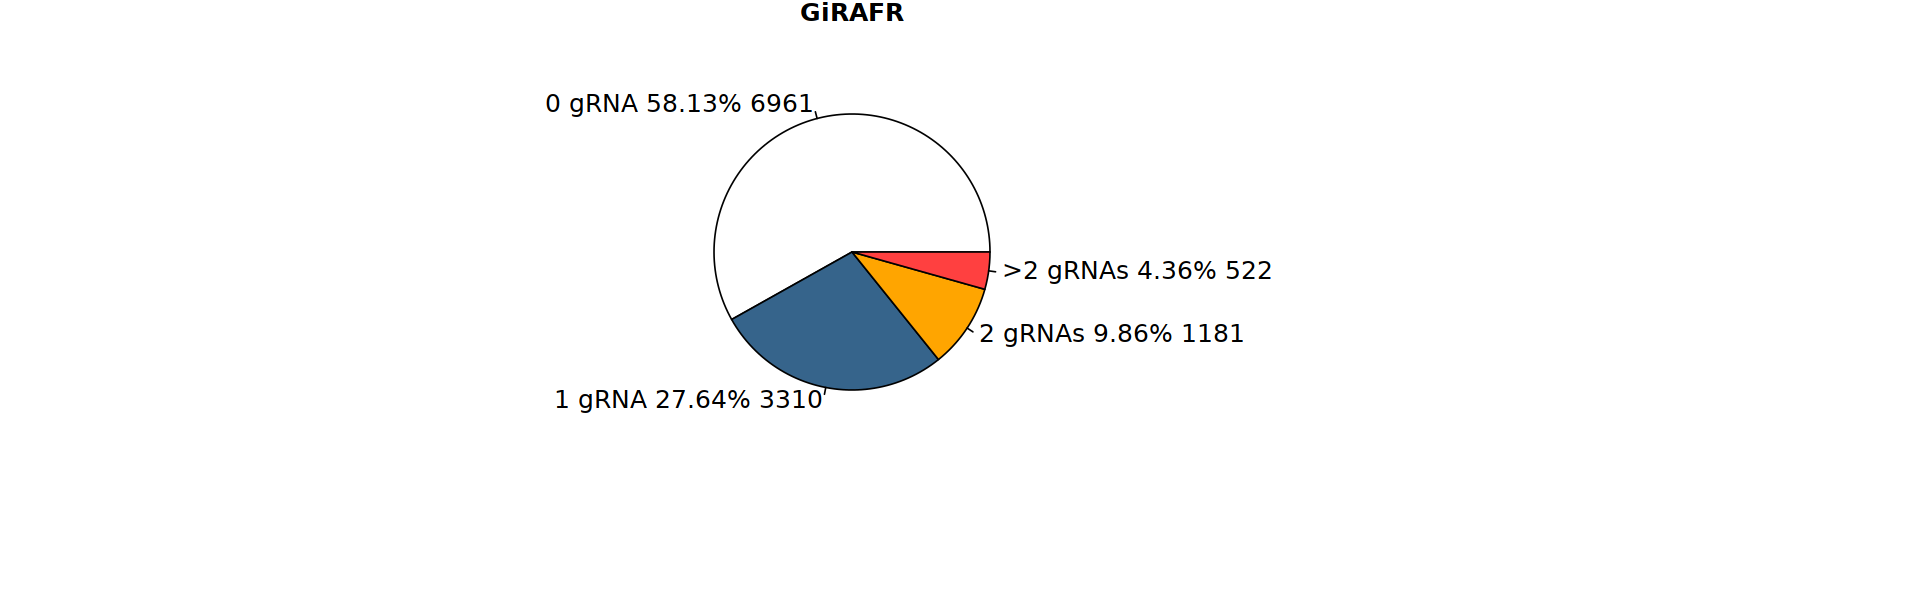

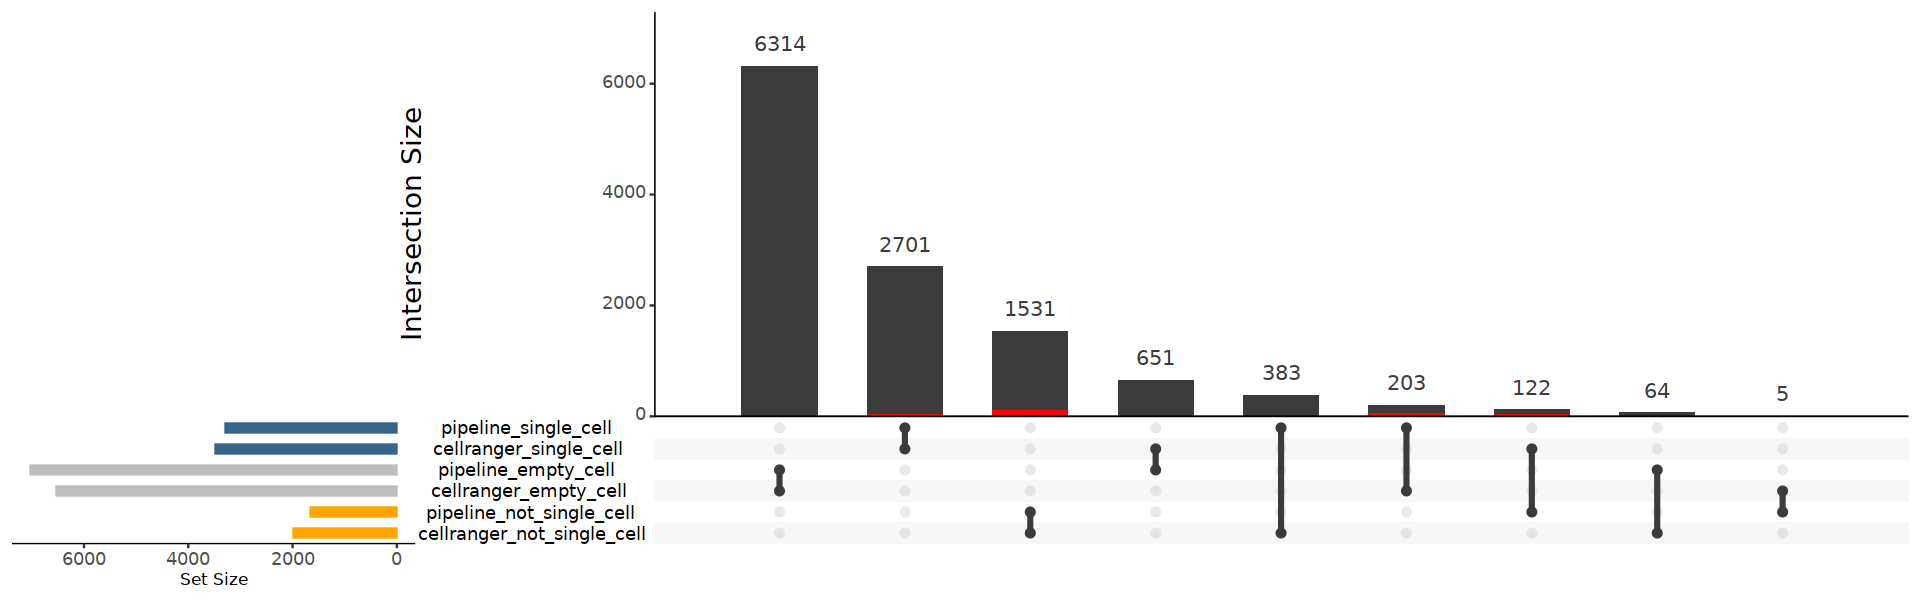

In [123]:
protospacer_file <- paste0(fba_input_dir, '/outs/crispr_analysis/protospacer_calls_per_cell.csv')
barcodes_file <- paste0(fba_input_dir, '/outs/filtered_feature_bc_matrix/barcodes.tsv.gz')

protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)


pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)


Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))

p

In [124]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
  155    53 

In [125]:
table(all_barcodes$has_MT)


FALSE  TRUE 
 4707   238 

### Analysis impact of mutant gRNA and doublets

In [126]:
input_dir

[1] "./GiRAFR_outputs//Tian_NatureNeuroscience/sample3/"

In [127]:
cells.gRNA.single.MT <- read.table(paste0(input_dir, 'cells.gRNA.single.MT.txt'), stringsAsFactors = FALSE)
cells.gRNA.single.MT$target <- sapply(strsplit(cells.gRNA.single.MT$V3,"_"), `[`, 1)
cells.gRNA.single.MT[grepl('non-targeting',cells.gRNA.single.MT$target),]$target <- 'Control'
cells.gRNA.single.MT$is_WT <- !grepl(pattern = 'variant',cells.gRNA.single.MT$V3)
#table(cells.gRNA.single.MT$is_WT)
cells.gRNA.single.MT$cb = paste0(cells.gRNA.single.MT$V1, '-1')

In [128]:
diff_cb <- pipeline_Single[!pipeline_Single %in% cells.gRNA.single.MT$cb]

In [129]:
length(diff_cb)

[1] 0

pipeline_Single

In [130]:
all.matrix <- Read10X(paste0(fba_input_dir,'/outs/filtered_feature_bc_matrix/'))
expression.seurat.ori = CreateSeuratObject(counts = all.matrix$`Gene Expression`)
expression.seurat <- subset(expression.seurat.ori, cells = pipeline_Single)

expression.seurat <- NormalizeData(object = expression.seurat, normalization.method = "LogNormalize", scale.factor = 10000)
rownames(cells.gRNA.single.MT) <- cells.gRNA.single.MT$cb
expression.seurat@meta.data$KO <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'target']
expression.seurat@meta.data$is_WT <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'is_WT']
expression.seurat@meta.data$mutation <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'V5']
expression.seurat@meta.data$cb <- rownames(expression.seurat@meta.data)

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [131]:
sum(is.na(expression.seurat@meta.data$KO)) 
# should be same as length(diff_cb) 

[1] 0

In [132]:
rownames(cells.has_MT) <- cells.has_MT$cb
expression.seurat@meta.data$has_MT <- cells.has_MT[rownames(expression.seurat@meta.data), ]$has_MT

Warning message:
“Setting row names on a tibble is deprecated.”


In [133]:
diff_cb_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% diff_cb),]
rownames(diff_cb_gRNA) <- diff_cb_gRNA$cb

In [134]:
# replace KO NA into target
expression.seurat@meta.data$KO[which(expression.seurat@meta.data$cb %in% diff_cb)] <- 
sapply(strsplit(diff_cb_gRNA[rownames(expression.seurat@meta.data[which(expression.seurat@meta.data$cb %in% diff_cb),]), 'target'], '_'), `[`, 1)

In [135]:
table(expression.seurat@meta.data$is_WT, expression.seurat@meta.data$has_MT)
# has some discrepancy 

       
        FALSE TRUE
  FALSE     0   93
  TRUE   3194    0

In [136]:
#expression.seurat@meta.data[which(expression.seurat@meta.data$is_WT == FALSE & expression.seurat@meta.data$has_MT == FALSE),]

In [137]:
unique(expression.seurat$KO)

[1] "FRMD4A"    "DNM2"      "ADAM10"    "FARP1"     "WDR66"     "ADARB2"   
  [7] "DNAJC6"    "ATP1A3"    "ATP5C1"    "SETX"      "DROSHA"    "GOLIM4"   
 [13] "VPS35"     "PFDN1"     "ATXN1"     "AP2A2"     "RGL1"      "EWSR1"    
 [19] "SLC4A1AP"  "COG4"      "YARS"      "THAP1"     "AFG3L2"    "COX10"    
 [25] "HYOU1"     "EXOC4"     "CTSD"      "SOD1"      "TRPM7"     "RNF165"   
 [31] "TFAM"      "SNCB"      "MTA1"      "ELOVL5"    "FGD4"      "IGF1R"    
 [37] "CEP63"     "NDUFAF5"   "HEXA"      "PDS5B"     "ELMO1"     "SCAPER"   
 [43] "ATXN10"    "PMPCA"     "APEX1"     "SOD2"      "Control"   "POU4F1"   
 [49] "RPL14"     "DBR1"      "VPS13A"    "GRN"       "PLEKHG5"   "PRNP"     
 [55] "PRKAG2"    "RHOT1"     "SASH1"     "BNIP1"     "COX15"     "HTT"      
 [61] "ATP5H"     "RPL6"      "FERMT2"    "DAP"       "RAB7A"     "ELP3"     
 [67] "BCS1L"     "OPTN"      "RGS2"      "UBA5"      "HSPA5"     "NDUFA9"   
 [73] "CASP3"     "CDC42EP3"  "TMEM55A"   "RFC3"      "TARDBP"    "ATXN7"    
 [79] "POLG"      "ATP6AP2"   "ST6GAL1"   "NDUFAF6"   "ECHS1"     "CDH11"    
 [85] "PARP1"     "PCDH1"     "DCTN1"     "CYB561"    "BLMH"      "PFN1"     
 [91] "TRAP1"     "NDUFV1"    "WWOX"      "AIFM1"     "PGBD1"     "BIN1"     
 [97] "BAX"       "EIF4G1"    "GSR"       "PVR"       "MRPL10"    "PSAP"     
[103] "ANO10"     "HNRNPA2B1" "LRPPRC"    "GARS"      "PON2"      "MAPT"     
[109] "UBTD2"     "DYNC1H1"   "SERAC1"    "FOXC1"     "FAM171A2"  "COASY"    
[115] "CREBBP"    "GSTA4"     "VCP"       "CIC"       "DMXL1"     "CYP46A1"  
[121] "PPP1R37"   "ZNF592"    "KIF1B"     "SLMAP"     "MATR3"     "SH3RF1"   
[127] "NTRK2"     "TOP1"      "SCO2"      "FBXO7"     "PRRC2C"    "KIFAP3"   
[133] "XRCC1"     "REEP2"     "NDUFS8"    "TDP2"      "BECN1"     "CALB1"    
[139] "TRIP4"     "VPS13C"    "NSF"       "PAXIP1"    "ZNF599"    "NDUFAF2"  
[145] "VAPB"      "EPC2"      "HSPA9"     "SARM1"     "CNTNAP2"   "RAB10"    
[151] "GTF2H3"    "PPP2R2B"   "FOXRED1"   "AMFR"      "ARID1B"    "EIF2S1"   
[157] "SYNJ1"     "VPS54"     "AKAP9"     "SCFD1"     "CELF1"     "GLE1"     
[163] "RELN"      "NDUFA2"    "XIAP"      "FXN"       "STX1B"     "EEF2"     
[169] "PSMF1"     "TAF1"      "RBM17"     "OSBPL6"    "ZNF292"    "OPA3"     
[175] "WDR45"     "PLD3"      "FAM57B"    "CYCS"      "SPG7"      "TRIM26"   
[181] "SEC24B"    "RIMBP2"    "ATG5"      "NCSTN"     "TUBB4A"

In [138]:
expression.seurat$KO[expression.seurat$KO == 'TMEM55A'] <- 'PIP4P2'
expression.seurat$KO[expression.seurat$KO == 'ATP5C1'] <- 'ATP5F1C'
expression.seurat$KO[expression.seurat$KO == 'ATP5H'] <- 'ATP5PD'

In [139]:
targets <- unique(expression.seurat@meta.data$KO)
targets <- targets[targets!='Control']
all.exp2.df <- data.frame()
CTRL_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == 'Control'),])
for(gene in targets){
        KO_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == gene),])
        tmp.df <- rbind(data.frame(expression = expression.seurat@assays$RNA@data[gene, KO_cells], type = 'KO'),
            data.frame(expression = expression.seurat@assays$RNA@data[gene, CTRL_cells], type = 'Control'))

        tmp.df$target = gene
        tmp.df$cb = rownames(tmp.df)
        all.exp2.df <- rbind(all.exp2.df, tmp.df)
}

Target gene expression in Control

In [140]:
avg.exp.control <- all.exp2.df[which(all.exp2.df$type == 'Control'),] %>% group_by(target) %>% summarise(avg = mean(expression))
avg.exp.control <- as.data.frame(avg.exp.control)
rownames(avg.exp.control) <- avg.exp.control$target

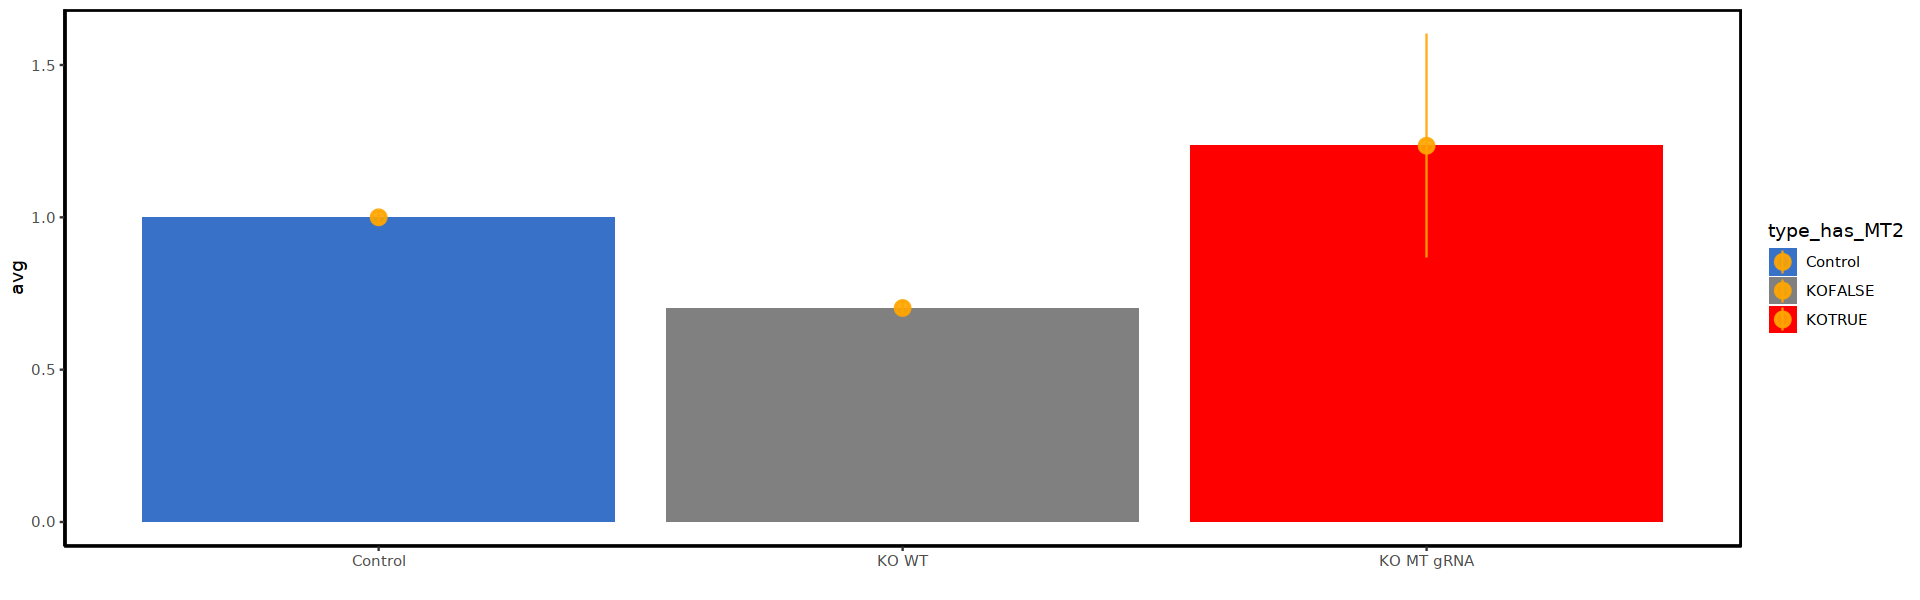

In [141]:
#all.exp2.MT.df <- merge(all.exp2.df, cells.gRNA.single.MT[,c(4,5,8,9)], by = 'cb')
all.exp2.MT.df <- merge(all.exp2.df, expression.seurat@meta.data[,c(4,6,7,8)], by = 'cb')
all.exp2.MT.df$type_has_MT <- paste0(all.exp2.MT.df$type, all.exp2.MT.df$has_MT)

all.exp2.MT.df$type_has_MT2 <- all.exp2.MT.df$type_has_MT
all.exp2.MT.df[which(all.exp2.MT.df$type_has_MT == 'ControlFALSE' |
    all.exp2.MT.df$type_has_MT == 'ControlNA' |
    all.exp2.MT.df$type_has_MT == 'ControlTRUE'),'type_has_MT2'] <- 'Control'


out_target <- avg.exp.control[which(avg.exp.control$avg == 0), 'target']
all.exp2.MT.df <- all.exp2.MT.df[which(!all.exp2.MT.df$target %in% out_target), ]

all.exp2.MT.df$expression_norm <- all.exp2.MT.df$expression/avg.exp.control[all.exp2.MT.df$target,'avg']

# high_exp_targets <- avg.exp.control$target[order(avg.exp.control$avg, decreasing = T)]
# tmp.df <- all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), c('tmp','expression_norm')]

tmp.df <- all.exp2.MT.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm),
                                                 sem = sd(expression_norm)/sqrt(n))

p1 <- ggplot(tmp.df, aes(x = type_has_MT2, y = avg, fill = type_has_MT2)) + geom_col()+
        geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
        theme_classic()+
        xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+
        scale_fill_manual(breaks = c("Control", "KOFALSE","KOTRUE"),
                          values=c("#3771c8", "#808080",'#ff0000'))+
        scale_x_discrete(limits = c("Control", "KOFALSE", "KOTRUE"), labels=c("Control" = "Control", "KOFALSE" = "KO WT", "KOTRUE" = "KO MT gRNA"))

print(p1)

### Analysis impact of doublets/multiplets

In [142]:
new_doublets <- all_barcodes[which(all_barcodes$pipeline_not_single_cell == 1 & all_barcodes$cellranger_single_cell == 1), 'X1']
length(new_doublets) 
# pipeline identified doubets, cellranger as single

[1] 122

For new doublets, following scenarios:
1. doublets with the mutant gRNA and wildtype gRNA targeting the same gene, 
2. doublets with the mutant gRNA and wildtype gRNA targeting the different gene
3. doublets with two wildtype gRNA targeting the same gene
4. doublets with two wildtype gRNA targeting different gene
5. doublets with two mutant gRNAs targeting different gene

In [143]:
new_doublets_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% new_doublets),] # the mutant gRNA and wildtype gRNA targeting the same gene,


In [144]:
#new_doublets_type1 <- new_doublets_gRNA[which(new_doublets_gRNA$feature_order >= 2),]
#new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA[which(new_doublets_gRNA$feature_order < 2),] %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [145]:
new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [146]:
new_doublets_gRNA2$KO <- lapply(new_doublets_gRNA2$target, function(x) sapply(strsplit(x, '_'), `[`, 1))
                                

In [147]:
if1 <- lapply(new_doublets_gRNA2$KO, function(x) x[1]== x[2])
if2 <- lapply(new_doublets_gRNA2$UMIs, function(x) x[1]>0 & x[2] > 0)
              
new_doublets_type_unknown <- c()
new_doublets_type2 <- c()
new_doublets_type3 <- c()
new_doublets_type4 <- c()
new_doublets_type5 <- c()
for(i in 1:nrow(new_doublets_gRNA2)){
    if(is.na(if1[i]) | is.na(if2[i])){
        new_doublets_type_unknown <- rbind(new_doublets_type_unknown, new_doublets_gRNA2[i,])
    }else{
    if(if1[i] == TRUE & if2[i] == TRUE){ # two wiltype gRNA targeting the same target
        new_doublets_type3 <- rbind(new_doublets_type3, new_doublets_gRNA2[i,])
    }else if(if1[i] == TRUE & if2[i] == FALSE){ #  mutant gRNA and wildtype gRNA or two muatnt targeting the same gene
        new_doublets_type2 <- rbind(new_doublets_type2, new_doublets_gRNA2[i,])
    }else if(if1[i] == FALSE & if2[i] == TRUE){# two wildtype gRNA targeting different gene
        new_doublets_type4 <- rbind(new_doublets_type4, new_doublets_gRNA2[i,]) 
    }else if(if1[i] == FALSE & if2[i] == FALSE){ # mutant gRNA and wildtype gRNA or two muatnt  different gene 
        new_doublets_type5 <- rbind(new_doublets_type5, new_doublets_gRNA2[i,])
    }else{
        print('unknown error')
    }
    }
}

In [148]:
#nrow(new_doublets_type1)
nrow(new_doublets_type2)
nrow(new_doublets_type3)
nrow(new_doublets_type4)
nrow(new_doublets_type5)
nrow(new_doublets_type_unknown)

NULL

NULL

[1] 81

[1] 35

[1] 6

In [149]:
new_doublets_subset <- rbind(new_doublets_type4, new_doublets_type5)$cb
length(new_doublets_subset)

[1] 116

In [150]:
seurat.object.doublets <- subset(expression.seurat.ori, cells = new_doublets_subset)
seurat.object.doublets <- NormalizeData(object = seurat.object.doublets, normalization.method = "LogNormalize", scale.factor = 10000)
seurat.object.doublets

An object of class Seurat 
33538 features across 116 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts, data

In [151]:
head(rbind(new_doublets_type4, new_doublets_type5))
table(cells.num_features[which(cells.num_features$cb %in% new_doublets_subset),'num_features'])

,cb,target,UMIs,KO
,<chr>,<list>,<list>,<list>
2,AAAGAACTCACTGTTT-1,"SNCB_i2_top_gene , NDUFA9_i5_top_gene","3, 2","SNCB , NDUFA9"
4,AACGTCACATGGTACT-1,"FAM57B_i1_top_gene, POU4F1_i2_top_gene","1, 10","FAM57B, POU4F1"
5,AAGAACAAGAGTCTTC-1,"HTT_i2_top_gene , VPS35_i2_top_gene","3, 1","HTT , VPS35"
6,AATCGACGTCAGATTC-1,"BECN1_i1_top_gene, FOXC1_i2_top_gene","2, 1","BECN1, FOXC1"
7,AATGACCTCTTCCCGA-1,"EEF2_i1_top_gene , RHOT1_i4_top_gene","1, 6","EEF2 , RHOT1"
9,ACACAGTGTATGGTAA-1,"CREBBP_i8_top_gene, RGL1_i2_top_gene","1, 2","CREBBP, RGL1"


num_features
  2   3 
111   5 

In [152]:
protospacer.df <- read.csv(protospacer_file)
rownames(protospacer.df) <- protospacer.df$cell_barcode

In [153]:
seurat.object.doublets@meta.data <- cbind(seurat.object.doublets@meta.data, protospacer.df[colnames(seurat.object.doublets),])
seurat.object.doublets$KO <- sapply(strsplit(seurat.object.doublets@meta.data$feature_call, '_'), `[`, 1)


In [154]:
seurat.object.doublets$KO[seurat.object.doublets$KO == 'non-targeting'] <- 'Control'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'TMEM55A'] <- 'PIP4P2'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5C1'] <- 'ATP5F1C'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5H'] <- 'ATP5PD'

In [155]:
doublets_targets <- unique(seurat.object.doublets$KO)[-which(unique(seurat.object.doublets$KO) == 'Control')] # remove 'neg'
doublets.exp.df <- data.frame()
CTRL_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == 'Control'),])

for(gene in doublets_targets){
    KO_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == gene),])
   tmp.df <- rbind(data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, KO_cells], type = 'KO_doublets'),
                    data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, CTRL_cells], type = 'Control_doublets'))
   tmp.df$target = gene
   tmp.df$cb = c(KO_cells, CTRL_cells)
   doublets.exp.df <- rbind(doublets.exp.df, tmp.df)
}

In [156]:
doublets.exp.df$type_has_MT2 <- doublets.exp.df$type

In [157]:
out_target <- avg.exp.control[which(avg.exp.control$avg == 0), 'target']
doublets.exp.df <- doublets.exp.df[which(!doublets.exp.df$target %in% out_target), ]


In [158]:
doublets.exp.df$expression_norm <- doublets.exp.df$expression/avg.exp.control[doublets.exp.df$target,'avg']

In [159]:
all.exp2.doublets.df <- rbind(doublets.exp.df, all.exp2.MT.df[, c('expression', 'type', 'target', 'cb', 'type_has_MT2', 'expression_norm')])

In [160]:
table(all.exp2.doublets.df$type_has_MT)


         Control Control_doublets      KO_doublets          KOFALSE 
            5611              332              110             3106 
          KOTRUE 
              92 

In [161]:
tmp.df <- all.exp2.doublets.df
tmp.df <- tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
tmp.df

type_has_MT2,n,avg,sd,sem
<chr>,<int>,<dbl>,<dbl>,<dbl>
Control,5611,1.0000000,1.418895,0.01894218
Control_doublets,332,1.2553777,1.918407,0.10528628
KOFALSE,3106,0.7023478,1.411611,0.02532878
KOTRUE,92,1.2349286,3.532662,0.36830546
KO_doublets,110,0.6863445,1.041495,0.09930262


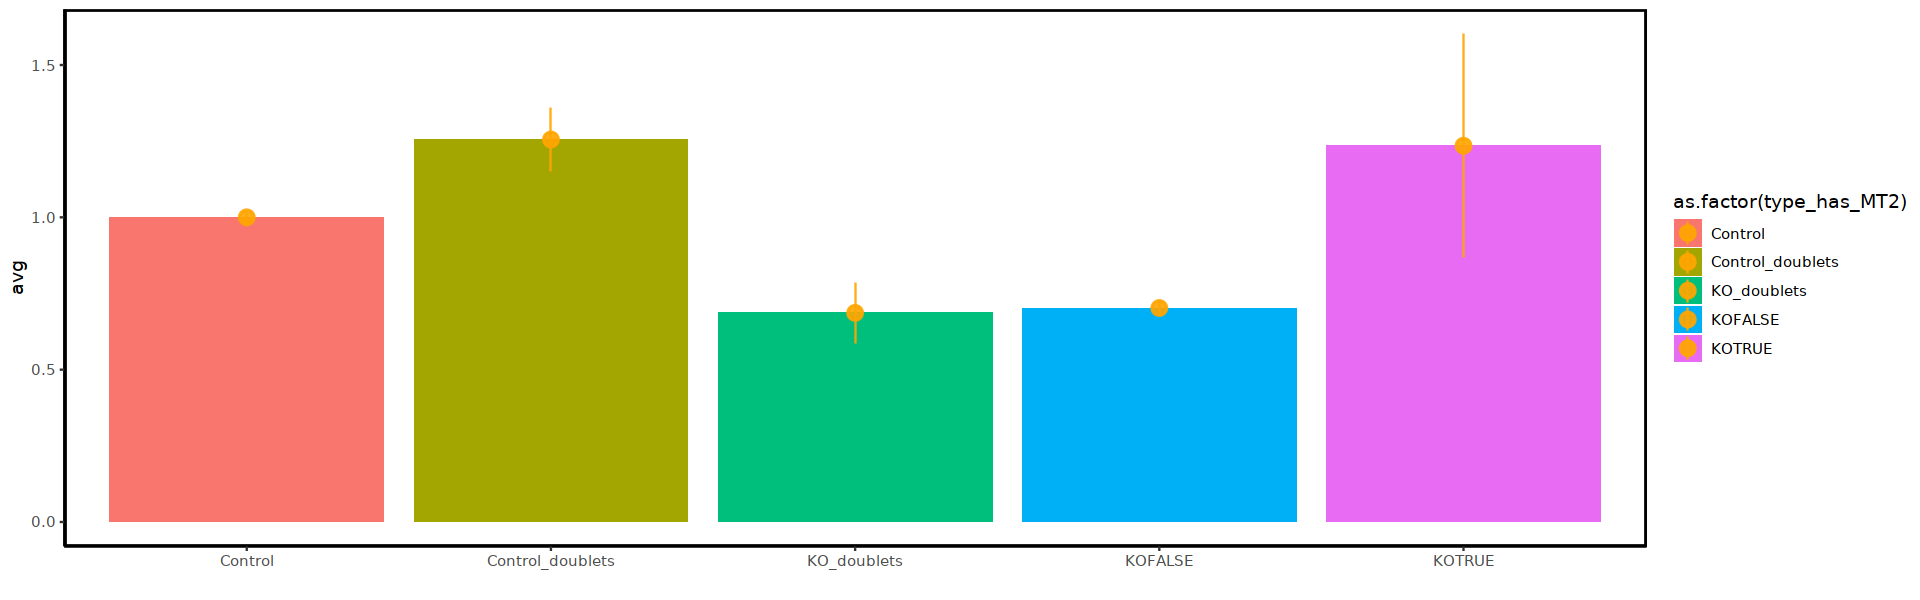

In [162]:
ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = avg, fill = as.factor(type_has_MT2))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))


In [163]:
dim(all.exp2.doublets.df)
all.exp2.doublets.df_sample3 <- all.exp2.doublets.df

[1] 9251    6

# MT gRNA impact -4

[1] "MT mutation table"

   A    C D(1) D(2) D(4)    G I(1) I(2)    T 
 113   42  100   11    2   70   15    1   50 
[1] "MT mutation type"

  D   I   S 
113  16 275 
[1] "MT mutation structure"

gRNA Rest   U6 
 245  120   39 


ERROR: Error in pdf(save_pdf, height = 10, width = 20): cannot open file './tmp/test.all.MT.pdf'


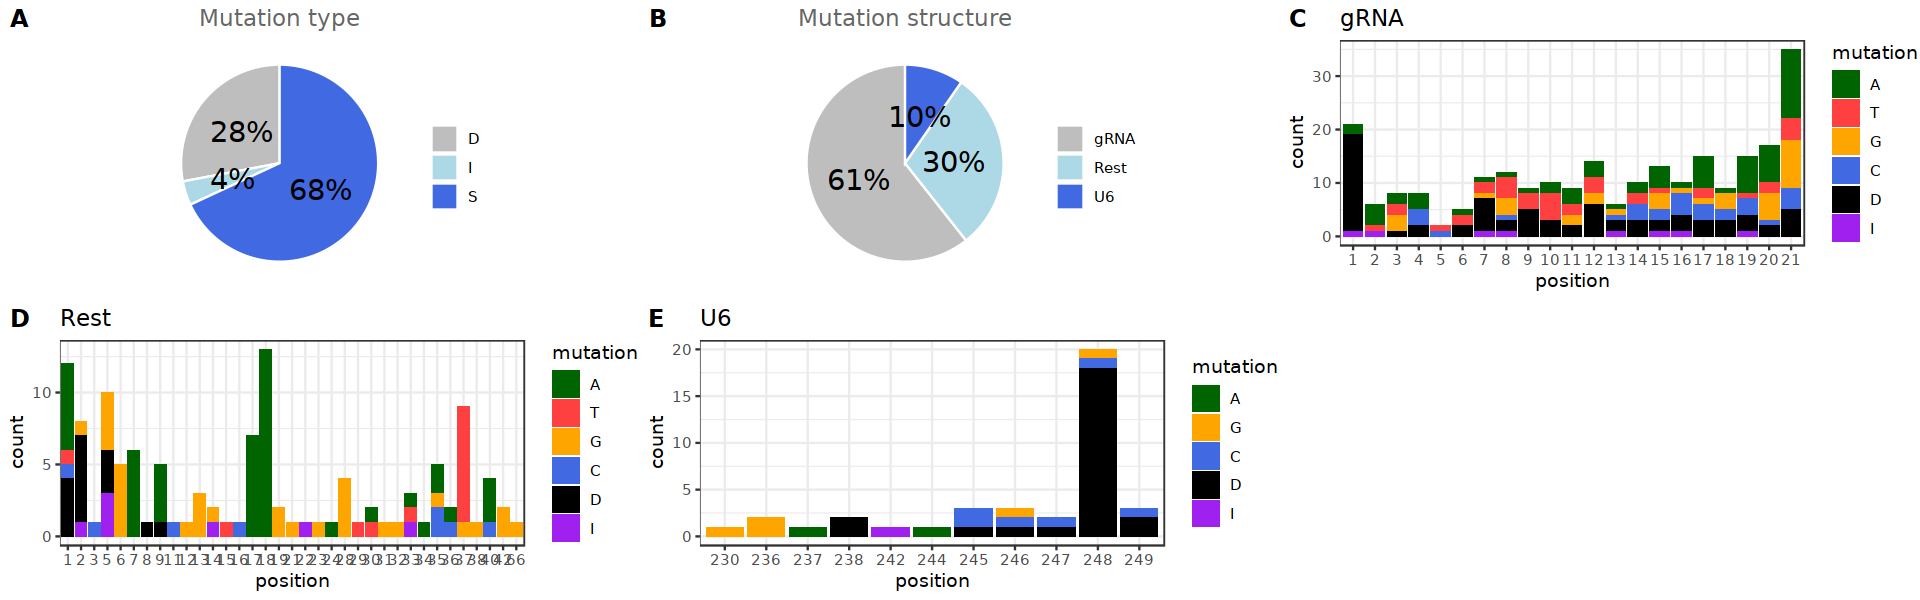

In [164]:
output_dir = './tmp/test'
input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample4/'
fba_input_dir = '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_4/'

MT <- plot_MT_pattern(input_dir, output_dir)


In [ ]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA
    
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))    
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = grepl('variant', MT)) %>% summarise(has_MT=any(is_MT))
table(cells.num_features$num_features)
sum(table(cells.num_features$num_features))

In [ ]:
protospacer_file <- paste0(fba_input_dir, '/outs/crispr_analysis/protospacer_calls_per_cell.csv')
barcodes_file <- paste0(fba_input_dir, '/outs/filtered_feature_bc_matrix/barcodes.tsv.gz')

protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)


pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)


Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))

p

In [ ]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])

In [ ]:
table(all_barcodes$has_MT)

### Analysis impact of mutant gRNA and doublets

In [ ]:
input_dir

In [ ]:
cells.gRNA.single.MT <- read.table(paste0(input_dir, 'cells.gRNA.single.MT.txt'), stringsAsFactors = FALSE)
cells.gRNA.single.MT$target <- sapply(strsplit(cells.gRNA.single.MT$V3,"_"), `[`, 1)
cells.gRNA.single.MT[grepl('non-targeting',cells.gRNA.single.MT$target),]$target <- 'Control'
cells.gRNA.single.MT$is_WT <- !grepl(pattern = 'variant',cells.gRNA.single.MT$V3)
#table(cells.gRNA.single.MT$is_WT)
cells.gRNA.single.MT$cb = paste0(cells.gRNA.single.MT$V1, '-1')

In [ ]:
diff_cb <- pipeline_Single[!pipeline_Single %in% cells.gRNA.single.MT$cb]

In [ ]:
length(diff_cb)

pipeline_Single

In [ ]:
all.matrix <- Read10X(paste0(fba_input_dir,'/outs/filtered_feature_bc_matrix/'))
expression.seurat.ori = CreateSeuratObject(counts = all.matrix$`Gene Expression`)
expression.seurat <- subset(expression.seurat.ori, cells = pipeline_Single)

expression.seurat <- NormalizeData(object = expression.seurat, normalization.method = "LogNormalize", scale.factor = 10000)
rownames(cells.gRNA.single.MT) <- cells.gRNA.single.MT$cb
expression.seurat@meta.data$KO <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'target']
expression.seurat@meta.data$is_WT <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'is_WT']
expression.seurat@meta.data$mutation <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'V5']
expression.seurat@meta.data$cb <- rownames(expression.seurat@meta.data)

In [ ]:
sum(is.na(expression.seurat@meta.data$KO)) 
# should be same as length(diff_cb) 

In [ ]:
rownames(cells.has_MT) <- cells.has_MT$cb
expression.seurat@meta.data$has_MT <- cells.has_MT[rownames(expression.seurat@meta.data), ]$has_MT

In [ ]:
diff_cb_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% diff_cb),]
rownames(diff_cb_gRNA) <- diff_cb_gRNA$cb

In [ ]:
# replace KO NA into target
expression.seurat@meta.data$KO[which(expression.seurat@meta.data$cb %in% diff_cb)] <- 
sapply(strsplit(diff_cb_gRNA[rownames(expression.seurat@meta.data[which(expression.seurat@meta.data$cb %in% diff_cb),]), 'target'], '_'), `[`, 1)

In [ ]:
table(expression.seurat@meta.data$is_WT, expression.seurat@meta.data$has_MT)
# has some discrepancy 

In [ ]:
#expression.seurat@meta.data[which(expression.seurat@meta.data$is_WT == FALSE & expression.seurat@meta.data$has_MT == FALSE),]

In [ ]:
unique(expression.seurat$KO)

In [ ]:
expression.seurat$KO[expression.seurat$KO == 'TMEM55A'] <- 'PIP4P2'
expression.seurat$KO[expression.seurat$KO == 'ATP5C1'] <- 'ATP5F1C'
expression.seurat$KO[expression.seurat$KO == 'ATP5H'] <- 'ATP5PD'

In [ ]:
targets <- unique(expression.seurat@meta.data$KO)
targets <- targets[targets!='Control']
all.exp2.df <- data.frame()
CTRL_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == 'Control'),])
for(gene in targets){
        KO_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == gene),])
        tmp.df <- rbind(data.frame(expression = expression.seurat@assays$RNA@data[gene, KO_cells], type = 'KO'),
            data.frame(expression = expression.seurat@assays$RNA@data[gene, CTRL_cells], type = 'Control'))

        tmp.df$target = gene
        tmp.df$cb = rownames(tmp.df)
        all.exp2.df <- rbind(all.exp2.df, tmp.df)
}

Target gene expression in Control

In [ ]:
avg.exp.control <- all.exp2.df[which(all.exp2.df$type == 'Control'),] %>% group_by(target) %>% summarise(avg = mean(expression))
avg.exp.control <- as.data.frame(avg.exp.control)
rownames(avg.exp.control) <- avg.exp.control$target

In [ ]:
#all.exp2.MT.df <- merge(all.exp2.df, cells.gRNA.single.MT[,c(4,5,8,9)], by = 'cb')
all.exp2.MT.df <- merge(all.exp2.df, expression.seurat@meta.data[,c(4,6,7,8)], by = 'cb')
all.exp2.MT.df$type_has_MT <- paste0(all.exp2.MT.df$type, all.exp2.MT.df$has_MT)

all.exp2.MT.df$type_has_MT2 <- all.exp2.MT.df$type_has_MT
all.exp2.MT.df[which(all.exp2.MT.df$type_has_MT == 'ControlFALSE' |
    all.exp2.MT.df$type_has_MT == 'ControlNA' |
    all.exp2.MT.df$type_has_MT == 'ControlTRUE'),'type_has_MT2'] <- 'Control'


out_target <- avg.exp.control[which(avg.exp.control$avg == 0), 'target']
all.exp2.MT.df <- all.exp2.MT.df[which(!all.exp2.MT.df$target %in% out_target), ]

all.exp2.MT.df$expression_norm <- all.exp2.MT.df$expression/avg.exp.control[all.exp2.MT.df$target,'avg']

# high_exp_targets <- avg.exp.control$target[order(avg.exp.control$avg, decreasing = T)]
# tmp.df <- all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), c('tmp','expression_norm')]

tmp.df <- all.exp2.MT.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm),
                                                 sem = sd(expression_norm)/sqrt(n))

p1 <- ggplot(tmp.df, aes(x = type_has_MT2, y = avg, fill = type_has_MT2)) + geom_col()+
        geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
        theme_classic()+
        xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+
        scale_fill_manual(breaks = c("Control", "KOFALSE","KOTRUE"),
                          values=c("#3771c8", "#808080",'#ff0000'))+
        scale_x_discrete(limits = c("Control", "KOFALSE", "KOTRUE"), labels=c("Control" = "Control", "KOFALSE" = "KO WT", "KOTRUE" = "KO MT gRNA"))

print(p1)

### Analysis impact of doublets/multiplets

In [ ]:
new_doublets <- all_barcodes[which(all_barcodes$pipeline_not_single_cell == 1 & all_barcodes$cellranger_single_cell == 1), 'X1']
length(new_doublets) 
# pipeline identified doubets, cellranger as single

For new doublets, following scenarios:
1. doublets with the mutant gRNA and wildtype gRNA targeting the same gene, 
2. doublets with the mutant gRNA and wildtype gRNA targeting the different gene
3. doublets with two wildtype gRNA targeting the same gene
4. doublets with two wildtype gRNA targeting different gene
5. doublets with two mutant gRNAs targeting different gene

In [ ]:
new_doublets_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% new_doublets),] # the mutant gRNA and wildtype gRNA targeting the same gene,


In [ ]:
#new_doublets_type1 <- new_doublets_gRNA[which(new_doublets_gRNA$feature_order >= 2),]
#new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA[which(new_doublets_gRNA$feature_order < 2),] %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [ ]:
new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [ ]:
new_doublets_gRNA2$KO <- lapply(new_doublets_gRNA2$target, function(x) sapply(strsplit(x, '_'), `[`, 1))
                                

In [ ]:
if1 <- lapply(new_doublets_gRNA2$KO, function(x) x[1]== x[2])
if2 <- lapply(new_doublets_gRNA2$UMIs, function(x) x[1]>0 & x[2] > 0)
              
new_doublets_type_unknown <- c()
new_doublets_type2 <- c()
new_doublets_type3 <- c()
new_doublets_type4 <- c()
new_doublets_type5 <- c()
for(i in 1:nrow(new_doublets_gRNA2)){
    if(is.na(if1[i]) | is.na(if2[i])){
        new_doublets_type_unknown <- rbind(new_doublets_type_unknown, new_doublets_gRNA2[i,])
    }else{
    if(if1[i] == TRUE & if2[i] == TRUE){ # two wiltype gRNA targeting the same target
        new_doublets_type3 <- rbind(new_doublets_type3, new_doublets_gRNA2[i,])
    }else if(if1[i] == TRUE & if2[i] == FALSE){ #  mutant gRNA and wildtype gRNA or two muatnt targeting the same gene
        new_doublets_type2 <- rbind(new_doublets_type2, new_doublets_gRNA2[i,])
    }else if(if1[i] == FALSE & if2[i] == TRUE){# two wildtype gRNA targeting different gene
        new_doublets_type4 <- rbind(new_doublets_type4, new_doublets_gRNA2[i,]) 
    }else if(if1[i] == FALSE & if2[i] == FALSE){ # mutant gRNA and wildtype gRNA or two muatnt  different gene 
        new_doublets_type5 <- rbind(new_doublets_type5, new_doublets_gRNA2[i,])
    }else{
        print('unknown error')
    }
    }
}

In [ ]:
#nrow(new_doublets_type1)
nrow(new_doublets_type2)
nrow(new_doublets_type3)
nrow(new_doublets_type4)
nrow(new_doublets_type5)
nrow(new_doublets_type_unknown)

In [ ]:
new_doublets_subset <- rbind(new_doublets_type4, new_doublets_type5)$cb
length(new_doublets_subset)

In [ ]:
seurat.object.doublets <- subset(expression.seurat.ori, cells = new_doublets_subset)
seurat.object.doublets <- NormalizeData(object = seurat.object.doublets, normalization.method = "LogNormalize", scale.factor = 10000)
seurat.object.doublets

In [ ]:
head(rbind(new_doublets_type4, new_doublets_type5))
table(cells.num_features[which(cells.num_features$cb %in% new_doublets_subset),'num_features'])

In [ ]:
protospacer.df <- read.csv(protospacer_file)
rownames(protospacer.df) <- protospacer.df$cell_barcode

In [ ]:
seurat.object.doublets@meta.data <- cbind(seurat.object.doublets@meta.data, protospacer.df[colnames(seurat.object.doublets),])
seurat.object.doublets$KO <- sapply(strsplit(seurat.object.doublets@meta.data$feature_call, '_'), `[`, 1)


In [ ]:
seurat.object.doublets$KO[seurat.object.doublets$KO == 'non-targeting'] <- 'Control'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'TMEM55A'] <- 'PIP4P2'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5C1'] <- 'ATP5F1C'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5H'] <- 'ATP5PD'

In [ ]:
doublets_targets <- unique(seurat.object.doublets$KO)[-which(unique(seurat.object.doublets$KO) == 'Control')] # remove 'neg'
doublets.exp.df <- data.frame()
CTRL_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == 'Control'),])

for(gene in doublets_targets){
    KO_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == gene),])
   tmp.df <- rbind(data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, KO_cells], type = 'KO_doublets'),
                    data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, CTRL_cells], type = 'Control_doublets'))
   tmp.df$target = gene
   tmp.df$cb = c(KO_cells, CTRL_cells)
   doublets.exp.df <- rbind(doublets.exp.df, tmp.df)
}

In [ ]:
doublets.exp.df$type_has_MT2 <- doublets.exp.df$type

In [ ]:
out_target <- avg.exp.control[which(avg.exp.control$avg == 0), 'target']
doublets.exp.df <- doublets.exp.df[which(!doublets.exp.df$target %in% out_target), ]


In [ ]:
doublets.exp.df$expression_norm <- doublets.exp.df$expression/avg.exp.control[doublets.exp.df$target,'avg']

In [165]:
all.exp2.doublets.df <- rbind(doublets.exp.df, all.exp2.MT.df[, c('expression', 'type', 'target', 'cb', 'type_has_MT2', 'expression_norm')])

In [166]:
table(all.exp2.doublets.df$type_has_MT)


         Control Control_doublets      KO_doublets          KOFALSE 
            5611              332              110             3106 
          KOTRUE 
              92 

In [167]:
tmp.df <- all.exp2.doublets.df
tmp.df <- tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
tmp.df

type_has_MT2,n,avg,sd,sem
<chr>,<int>,<dbl>,<dbl>,<dbl>
Control,5611,1.0000000,1.418895,0.01894218
Control_doublets,332,1.2553777,1.918407,0.10528628
KOFALSE,3106,0.7023478,1.411611,0.02532878
KOTRUE,92,1.2349286,3.532662,0.36830546
KO_doublets,110,0.6863445,1.041495,0.09930262


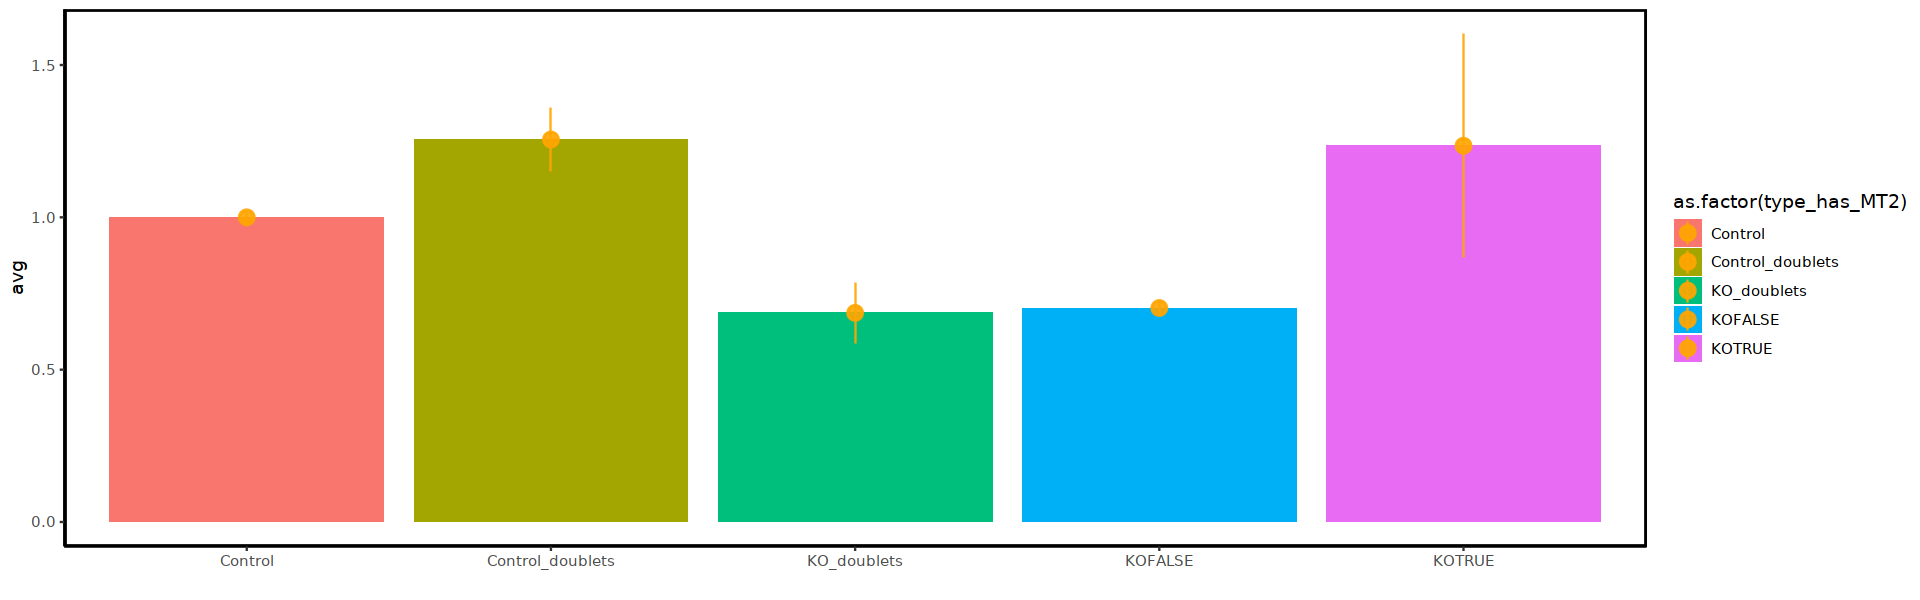

In [168]:
ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = avg, fill = as.factor(type_has_MT2))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))


In [169]:
dim(all.exp2.doublets.df)
all.exp2.doublets.df_sample4 <- all.exp2.doublets.df

[1] 9251    6

## Combine four samples

In [170]:
dim(all.exp2.doublets.df_sample1)
dim(all.exp2.doublets.df_sample2)
dim(all.exp2.doublets.df_sample3)
dim(all.exp2.doublets.df_sample4)

[1] 18200     6

[1] 17056     6

[1] 9251    6

[1] 9251    6

In [171]:
all.exp2.doublets.df_combine <- rbind(rbind(rbind(all.exp2.doublets.df_sample1, all.exp2.doublets.df_sample2), 
                                      all.exp2.doublets.df_sample3), all.exp2.doublets.df_sample4)

type_has_MT2,n,avg,sd,sem
<chr>,<int>,<dbl>,<dbl>,<dbl>
Control,37248,1.0000000,1.465580,0.007593779
Control_doublets,770,1.3070320,1.982275,0.071436215
KOFALSE,14769,0.6677219,1.294339,0.010650565
KOTRUE,450,1.0454332,2.411876,0.113696929
KO_doublets,521,0.7085848,1.123271,0.049211377


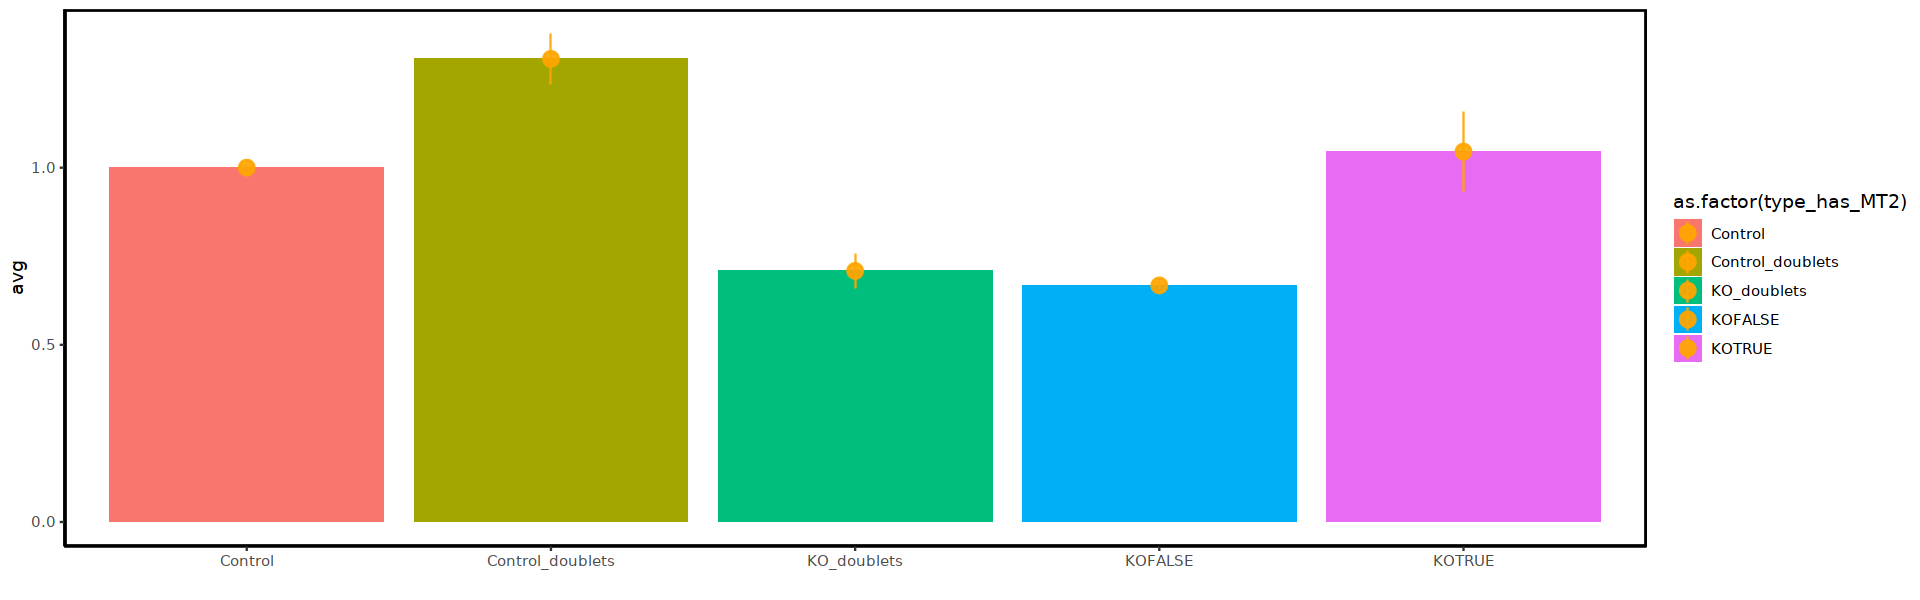

In [172]:
#pdf('Tian_NatureNeuroscience_gRNA_target_exp.pdf')
tmp.df <- all.exp2.doublets.df_combine
tmp.df <- tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
tmp.df

ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = avg, fill = as.factor(type_has_MT2))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))
#dev.off()

In [173]:
# options(repr.plot.width=10,repr.plot.height=5)
# tmp.df <- all.exp2.doublets.df_combine
# #tmp.df <- tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
# #tmp.df <- all.exp2.doublets.df[, c('nr_mutation','expression_norm')]
# ggplot(tmp.df, 
#        aes(
#            x = type_has_MT2, 
#            y = expression_norm, fill = as.factor(type_has_MT2))) + 
# #geom_violin()+
# geom_boxplot(width = 0.5, outlier.shape = NA)+ scale_y_continuous(limits = c(0,3))+
# theme_classic()+
# xlab('')+theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1))

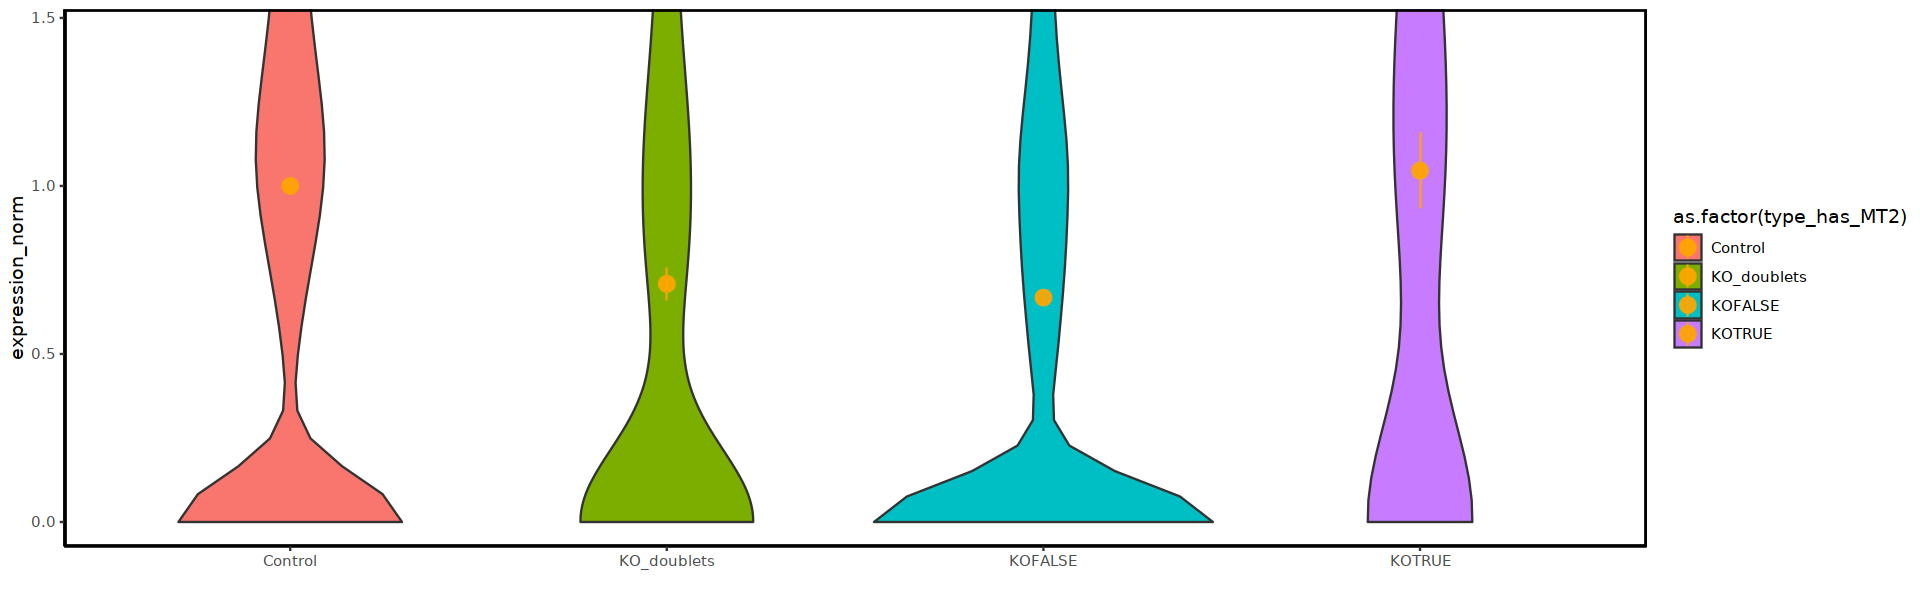

In [174]:
#pdf('Tian_NatureNeuroscience_gRNA_target_exp_violin.pdf')
tmp.df <- all.exp2.doublets.df_combine
tmp.df <- tmp.df[which(tmp.df$type_has_MT2 != 'Control_doublets'),]
tmp <-  tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), 
                                                 sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
ylims <- tmp.df %>%
  group_by(type_has_MT2) %>%
  summarise(Q1 = quantile(expression_norm, 1/4), Q3 = quantile(expression_norm, 3/4)) %>%
  ungroup() %>%
  #get lowest Q1 and highest Q3
  summarise(lowQ1 = min(Q1), highQ3 = max(Q3))

ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = expression_norm, fill = as.factor(type_has_MT2))) + 
geom_violin()+
coord_cartesian(ylim = as.numeric(ylims)*1)+ # zoom in
geom_pointrange(data = tmp, aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem),
                colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))
#dev.off()